#  House Prices: Advanced Regression Techniques
   [un challenge Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

    1. Etude statistiques
    2. Pré-traitment de données
    3. Apprentissage et test

## 1. Etude statistiques

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import json
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col='Id')
# Affichage des colonnes du dataset
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [3]:
# On affiche les informations sur la colonne cible (SalePrice)

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=["MSSubClass", 'MoSold']) #Categorique
numeric_features.dtypes

LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
SalePrice          int64
dtype: object

<AxesSubplot:>

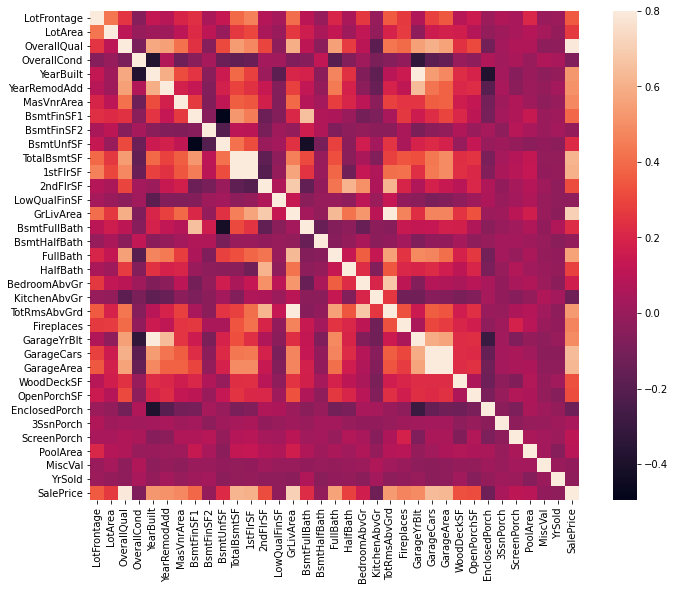

In [5]:
mat_corr = numeric_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(mat_corr, vmax=.8, square=True)

In [6]:
faible_corr = mat_corr['SalePrice'].sort_values(ascending=False)[np.abs(mat_corr['SalePrice'])<0.25]
print (faible_corr)
# les collones a faible correlation avec le prix de vente (0,25 > cor > -0,25)

BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [7]:
def get_faible_corr_cols(df: pd.DataFrame()):
    numeric = df.select_dtypes(include=[np.number])
    numeric = numeric.drop(columns=["MSSubClass", 'MoSold'])
    mat_corr = numeric_features.corr()
    faible_corr = mat_corr['SalePrice'].sort_values(ascending=False)[np.abs(mat_corr['SalePrice'])<0.25]
    return list(faible_corr.index)
get_faible_corr_cols(df)

['BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'EnclosedPorch',
 'KitchenAbvGr']

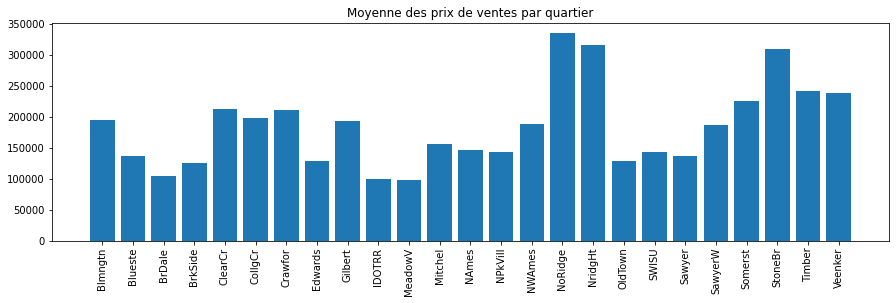

In [8]:
price_by_zone = df.pivot_table(index=['Neighborhood'], values='SalePrice', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(15,4))
ax.bar(price_by_zone.index, price_by_zone['SalePrice'])
plt.xticks(rotation='vertical')
plt.title("Moyenne des prix de ventes par quartier")
plt.show()

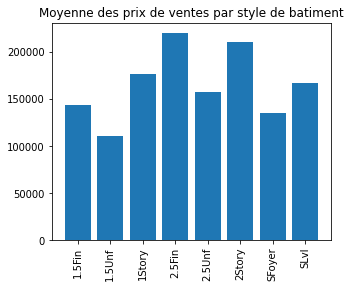

In [9]:
price_by_style = df.pivot_table(index=['HouseStyle'], values='SalePrice', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(5,4))
ax.bar(price_by_style.index, price_by_style['SalePrice'])
plt.xticks(rotation='vertical')
plt.title("Moyenne des prix de ventes par style de batiment")
plt.show()

(-0.5, 9.5, 0.0, 800000.0)

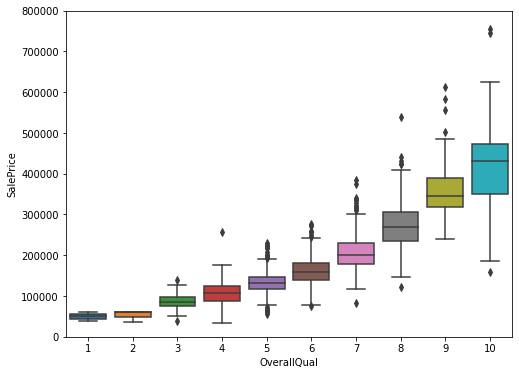

In [10]:
data = pd.concat([df['SalePrice'], df["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

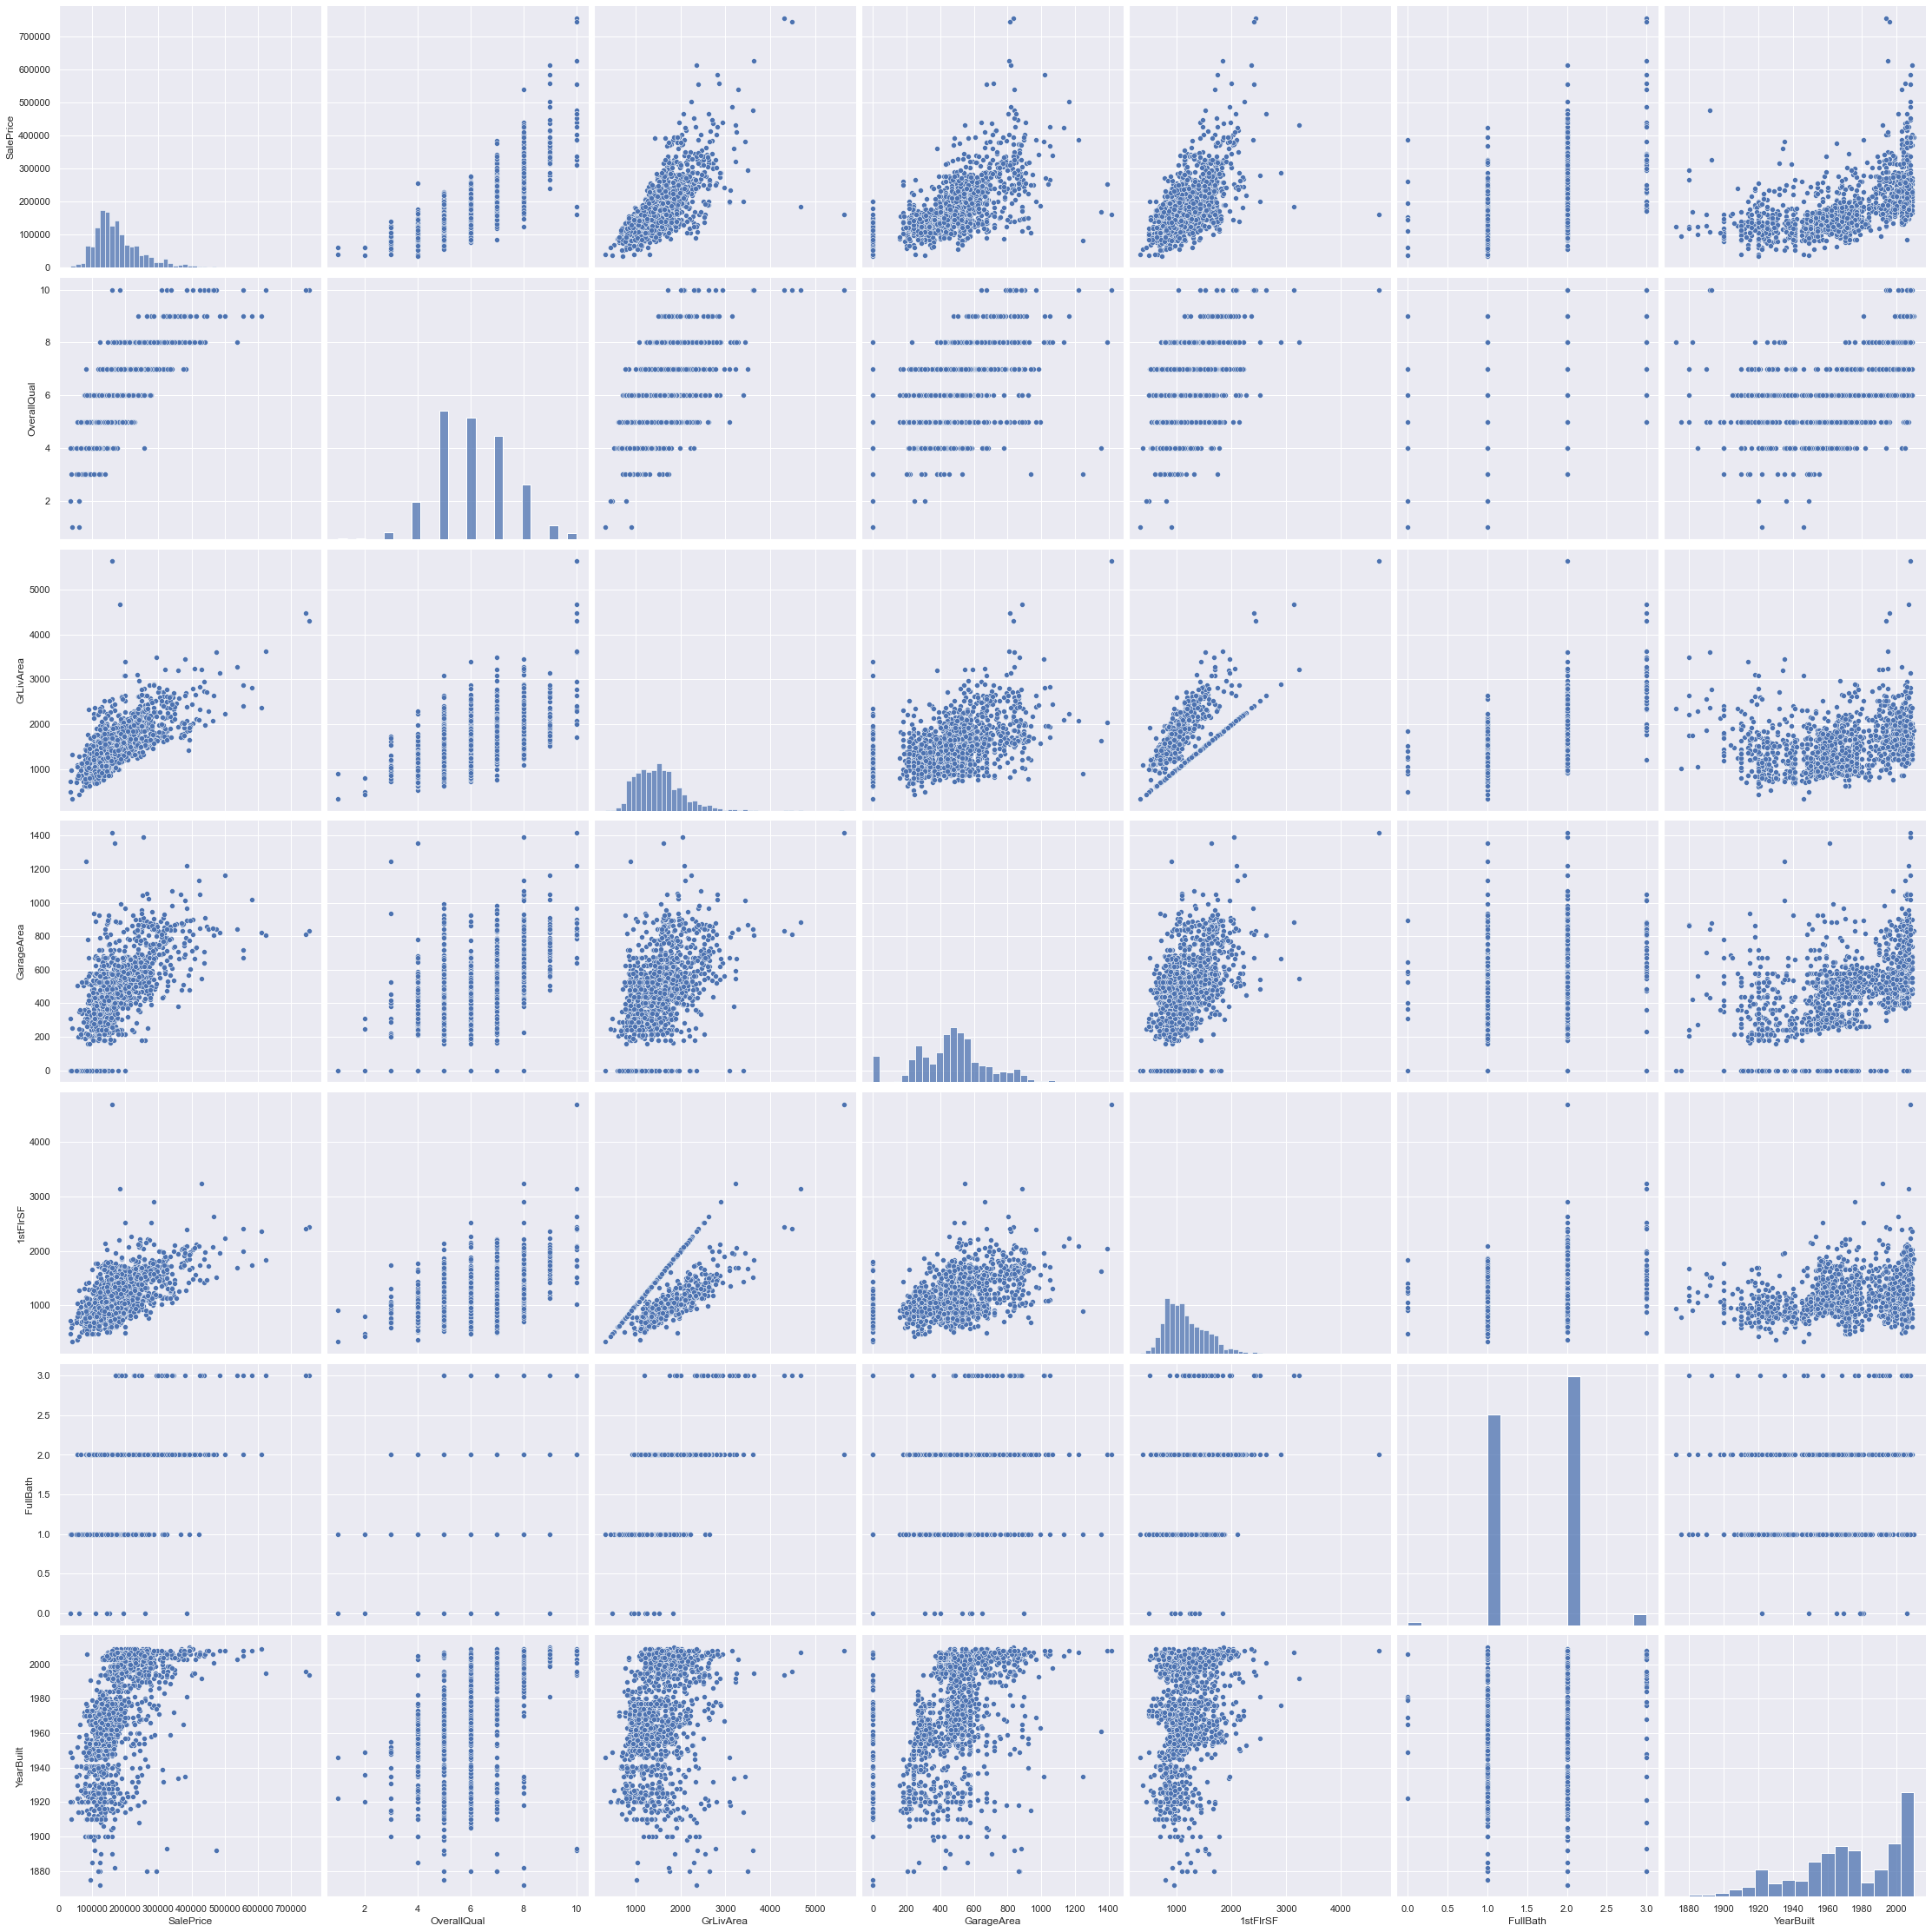

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 4.5)
plt.show()

C:\Users\Ayoub Marrakchi\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


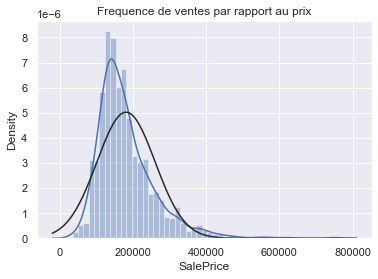

<Figure size 432x288 with 0 Axes>

In [12]:
sns.distplot(df['SalePrice'], fit=norm)
plt.title("Frequence de ventes par rapport au prix")
fig = plt.figure()

C:\Users\Ayoub Marrakchi\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


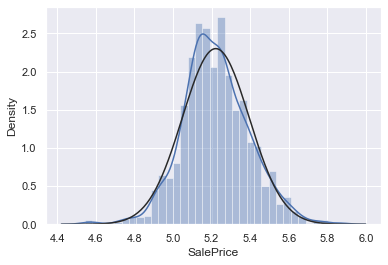

<Figure size 432x288 with 0 Axes>

In [13]:
sns.distplot(np.log10(df['SalePrice']), fit=norm)
fig = plt.figure()

C:\Users\Ayoub Marrakchi\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ayoub Marrakchi\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


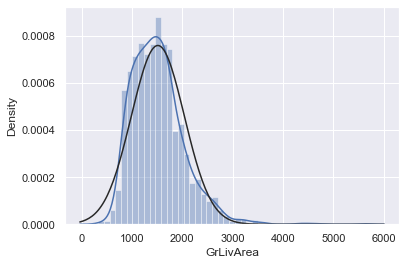

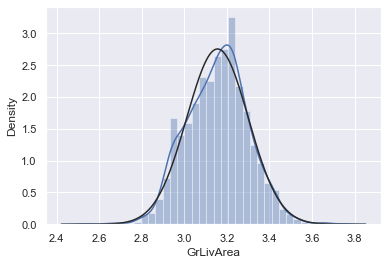

<Figure size 432x288 with 0 Axes>

In [14]:
sns.distplot(df['GrLivArea'], fit=norm)
fig = plt.figure()
sns.distplot(np.log10(df['GrLivArea']), fit=norm)
fig = plt.figure()

* L'application du logarithme sur "SalesPrice" et "GrLivArea" transforme la distrubution pour suivre une loi Normale. 

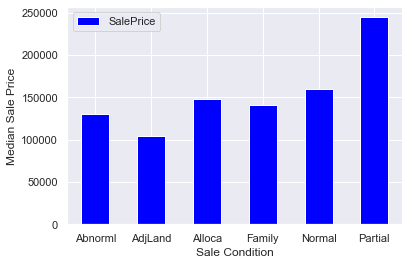

In [15]:
condition_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

* On remarque que les mediannes de 5 des attributs sont proches tandis que la medianne de l'attribut "Partial" et superieur donc c'est l'attribut le plus significatif

<AxesSubplot:xlabel='LandSlope'>

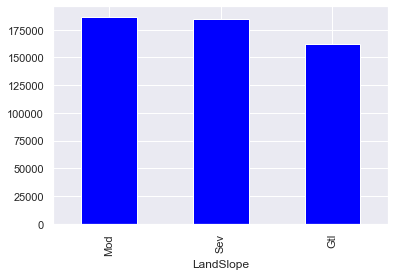

In [16]:
group = df.groupby("LandSlope").median()["SalePrice"]
group = group.sort_values(ascending=False)
group.plot(kind='bar', color='blue')

* pour le cas de "LandSlope" on remarque que l'écart de la mediane des prix entre la premiere et la dérniere valeur est non significatif

## 2. Pré-traitment de données

In [17]:
#detection des colonnes contenant trop de valeurs null
def get_null_cols(df: pd.DataFrame()):
    numeric_features = df.select_dtypes(include=[np.number])
    nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False))
    nulls.columns = ['Count']
    nulls['Count'] = (nulls['Count']/np.sum(df.shape[0]))*100
    nulls.index.name = 'Feature'
    nulls = nulls[nulls.Count > 0]
    return list(nulls[nulls.Count > 15].index)
get_null_cols(df)

['LotFrontage']

In [18]:
#detection des colonnes ou l'ecart entre les valeurs est non significatif (on pose un ecart de 0.3%)
def get_unbiased(df: pd.DataFrame()):
    l= []
    categoricals = df.select_dtypes(exclude=[np.number])
    categoricals = categoricals.join(df["MSSubClass"])
    categoricals = categoricals.join(df["SalePrice"])
    for col in categoricals.drop(columns=['SalePrice']):
        group = categoricals.groupby(col).median()["SalePrice"]
        group = group.sort_values(ascending=False)
        if(col!='MSSubClass'):
            if group[-1]/group[0]>0.70 :
                l = l+[col]
        else:
            if group[30]/group[60]>0.70 :
                l=l+[col]
    return l
get_unbiased(df)

['Street',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'BsmtFinType2',
 'Fence']

In [19]:
def get_dummie_cols(column: str):
    columns = []
    with open('house-prices-advanced-regression-techniques/data_collumns.json') as f:
      dct = json.load(f)
    columns = dct[column]
    return columns

In [20]:
def get_dummies(df: pd.DataFrame()):
    categoricals = df.select_dtypes(exclude=[np.number])
    for col in list(categoricals.columns):
        features = get_dummie_cols(col)
        for feature in features:
            df[col+'_'+str(feature)] = df[col].apply(lambda x: 1 if x == feature or (isinstance(x, float) and np.isnan(x) and feature=="NaN") else 0)
        df = df.drop(columns=[col])
    return df

df_dev = df[['Condition1','Condition2']]
df_dev = get_dummies(df_dev)
df_dev.head()
    

C:\Users\Ayoub Marrakchi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_RRNn  \
Id                                                                          
1                   0                 0                1                0   
2                   0                 1                0                0   
3                   0                 0                1                0   
4                   0                 0                1                0   
5                   0                 0                1                0   

    Condition1_RRAn  Condition1_PosN  Condition1_PosA  Condition1_RRNe  \
Id                                                                       
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
5                 0                0                0                0   

    Condition1_RRAe  Condition2_Artery  Condition2_Feedr  Condition2_Norm  \
Id                                                                          
1                 0                  0                 0                1   
2                 0                  0                 0                1   
3                 0                  0                 0                1   
4                 0                  0                 0                1   
5                 0                  0                 0                1   

    Condition2_RRNn  Condition2_RRAn  Condition2_PosN  Condition2_PosA  \
Id                                                                       
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
5                 0                0                0                0   

    Condition2_RRNe  Condition2_RRAe  
Id                                    
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
5                 0                0

In [21]:
#tranformer les donnes binaires (Y,N) en Boolean (1,0)
def handle_booleans(df: pd.DataFrame()):
    bool_cols = [col for col in df if
                 df[col].dropna().value_counts().index.isin(['N','Y']).all()]
    for col in bool_cols:
        df[col] = pd.get_dummies(df[col], drop_first=True)
df_dev = pd.DataFrame()
df_dev["CentralAir"] = df["CentralAir"]
handle_booleans(df_dev)
df_dev.head()

CentralAir
Id            
1            1
2            1
3            1
4            1
5            1

In [22]:
def clean_data(source: pd.DataFrame(), cible: pd.DataFrame()=None):
    if cible is None :
        cible = source
    #Suppression des colonnes ayant un bruit sur la predection    
    drop_cols = []
    drop_cols = drop_cols + get_faible_corr_cols(source) + get_null_cols(source) + get_unbiased(source) + ["YrSold"]
    cible = cible.drop(columns=drop_cols)
    #Transformation en booleans
    handle_booleans(cible)
    #transformation de la colonne "SaleCondition" en boolean
    cible['SaleCondition'] = cible.SaleCondition.apply(lambda x: 1 if x == 'Partial' else 0)
    #Remplire les valeurs nulls pour les donnees numeriques
    numeric_features = cible.select_dtypes(include=[np.number])
    nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False))
    nulls.columns = ['Count']
    missing_collumns = list(nulls[nulls.Count > 0].index)
    for col in missing_collumns:
        cible[col] = cible[col].fillna(cible[col].mean())
    #application du Log pour GrLivArea
    df["GrLivArea"] = df["GrLivArea"].apply(lambda x: np.log10(x))
    #transformer le type des colonnes disrcretes en string
    cible[['MoSold','MSSubClass']] = cible[['MoSold','MSSubClass']].astype(str)
    #creation des dummies collonnes pour les colonnes discretes
    cible = get_dummies(cible)
    return cible

In [23]:
df_dev = df.copy()
df_dev = clean_data(df, df_dev.drop(columns=["SalePrice"]))
df_dev.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                          
1      8450            7       2003          2003       196.0         706   
2      9600            6       1976          1976         0.0         978   
3     11250            7       2001          2002       162.0         486   
4      9550            7       1915          1970         0.0         216   
5     14260            8       2000          2000       350.0         655   

    TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  SaleType_WD  \
Id                                               ...                
1           856           1       856       854  ...            1   
2          1262           1      1262         0  ...            1   
3           920           1       920       866  ...            1   
4           756           1       961       756  ...            1   
5          1145           1      1145      1053  ...            1   

    SaleType_CWD  SaleType_VWD  SaleType_New  SaleType_COD  SaleType_Con  \
Id                                                                         
1              0             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   
5              0             0             0             0             0   

    SaleType_ConLw  SaleType_ConLI  SaleType_ConLD  SaleType_Oth  
Id                                                                
1                0               0               0             0  
2                0               0               0             0  
3                0               0               0             0  
4                0               0               0             0  
5                0               0               0             0  

[5 rows x 290 columns]

## 3. Apprentissage et test

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import KFold, RandomizedSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from joblib import dump

In [25]:
X = df_dev
Y = df["SalePrice"]
Y = np.log10(Y)
#devision du dataset en 75% pour l'entrainnement et 25% pour le test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=32, test_size=0.25)

In [26]:
def create_model(inputlayer=X.shape[1], nn1=200, nn2=100, nn3=10, dropout=0.2 ,lr=1e-2, decay=9e-3, opt="Adam"):
    
    #Definition de la taille du reseau
    inputlayer = inputlayer
    hiddenlayer1 = int(nn1)
    hiddenlayer2 = int(nn2)
    hiddenlayer3 = int(nn3)
    outputlayer = 1

    initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.30, seed=1)
    
    #Construction du model
    model = Sequential()
    model.add(Dense(units = hiddenlayer1, kernel_initializer = initializer, activation = 'tanh', bias_initializer='ones', input_dim = inputlayer))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units = hiddenlayer2, kernel_initializer = initializer, activation = 'tanh', bias_initializer='ones'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units = hiddenlayer3, kernel_initializer = initializer, activation = 'relu', bias_initializer='ones'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units = outputlayer, kernel_initializer = initializer, activation = 'relu', bias_initializer='ones'))
    
    #creation d'un taux d'apprentissage dégradant
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lr, decay_steps=800, decay_rate=decay)

    if opt == "RMSprop":
      optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)
    elif opt == "Adam":
      optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)


    model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])

    return model

In [27]:
#creation d'un wrapper du model pour Sci-kit learn
model = KerasRegressor(build_fn=create_model, epochs=800, batch_size=35, verbose=1)

cv = KFold(n_splits=5) #cv == cross_validation

#creation des intervales possibles pour les hyperparametres
space = dict()
space["nn1"] = sp.stats.uniform(150,250)
space["nn2"] = sp.stats.uniform(50,150)
space["nn3"] = sp.stats.uniform(10,50)
space["dropout"] = [0, 0.2, 0.3, 0.5]
space["lr"] = sp.stats.loguniform(1e-5, 1e-1)
space["decay"] = sp.stats.loguniform(9e-5,9e-1)
space["opt"] = ["RMSprop","Adam"]


#lancement d'un Random Search pour trouver les hyperparametres convenants aléatoirement
search = RandomizedSearchCV(model, space, n_iter=10, scoring='neg_mean_squared_error', cv=cv, random_state=1, verbose=20)

search_result = search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] decay=0.004191124174127609, dropout=0, lr=0.05373155847046794, nn1=182.03111198233918, nn2=199.8560772986217, nn3=21.804448847598803, opt=Adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 50.6065 - mean_squared_error: 50.6065
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 5/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 6/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 7/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 8/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 9/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
E

26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 78/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 153/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 154/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - ETA: 0s - loss: 27.3862 - mean_squared_error: 27.38 - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 223/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 225/800
26/26 [==============================] - 0

26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 291/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 292/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 293/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 362/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 363/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 366/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 367/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 434/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 437/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 438/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 439/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 440/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 441/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 507/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 508/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 509/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 510/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 511/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 578/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 582/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 726/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 727/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.34

26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 793/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 794/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 795/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3462 - mean_squared_error: 27.3462
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.004191124174127609, dropout=0, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 69.5535 - mean_squared_error: 69.5535
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3096
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 9/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
E

26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 74/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 77/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 79/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 81/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch

26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 146/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 147/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 149/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 150/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 151/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 153/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.30

26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 218/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 219/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 220/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 224/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 225/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.30

26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 292/800
26/26 [==============================] - 0s 13ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 293/800
26/26 [==============================] - 0s 12ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 294/800
26/26 [==============================] - 0s 15ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 295/800
26/26 [==============================] - 0s 11ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 296/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 297/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 2

26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 362/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 363/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3097
Epoch 364/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 365/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3097
Epoch 366/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 367/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 368/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 369/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.30

26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.30

26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 507/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 508/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 509/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 510/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 511/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 512/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 513/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.30

26/26 [==============================] - 0s 3ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 581/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 582/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 583/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 584/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 585/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.30

26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 649/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 650/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 651/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 652/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 653/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 654/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 655/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 656/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.30

26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 721/800
26/26 [==============================] - 1s 21ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 722/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 723/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 724/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 725/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 726/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 727/800
26/26 [==============================] - 0s 5ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 728/800
26/26 [==============================] - 0s 4ms/step - loss: 27.3097 - mean_squared_error: 27.3

26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 793/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 794/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 795/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 796/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 798/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3097 - mean_squared_error: 27.3097
Epoch 799/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3096 - mean_squared_error: 27.3096
Epoch 800/800
7/7 [==============================] - 0s 997us/step
[CV]  decay=0.004191124174127609, dropout=0

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


26/26 [==============================] - 0s 2ms/step - loss: 65.4554 - mean_squared_error: 65.4554
Epoch 2/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 4/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770: 0s - loss: 27.2716 - mean_squared_error: 27.27
Epoch 5/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 6/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 7/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 8/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 9/800
26/26 [==============================] - 0s 2ms/step - loss: 27.

26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 74/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 75/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 76/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 77/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 78/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 79/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2771
Epoch 80/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 81/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch

26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 146/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 147/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 149/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 150/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 151/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 153/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 218/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 219/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 220/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 223/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 224/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 225/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 291/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 294/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 295/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 296/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 297/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 362/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 363/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 364/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 365/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 366/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 367/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 369/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2770
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 509/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 510/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 582/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2771
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 651/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 652/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 653/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 654/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 657/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 795/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 796/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 798/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 799/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.004191124174127609, dropout=0, lr=0.05373155847046794, nn1=182.03111198233918, nn2=199.8560772986217, nn3=21.804448847598803, opt=Adam, score=-2

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.4min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 2ms/step - loss: 45.7635 - mean_squared_error: 45.7635
Epoch 2/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
E

26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 75/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 76/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 77/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 78/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 79/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 80/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 81/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 82/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 150/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 151/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 154/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 220/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 223/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 224/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 225/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 226/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 291/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 294/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 295/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 296/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 297/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 298/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 363/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 364/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 365/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212: 0s - loss: 27.2642 - mean_squared_error: 27.26
Epoch 366/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 367/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 369/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 370/800
26/26 [==============================] - 0s 2ms/

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 437/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 438/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 439/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 440/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 441/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 442/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 507/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 509/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 510/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 511/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 512/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 513/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 514/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 581/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 583/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 584/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 586/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 657/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 658/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 723/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 724/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 726/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 727/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 728/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 729/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 730/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.32

26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 795/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 798/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 799/800
26/26 [==============================] - 0s 2ms/step - loss: 27.3212 - mean_squared_error: 27.3212
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.004191124174127609, dropout=0, lr=0.05373155847046794, nn1=182.03111198233918, nn2=199.8560772986217, nn3=21.804448847598803, opt=Adam, score=-27.255, total=  53.5s
[CV] decay=0.004191124174127609, dropout=0, lr=0.05373155847046794, nn1=182.03111198233918, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.3min remaining:    0.0s


26/26 [==============================] - 0s 2ms/step - loss: 65.3991 - mean_squared_error: 65.3991
Epoch 2/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 3/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 4/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 5/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 6/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 7/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 8/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 9/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 10/800


26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 81/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 82/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 147/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 149/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 150/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 151/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 153/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 154/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 219/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 220/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 223/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 224/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 225/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 226/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 294/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 295/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 296/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 297/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 298/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 363/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 365/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 366/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 367/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 369/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 370/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 437/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 438/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 439/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 440/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 441/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 442/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 507/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 508/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 509/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 510/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 511/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 512/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 513/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 514/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 581/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 583/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 584/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 585/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 586/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 657/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 658/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 723/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 724/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 726/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 727/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 728/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 729/800
26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 2ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.004191124174127609, dropout=0, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 4ms/step - loss: 7.3974 - mean_squared_error: 7.3974
Epoch 2/800
26/26 [==============================] - 0s 4ms/step - loss: 1.8036 - mean_squared_error: 1.8036
Epoch 3/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2498 - mean_squared_error: 1.2498
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0262 - mean_squared_error: 1.0262
Epoch 5/800
26/26 [==============================] - 0s 4ms/step - loss: 0.9200 - mean_squared_error: 0.9200
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8319 - mean_squared_error: 0.8319
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8033 - mean_squared_error: 0.8033
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8130 - mean_squared_error: 0.8130
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8036 - mean_squared_error: 0.8036
Epoch 10/800
26/26 

26/26 [==============================] - 0s 4ms/step - loss: 0.6996 - mean_squared_error: 0.6996
Epoch 76/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6775 - mean_squared_error: 0.6775
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7185 - mean_squared_error: 0.7185
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6560 - mean_squared_error: 0.6560
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6882 - mean_squared_error: 0.6882
Epoch 80/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6550 - mean_squared_error: 0.6550
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6758 - mean_squared_error: 0.6758
Epoch 82/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7368 - mean_squared_error: 0.7368
Epoch 83/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6791 - mean_squared_error: 0.6791
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 0.6635 - mean_squared_error: 0.6635
Epoch 150/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7143 - mean_squared_error: 0.7143
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6592 - mean_squared_error: 0.6592
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6685 - mean_squared_error: 0.6685
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6970 - mean_squared_error: 0.6970
Epoch 154/800
26/26 [==============================] - 0s 7ms/step - loss: 0.6962 - mean_squared_error: 0.6962
Epoch 155/800
26/26 [==============================] - 0s 5ms/step - loss: 0.6370 - mean_squared_error: 0.6370
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6453 - mean_squared_error: 0.6453
Epoch 157/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7247 - mean_squared_error: 0.7247
Epoch 158/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.6904 - mean_squared_error: 0.6904
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7028 - mean_squared_error: 0.7028
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6572 - mean_squared_error: 0.6572
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6910 - mean_squared_error: 0.6910
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6876 - mean_squared_error: 0.6876
Epoch 227/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6556 - mean_squared_error: 0.6556
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6473 - mean_squared_error: 0.6473
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6264 - mean_squared_error: 0.6264
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6659 - mean_squared_error: 0.6659
Epoch 231/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.6805 - mean_squared_error: 0.6805
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7285 - mean_squared_error: 0.7285
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6573 - mean_squared_error: 0.6573
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6816 - mean_squared_error: 0.6816
Epoch 299/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6943 - mean_squared_error: 0.6943
Epoch 300/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6729 - mean_squared_error: 0.6729
Epoch 301/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6563 - mean_squared_error: 0.6563
Epoch 302/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6638 - mean_squared_error: 0.6638
Epoch 303/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7026 - mean_squared_error: 0.7026
Epoch 304/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7011 - mean_squared_error: 0.7011
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6663 - mean_squared_error: 0.6663
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6250 - mean_squared_error: 0.6250
Epoch 371/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6657 - mean_squared_error: 0.6657
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7075 - mean_squared_error: 0.7075
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6899 - mean_squared_error: 0.6899
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6418 - mean_squared_error: 0.6418
Epoch 375/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6921 - mean_squared_error: 0.6921
Epoch 376/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6645 - mean_squared_error: 0.6645
Epoch 377/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.6747 - mean_squared_error: 0.6747
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6903 - mean_squared_error: 0.6903
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7025 - mean_squared_error: 0.7025
Epoch 444/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7416 - mean_squared_error: 0.7416
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7140 - mean_squared_error: 0.7140
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6780 - mean_squared_error: 0.6780
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6830 - mean_squared_error: 0.6830
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6383 - mean_squared_error: 0.6383
Epoch 449/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6424 - mean_squared_error: 0.6424
Epoch 450/800
2

26/26 [==============================] - 0s 5ms/step - loss: 0.6519 - mean_squared_error: 0.6519
Epoch 515/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7177 - mean_squared_error: 0.7177
Epoch 516/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6160 - mean_squared_error: 0.6160
Epoch 517/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7388 - mean_squared_error: 0.7388
Epoch 518/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7098 - mean_squared_error: 0.7098
Epoch 519/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7415 - mean_squared_error: 0.7415
Epoch 520/800
26/26 [==============================] - 0s 6ms/step - loss: 0.7096 - mean_squared_error: 0.7096
Epoch 521/800
26/26 [==============================] - 0s 5ms/step - loss: 0.6830 - mean_squared_error: 0.6830
Epoch 522/800
26/26 [==============================] - 0s 5ms/step - loss: 0.6664 - mean_squared_error: 0.6664
Epoch 523/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.6633 - mean_squared_error: 0.6633
Epoch 588/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6195 - mean_squared_error: 0.6195
Epoch 589/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6309 - mean_squared_error: 0.6309
Epoch 590/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7275 - mean_squared_error: 0.7275
Epoch 591/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7329 - mean_squared_error: 0.7329
Epoch 592/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6896 - mean_squared_error: 0.6896
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6528 - mean_squared_error: 0.6528
Epoch 594/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6373 - mean_squared_error: 0.6373
Epoch 595/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6609 - mean_squared_error: 0.6609
Epoch 596/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7400 - mean_squared_error: 0.7400
Epoch 661/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7078 - mean_squared_error: 0.7078
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6790 - mean_squared_error: 0.6790
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6808 - mean_squared_error: 0.6808
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6501 - mean_squared_error: 0.6501
Epoch 665/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7065 - mean_squared_error: 0.7065
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6797 - mean_squared_error: 0.6797
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6675 - mean_squared_error: 0.6675
Epoch 668/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6883 - mean_squared_error: 0.6883
Epoch 669/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7371 - mean_squared_error: 0.7371
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6606 - mean_squared_error: 0.6606
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6680 - mean_squared_error: 0.6680
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7379 - mean_squared_error: 0.7379
Epoch 737/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6708 - mean_squared_error: 0.6708
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7191 - mean_squared_error: 0.7191
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6690 - mean_squared_error: 0.6690
Epoch 740/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6562 - mean_squared_error: 0.6562
Epoch 741/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6789 - mean_squared_error: 0.6789
Epoch 742/800
2

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.6min remaining:    0.0s


26/26 [==============================] - 0s 5ms/step - loss: 16.0832 - mean_squared_error: 16.0832
Epoch 2/800
26/26 [==============================] - 0s 4ms/step - loss: 1.6503 - mean_squared_error: 1.6503
Epoch 3/800
26/26 [==============================] - 0s 4ms/step - loss: 1.3187 - mean_squared_error: 1.3187
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1729 - mean_squared_error: 1.1729
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.9478 - mean_squared_error: 0.9478
Epoch 6/800
26/26 [==============================] - 0s 4ms/step - loss: 0.9545 - mean_squared_error: 0.9545
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8277 - mean_squared_error: 0.8277
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8022 - mean_squared_error: 0.8022
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8256 - mean_squared_error: 0.8256
Epoch 10/800
26/26 [=========

Epoch 74/800
26/26 [==============================] - 0s 6ms/step - loss: 0.7412 - mean_squared_error: 0.7412
Epoch 75/800
26/26 [==============================] - 0s 7ms/step - loss: 0.6882 - mean_squared_error: 0.6882
Epoch 76/800
26/26 [==============================] - 0s 6ms/step - loss: 0.7057 - mean_squared_error: 0.7057
Epoch 77/800
26/26 [==============================] - ETA: 0s - loss: 0.7245 - mean_squared_error: 0.72 - 0s 7ms/step - loss: 0.7344 - mean_squared_error: 0.7344
Epoch 78/800
26/26 [==============================] - 0s 6ms/step - loss: 0.6931 - mean_squared_error: 0.6931
Epoch 79/800
26/26 [==============================] - 0s 6ms/step - loss: 0.7590 - mean_squared_error: 0.7590
Epoch 80/800
26/26 [==============================] - 0s 7ms/step - loss: 0.7422 - mean_squared_error: 0.7422
Epoch 81/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7126 - mean_squared_error: 0.7126
Epoch 82/800
26/26 [==============================] - 0s 6ms/step - 

26/26 [==============================] - 0s 4ms/step - loss: 0.7368 - mean_squared_error: 0.7368
Epoch 148/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7499 - mean_squared_error: 0.7499
Epoch 149/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7029 - mean_squared_error: 0.7029
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7390 - mean_squared_error: 0.7390
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7365 - mean_squared_error: 0.7365
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6434 - mean_squared_error: 0.6434
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8071 - mean_squared_error: 0.8071
Epoch 154/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6658 - mean_squared_error: 0.6658
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7373 - mean_squared_error: 0.7373
Epoch 156/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7238 - mean_squared_error: 0.7238
Epoch 221/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6725 - mean_squared_error: 0.6725
Epoch 222/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7528 - mean_squared_error: 0.7528
Epoch 223/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7138 - mean_squared_error: 0.7138
Epoch 224/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7309 - mean_squared_error: 0.7309
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7430 - mean_squared_error: 0.7430
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7051 - mean_squared_error: 0.7051
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6836 - mean_squared_error: 0.6836
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7366 - mean_squared_error: 0.7366
Epoch 229/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.6768 - mean_squared_error: 0.6768
Epoch 294/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7005 - mean_squared_error: 0.7005
Epoch 295/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6954 - mean_squared_error: 0.6954
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7419 - mean_squared_error: 0.7419
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7205 - mean_squared_error: 0.7205
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7593 - mean_squared_error: 0.7593
Epoch 299/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6731 - mean_squared_error: 0.6731
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7300 - mean_squared_error: 0.7300
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7086 - mean_squared_error: 0.7086
Epoch 302/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.6648 - mean_squared_error: 0.6648
Epoch 367/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6935 - mean_squared_error: 0.6935
Epoch 368/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7145 - mean_squared_error: 0.7145
Epoch 369/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7315 - mean_squared_error: 0.7315
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7345 - mean_squared_error: 0.7345
Epoch 371/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6664 - mean_squared_error: 0.6664
Epoch 372/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6977 - mean_squared_error: 0.6977
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7004 - mean_squared_error: 0.7004
Epoch 374/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6958 - mean_squared_error: 0.6958
Epoch 375/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7341 - mean_squared_error: 0.7341
Epoch 440/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6950 - mean_squared_error: 0.6950
Epoch 441/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7231 - mean_squared_error: 0.7231
Epoch 442/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6883 - mean_squared_error: 0.6883
Epoch 443/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7637 - mean_squared_error: 0.7637
Epoch 444/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6850 - mean_squared_error: 0.6850
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7375 - mean_squared_error: 0.7375
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7382 - mean_squared_error: 0.7382
Epoch 447/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7023 - mean_squared_error: 0.7023
Epoch 448/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7152 - mean_squared_error: 0.7152
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6800 - mean_squared_error: 0.6800
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7225 - mean_squared_error: 0.7225
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6821 - mean_squared_error: 0.6821
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6596 - mean_squared_error: 0.6596
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6942 - mean_squared_error: 0.6942
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6905 - mean_squared_error: 0.6905
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7391 - mean_squared_error: 0.7391
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7070 - mean_squared_error: 0.7070
Epoch 521/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7033 - mean_squared_error: 0.7033
Epoch 586/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7604 - mean_squared_error: 0.7604
Epoch 587/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7054 - mean_squared_error: 0.7054
Epoch 588/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7242 - mean_squared_error: 0.7242
Epoch 589/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7062 - mean_squared_error: 0.7062
Epoch 590/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6797 - mean_squared_error: 0.6797
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7374 - mean_squared_error: 0.7374
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6846 - mean_squared_error: 0.6846
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6742 - mean_squared_error: 0.6742
Epoch 594/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.6959 - mean_squared_error: 0.6959
Epoch 659/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7390 - mean_squared_error: 0.7390
Epoch 660/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6560 - mean_squared_error: 0.6560
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6998 - mean_squared_error: 0.6998
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6794 - mean_squared_error: 0.6794
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6695 - mean_squared_error: 0.6695
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6668 - mean_squared_error: 0.6668
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7610 - mean_squared_error: 0.7610
Epoch 666/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7523 - mean_squared_error: 0.7523
Epoch 667/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7384 - mean_squared_error: 0.7384
Epoch 732/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6834 - mean_squared_error: 0.6834
Epoch 733/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6969 - mean_squared_error: 0.6969
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6989 - mean_squared_error: 0.6989
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7633 - mean_squared_error: 0.7633
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6733 - mean_squared_error: 0.6733
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7384 - mean_squared_error: 0.7384
Epoch 738/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7109 - mean_squared_error: 0.7109
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6981 - mean_squared_error: 0.6981
Epoch 740/800
2

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  8.0min remaining:    0.0s



26/26 [==============================] - 0s 3ms/step - loss: 9.4966 - mean_squared_error: 9.4966
Epoch 2/800
26/26 [==============================] - 0s 4ms/step - loss: 1.5125 - mean_squared_error: 1.5125
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2893 - mean_squared_error: 1.2893
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1599 - mean_squared_error: 1.1599
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0820 - mean_squared_error: 1.0820
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.9325 - mean_squared_error: 0.9325
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.9592 - mean_squared_error: 0.9592
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8644 - mean_squared_error: 0.8644
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8679 - mean_squared_error: 0.8679
Epoch 10/800
26/26 [==========

26/26 [==============================] - 0s 6ms/step - loss: 0.7613 - mean_squared_error: 0.7613: 0s - loss: 0.7468 - mean_squared_error: 0.
Epoch 76/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7918 - mean_squared_error: 0.7918
Epoch 77/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7904 - mean_squared_error: 0.7904
Epoch 78/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7917 - mean_squared_error: 0.7917
Epoch 79/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8560 - mean_squared_error: 0.8560
Epoch 80/800
26/26 [==============================] - 0s 5ms/step - loss: 0.8329 - mean_squared_error: 0.8329
Epoch 81/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7781 - mean_squared_error: 0.7781
Epoch 82/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7907 - mean_squared_error: 0.7907
Epoch 83/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7203 - mean_s

26/26 [==============================] - 0s 3ms/step - loss: 0.7803 - mean_squared_error: 0.7803
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7781 - mean_squared_error: 0.7781
Epoch 150/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7435 - mean_squared_error: 0.7435
Epoch 151/800
26/26 [==============================] - 0s 5ms/step - loss: 0.8293 - mean_squared_error: 0.8293
Epoch 152/800
26/26 [==============================] - 0s 5ms/step - loss: 0.7253 - mean_squared_error: 0.7253
Epoch 153/800
26/26 [==============================] - 0s 6ms/step - loss: 0.8784 - mean_squared_error: 0.8784
Epoch 154/800
26/26 [==============================] - 0s 5ms/step - loss: 0.8284 - mean_squared_error: 0.8284
Epoch 155/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7413 - mean_squared_error: 0.7413
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8153 - mean_squared_error: 0.8153
Epoch 157/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7907 - mean_squared_error: 0.7907
Epoch 220/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7348 - mean_squared_error: 0.7348
Epoch 221/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8619 - mean_squared_error: 0.8619
Epoch 222/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7760 - mean_squared_error: 0.7760
Epoch 223/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7948 - mean_squared_error: 0.7948
Epoch 224/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8772 - mean_squared_error: 0.8772
Epoch 225/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8416 - mean_squared_error: 0.8416
Epoch 226/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7863 - mean_squared_error: 0.7863
Epoch 227/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7984 - mean_squared_error: 0.7984
Epoch 228/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7868 - mean_squared_error: 0.7868
Epoch 293/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7622 - mean_squared_error: 0.7622
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7676 - mean_squared_error: 0.7676
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7755 - mean_squared_error: 0.7755
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7503 - mean_squared_error: 0.7503
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7558 - mean_squared_error: 0.7558
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7874 - mean_squared_error: 0.7874
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7111 - mean_squared_error: 0.7111
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7464 - mean_squared_error: 0.7464
Epoch 301/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.7956 - mean_squared_error: 0.7956
Epoch 366/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7539 - mean_squared_error: 0.7539
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7244 - mean_squared_error: 0.7244
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7876 - mean_squared_error: 0.7876
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7724 - mean_squared_error: 0.7724
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7344 - mean_squared_error: 0.7344
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7365 - mean_squared_error: 0.7365
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8139 - mean_squared_error: 0.8139
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7973 - mean_squared_error: 0.7973
Epoch 374/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7417 - mean_squared_error: 0.7417
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8642 - mean_squared_error: 0.8642
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7506 - mean_squared_error: 0.7506
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8033 - mean_squared_error: 0.8033
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8126 - mean_squared_error: 0.8126
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7823 - mean_squared_error: 0.7823
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8171 - mean_squared_error: 0.8171
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7850 - mean_squared_error: 0.7850
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7689 - mean_squared_error: 0.7689
Epoch 447/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.8291 - mean_squared_error: 0.8291
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7537 - mean_squared_error: 0.7537
Epoch 513/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8177 - mean_squared_error: 0.8177
Epoch 514/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7941 - mean_squared_error: 0.7941
Epoch 515/800
26/26 [==============================] - 0s 4ms/step - loss: 0.6878 - mean_squared_error: 0.6878
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7271 - mean_squared_error: 0.7271
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7563 - mean_squared_error: 0.7563
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8096 - mean_squared_error: 0.8096
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8146 - mean_squared_error: 0.8146
Epoch 520/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.8428 - mean_squared_error: 0.8428
Epoch 585/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7199 - mean_squared_error: 0.7199
Epoch 586/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7721 - mean_squared_error: 0.7721
Epoch 587/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8268 - mean_squared_error: 0.8268
Epoch 588/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8575 - mean_squared_error: 0.8575
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8299 - mean_squared_error: 0.8299
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7353 - mean_squared_error: 0.7353
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7471 - mean_squared_error: 0.7471
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8383 - mean_squared_error: 0.8383
Epoch 593/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.8320 - mean_squared_error: 0.8320
Epoch 658/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7704 - mean_squared_error: 0.7704
Epoch 659/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8436 - mean_squared_error: 0.8436
Epoch 660/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8034 - mean_squared_error: 0.8034
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8453 - mean_squared_error: 0.8453
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8409 - mean_squared_error: 0.8409
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7936 - mean_squared_error: 0.7936
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8252 - mean_squared_error: 0.8252
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8229 - mean_squared_error: 0.8229
Epoch 666/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.8087 - mean_squared_error: 0.8087
Epoch 731/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7710 - mean_squared_error: 0.7710
Epoch 732/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8276 - mean_squared_error: 0.8276
Epoch 733/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8105 - mean_squared_error: 0.8105
Epoch 734/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8032 - mean_squared_error: 0.8032
Epoch 735/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7261 - mean_squared_error: 0.7261: 0s - loss: 0.6954 - mean_squared_error: 0.69
Epoch 736/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7602 - mean_squared_error: 0.7602
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8470 - mean_squared_error: 0.8470
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.784

Epoch 1/800


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  9.4min remaining:    0.0s


26/26 [==============================] - 0s 3ms/step - loss: 27.5430 - mean_squared_error: 27.5430
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 23.0183 - mean_squared_error: 23.0183
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 22.2457 - mean_squared_error: 22.2457
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 21.7797 - mean_squared_error: 21.7797
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 22.1075 - mean_squared_error: 22.1075
Epoch 6/800
26/26 [==============================] - 0s 4ms/step - loss: 21.8363 - mean_squared_error: 21.8363
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 22.1282 - mean_squared_error: 22.1282
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 21.8296 - mean_squared_error: 21.8296
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 21.7990 - mean_squared_error: 21.7990
Epoch 10/800


Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1009 - mean_squared_error: 1.1009
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1132 - mean_squared_error: 1.1132
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1817 - mean_squared_error: 1.1817
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 1.3107 - mean_squared_error: 1.3107
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2642 - mean_squared_error: 1.2642
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2871 - mean_squared_error: 1.2871
Epoch 81/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1190 - mean_squared_error: 1.1190
Epoch 82/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1906 - mean_squared_error: 1.1906
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1384 - mean_squared_error: 1.1384
Epoch 84/8

26/26 [==============================] - 0s 4ms/step - loss: 1.0248 - mean_squared_error: 1.0248
Epoch 149/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1300 - mean_squared_error: 1.1300
Epoch 150/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1536 - mean_squared_error: 1.1536
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2099 - mean_squared_error: 1.2099
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2382 - mean_squared_error: 1.2382
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2019 - mean_squared_error: 1.2019
Epoch 154/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0942 - mean_squared_error: 1.0942
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1986 - mean_squared_error: 1.1986
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1351 - mean_squared_error: 1.1351
Epoch 157/800
2

26/26 [==============================] - 0s 4ms/step - loss: 1.0802 - mean_squared_error: 1.0802
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2586 - mean_squared_error: 1.2586
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1725 - mean_squared_error: 1.1725
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1104 - mean_squared_error: 1.1104
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1367 - mean_squared_error: 1.1367
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0634 - mean_squared_error: 1.0634
Epoch 227/800
26/26 [==============================] - ETA: 0s - loss: 1.2089 - mean_squared_error: 1.20 - 0s 3ms/step - loss: 1.2330 - mean_squared_error: 1.2330
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2722 - mean_squared_error: 1.2722
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 4ms/step - loss: 1.1380 - mean_squared_error: 1.1380
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2189 - mean_squared_error: 1.2189
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1526 - mean_squared_error: 1.1526
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1396 - mean_squared_error: 1.1396
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2266 - mean_squared_error: 1.2266
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2260 - mean_squared_error: 1.2260
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2816 - mean_squared_error: 1.2816
Epoch 301/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2686 - mean_squared_error: 1.2686
Epoch 302/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2042 - mean_squared_error: 1.2042
Epoch 303/800
2

26/26 [==============================] - 0s 3ms/step - loss: 1.0964 - mean_squared_error: 1.0964
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1464 - mean_squared_error: 1.1464
Epoch 369/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1686 - mean_squared_error: 1.1686
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1105 - mean_squared_error: 1.1105
Epoch 371/800
26/26 [==============================] - 0s 4ms/step - loss: 1.3873 - mean_squared_error: 1.3873
Epoch 372/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0978 - mean_squared_error: 1.0978
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1012 - mean_squared_error: 1.1012
Epoch 374/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2621 - mean_squared_error: 1.2621
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2356 - mean_squared_error: 1.2356
Epoch 376/800
2

26/26 [==============================] - 0s 3ms/step - loss: 1.2732 - mean_squared_error: 1.2732
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0822 - mean_squared_error: 1.0822
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0989 - mean_squared_error: 1.0989
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2242 - mean_squared_error: 1.2242
Epoch 444/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1846 - mean_squared_error: 1.1846
Epoch 445/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1166 - mean_squared_error: 1.1166
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 1.3664 - mean_squared_error: 1.3664
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1815 - mean_squared_error: 1.1815
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2521 - mean_squared_error: 1.2521
Epoch 449/800
2

26/26 [==============================] - 0s 4ms/step - loss: 1.1387 - mean_squared_error: 1.1387
Epoch 514/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2298 - mean_squared_error: 1.2298
Epoch 515/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1627 - mean_squared_error: 1.1627
Epoch 516/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0783 - mean_squared_error: 1.0783
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1470 - mean_squared_error: 1.1470
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0369 - mean_squared_error: 1.0369
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2424 - mean_squared_error: 1.2424
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1637 - mean_squared_error: 1.1637
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0470 - mean_squared_error: 1.0470
Epoch 522/800
2

26/26 [==============================] - 0s 4ms/step - loss: 1.2271 - mean_squared_error: 1.2271
Epoch 587/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1963 - mean_squared_error: 1.1963
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1198 - mean_squared_error: 1.1198
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2142 - mean_squared_error: 1.2142
Epoch 590/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1401 - mean_squared_error: 1.1401
Epoch 591/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0850 - mean_squared_error: 1.0850
Epoch 592/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0502 - mean_squared_error: 1.0502
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2245 - mean_squared_error: 1.2245
Epoch 594/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2297 - mean_squared_error: 1.2297
Epoch 595/800
2

26/26 [==============================] - 0s 4ms/step - loss: 1.1938 - mean_squared_error: 1.1938
Epoch 660/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1583 - mean_squared_error: 1.1583
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1568 - mean_squared_error: 1.1568
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1884 - mean_squared_error: 1.1884
Epoch 663/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1767 - mean_squared_error: 1.1767
Epoch 664/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2502 - mean_squared_error: 1.2502
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1135 - mean_squared_error: 1.1135
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1481 - mean_squared_error: 1.1481
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1760 - mean_squared_error: 1.1760
Epoch 668/800
2

26/26 [==============================] - 0s 4ms/step - loss: 1.1845 - mean_squared_error: 1.1845
Epoch 733/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1510 - mean_squared_error: 1.1510
Epoch 734/800
26/26 [==============================] - 0s 4ms/step - loss: 1.2138 - mean_squared_error: 1.2138
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 1.2408 - mean_squared_error: 1.2408
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1767 - mean_squared_error: 1.1767
Epoch 737/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0289 - mean_squared_error: 1.0289
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0820 - mean_squared_error: 1.0820
Epoch 739/800
26/26 [==============================] - 0s 4ms/step - loss: 1.0631 - mean_squared_error: 1.0631
Epoch 740/800
26/26 [==============================] - 0s 4ms/step - loss: 1.1372 - mean_squared_error: 1.1372
Epoch 741/800
2

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 10.8min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 24.5577 - mean_squared_error: 24.5577
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6544 - mean_squared_error: 2.6544
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 1.5958 - mean_squared_error: 1.5958
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 1.1941 - mean_squared_error: 1.1941
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 1.0081 - mean_squared_error: 1.0081
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8887 - mean_squared_error: 0.8887
Epoch 7/800
26/26 [==============================] - 0s 4ms/step - loss: 0.9687 - mean_squared_error: 0.9687
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8438 - mean_squared_error: 0.8438
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8307 - mean_squared_error: 0.8307
Epoch 10/800
26/2

26/26 [==============================] - 0s 3ms/step - loss: 0.8046 - mean_squared_error: 0.8046
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7407 - mean_squared_error: 0.7407
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8252 - mean_squared_error: 0.8252
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8417 - mean_squared_error: 0.8417
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8100 - mean_squared_error: 0.8100
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8363 - mean_squared_error: 0.8363
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.6852 - mean_squared_error: 0.6852
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7827 - mean_squared_error: 0.7827
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8155 - mean_squared_error: 0.8155
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 0.8390 - mean_squared_error: 0.8390
Epoch 150/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7358 - mean_squared_error: 0.7358
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7960 - mean_squared_error: 0.7960
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8071 - mean_squared_error: 0.8071
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7389 - mean_squared_error: 0.7389
Epoch 154/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7212 - mean_squared_error: 0.7212
Epoch 155/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8710 - mean_squared_error: 0.8710
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7443 - mean_squared_error: 0.7443
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7968 - mean_squared_error: 0.7968
Epoch 158/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7862 - mean_squared_error: 0.7862
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8147 - mean_squared_error: 0.8147
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7958 - mean_squared_error: 0.7958
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8350 - mean_squared_error: 0.8350
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7641 - mean_squared_error: 0.7641
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8077 - mean_squared_error: 0.8077
Epoch 228/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8345 - mean_squared_error: 0.8345
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8174 - mean_squared_error: 0.8174
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7661 - mean_squared_error: 0.7661
Epoch 231/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.8249 - mean_squared_error: 0.8249
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7294 - mean_squared_error: 0.7294
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7482 - mean_squared_error: 0.7482
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8227 - mean_squared_error: 0.8227
Epoch 299/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7755 - mean_squared_error: 0.7755
Epoch 300/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8132 - mean_squared_error: 0.8132
Epoch 301/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7751 - mean_squared_error: 0.7751
Epoch 302/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7815 - mean_squared_error: 0.7815
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8088 - mean_squared_error: 0.8088
Epoch 304/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.8124 - mean_squared_error: 0.8124
Epoch 369/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8250 - mean_squared_error: 0.8250
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8148 - mean_squared_error: 0.8148
Epoch 371/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8062 - mean_squared_error: 0.8062
Epoch 372/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7968 - mean_squared_error: 0.7968
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7835 - mean_squared_error: 0.7835
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8719 - mean_squared_error: 0.8719
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7126 - mean_squared_error: 0.7126
Epoch 376/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8075 - mean_squared_error: 0.8075
Epoch 377/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7944 - mean_squared_error: 0.7944
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7781 - mean_squared_error: 0.7781
Epoch 443/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8038 - mean_squared_error: 0.8038
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7235 - mean_squared_error: 0.7235
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8225 - mean_squared_error: 0.8225
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8159 - mean_squared_error: 0.8159
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8087 - mean_squared_error: 0.8087
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8044 - mean_squared_error: 0.8044
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7931 - mean_squared_error: 0.7931
Epoch 450/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.8164 - mean_squared_error: 0.8164
Epoch 515/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8282 - mean_squared_error: 0.8282
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7811 - mean_squared_error: 0.7811
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7579 - mean_squared_error: 0.7579
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8012 - mean_squared_error: 0.8012
Epoch 519/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7674 - mean_squared_error: 0.7674
Epoch 520/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7854 - mean_squared_error: 0.7854
Epoch 521/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7745 - mean_squared_error: 0.7745
Epoch 522/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7910 - mean_squared_error: 0.7910
Epoch 523/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7441 - mean_squared_error: 0.7441
Epoch 588/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8270 - mean_squared_error: 0.8270
Epoch 589/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8465 - mean_squared_error: 0.8465
Epoch 590/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7763 - mean_squared_error: 0.7763
Epoch 591/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7576 - mean_squared_error: 0.7576
Epoch 592/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7448 - mean_squared_error: 0.7448
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7817 - mean_squared_error: 0.7817
Epoch 594/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7800 - mean_squared_error: 0.7800
Epoch 595/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8235 - mean_squared_error: 0.8235
Epoch 596/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7749 - mean_squared_error: 0.7749
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7720 - mean_squared_error: 0.7720
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7826 - mean_squared_error: 0.7826
Epoch 663/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8293 - mean_squared_error: 0.8293
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8107 - mean_squared_error: 0.8107
Epoch 665/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8162 - mean_squared_error: 0.8162
Epoch 666/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8057 - mean_squared_error: 0.8057
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8457 - mean_squared_error: 0.8457
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7593 - mean_squared_error: 0.7593
Epoch 669/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.7780 - mean_squared_error: 0.7780
Epoch 734/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7320 - mean_squared_error: 0.7320
Epoch 735/800
26/26 [==============================] - 0s 4ms/step - loss: 0.8023 - mean_squared_error: 0.8023
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7431 - mean_squared_error: 0.7431
Epoch 737/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7974 - mean_squared_error: 0.7974
Epoch 738/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7330 - mean_squared_error: 0.7330
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.7433 - mean_squared_error: 0.7433
Epoch 740/800
26/26 [==============================] - 0s 4ms/step - loss: 0.7651 - mean_squared_error: 0.7651
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 0.8054 - mean_squared_error: 0.8054
Epoch 742/800
2

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 12.1min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 22.0467 - mean_squared_error: 22.0467
Epoch 2/800
26/26 [==============================] - 0s 2ms/step - loss: 21.3308 - mean_squared_error: 21.3308
Epoch 3/800
26/26 [==============================] - 0s 2ms/step - loss: 21.3920 - mean_squared_error: 21.3920
Epoch 4/800
26/26 [==============================] - 0s 2ms/step - loss: 22.2633 - mean_squared_error: 22.2633
Epoch 5/800
26/26 [==============================] - 0s 2ms/step - loss: 21.9643 - mean_squared_error: 21.9643
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4750 - mean_squared_error: 21.4750
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0928 - mean_squared_error: 21.0928
Epoch 8/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8565 - mean_squared_error: 20.8565
Epoch 9/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6882 - mean_squared_error: 20.6882
E

26/26 [==============================] - 0s 2ms/step - loss: 19.4234 - mean_squared_error: 19.4234
Epoch 75/800
26/26 [==============================] - 0s 2ms/step - loss: 21.5690 - mean_squared_error: 21.5690
Epoch 76/800
26/26 [==============================] - 0s 2ms/step - loss: 19.9788 - mean_squared_error: 19.9788
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1449 - mean_squared_error: 21.1449
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0961 - mean_squared_error: 20.0961
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3846 - mean_squared_error: 20.3846
Epoch 80/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1626 - mean_squared_error: 20.1626
Epoch 81/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0198 - mean_squared_error: 20.0198
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 21.7391 - mean_squared_error: 21.7391
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 20.2339 - mean_squared_error: 20.2339
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6623 - mean_squared_error: 20.6623
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5275 - mean_squared_error: 20.5275
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0449 - mean_squared_error: 20.0449
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1525 - mean_squared_error: 20.1525
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0642 - mean_squared_error: 20.0642
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1978 - mean_squared_error: 21.1978
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 22.2151 - mean_squared_error: 22.2151
Epoch 154/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6007 - mean_squared_error: 20.60

26/26 [==============================] - 0s 3ms/step - loss: 20.8113 - mean_squared_error: 20.8113
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9991 - mean_squared_error: 19.9991
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6364 - mean_squared_error: 20.6364
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8645 - mean_squared_error: 20.8645
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4956 - mean_squared_error: 20.4956
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6788 - mean_squared_error: 20.6788
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1061 - mean_squared_error: 20.1061
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0203 - mean_squared_error: 21.0203
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2484 - mean_squared_error: 20.24

26/26 [==============================] - 0s 3ms/step - loss: 21.2121 - mean_squared_error: 21.2121
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1423 - mean_squared_error: 20.1423
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3483 - mean_squared_error: 20.3483
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 21.9286 - mean_squared_error: 21.9286
Epoch 294/800
26/26 [==============================] - 0s 2ms/step - loss: 20.2756 - mean_squared_error: 20.2756
Epoch 295/800
26/26 [==============================] - 0s 2ms/step - loss: 21.6663 - mean_squared_error: 21.6663
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0188 - mean_squared_error: 21.0188
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8815 - mean_squared_error: 20.8815
Epoch 298/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8968 - mean_squared_error: 20.89

26/26 [==============================] - 0s 3ms/step - loss: 20.3091 - mean_squared_error: 20.3091
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1582 - mean_squared_error: 21.1582
Epoch 364/800
26/26 [==============================] - 0s 2ms/step - loss: 22.1652 - mean_squared_error: 22.1652
Epoch 365/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8423 - mean_squared_error: 20.8423
Epoch 366/800
26/26 [==============================] - 0s 2ms/step - loss: 21.2213 - mean_squared_error: 21.2213
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4938 - mean_squared_error: 20.4938
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6265 - mean_squared_error: 20.6265
Epoch 369/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0799 - mean_squared_error: 20.0799
Epoch 370/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1859 - mean_squared_error: 20.18

26/26 [==============================] - 0s 3ms/step - loss: 21.0368 - mean_squared_error: 21.0368
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7576 - mean_squared_error: 20.7576
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0041 - mean_squared_error: 20.0041
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0018 - mean_squared_error: 21.0018
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6405 - mean_squared_error: 20.6405
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4526 - mean_squared_error: 21.4526
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0987 - mean_squared_error: 21.0987
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 19.3872 - mean_squared_error: 19.3872
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5620 - mean_squared_error: 20.56

26/26 [==============================] - 0s 3ms/step - loss: 20.1908 - mean_squared_error: 20.1908
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8697 - mean_squared_error: 20.8697
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7158 - mean_squared_error: 20.7158
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2091 - mean_squared_error: 20.2091
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6211 - mean_squared_error: 20.6211
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8269 - mean_squared_error: 19.8269
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2528 - mean_squared_error: 20.2528
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3174 - mean_squared_error: 21.3174
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5028 - mean_squared_error: 20.50

26/26 [==============================] - 0s 2ms/step - loss: 20.3142 - mean_squared_error: 20.3142
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8802 - mean_squared_error: 20.8802
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1873 - mean_squared_error: 20.1873
Epoch 581/800
26/26 [==============================] - 0s 2ms/step - loss: 20.7850 - mean_squared_error: 20.7850
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6164 - mean_squared_error: 20.6164
Epoch 583/800
26/26 [==============================] - 0s 2ms/step - loss: 21.2927 - mean_squared_error: 21.2927
Epoch 584/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0268 - mean_squared_error: 20.0268
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3211 - mean_squared_error: 20.3211
Epoch 586/800
26/26 [==============================] - 0s 3ms/step - loss: 21.5317 - mean_squared_error: 21.53

26/26 [==============================] - 0s 3ms/step - loss: 20.4038 - mean_squared_error: 20.4038
Epoch 651/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1459 - mean_squared_error: 21.1459
Epoch 652/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7612 - mean_squared_error: 19.7612
Epoch 653/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3180 - mean_squared_error: 20.3180
Epoch 654/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5119 - mean_squared_error: 20.5119
Epoch 655/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8135 - mean_squared_error: 20.8135
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4995 - mean_squared_error: 20.4995
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0079 - mean_squared_error: 21.0079
Epoch 658/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2352 - mean_squared_error: 20.23

26/26 [==============================] - 0s 3ms/step - loss: 20.7973 - mean_squared_error: 20.7973
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1502 - mean_squared_error: 20.1502
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3154 - mean_squared_error: 21.3154
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 19.0016 - mean_squared_error: 19.0016
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8201 - mean_squared_error: 20.8201
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1291 - mean_squared_error: 21.1291
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3854 - mean_squared_error: 20.3854
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7611 - mean_squared_error: 20.7611
Epoch 730/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9607 - mean_squared_error: 19.96

26/26 [==============================] - 0s 3ms/step - loss: 20.3747 - mean_squared_error: 20.3747
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1849 - mean_squared_error: 21.1849
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 22.2852 - mean_squared_error: 22.2852
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2023 - mean_squared_error: 20.2023
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8898 - mean_squared_error: 19.8898
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 21.6954 - mean_squared_error: 21.6954
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.60347723675426, nn2=187.09430368688493, nn3=32.86024039934941, opt=Adam, score=-13.867, total= 1.0min
[CV] decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.603477

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 13.2min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 22.4056 - mean_squared_error: 22.4056
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 22.2142 - mean_squared_error: 22.2142
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3489 - mean_squared_error: 21.3489
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3295 - mean_squared_error: 21.3295
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 22.0886 - mean_squared_error: 22.0886
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0120 - mean_squared_error: 21.0120
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2970 - mean_squared_error: 21.2970
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4994 - mean_squared_error: 20.4994
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8957 - mean_squared_error: 20.8957
E

26/26 [==============================] - 0s 5ms/step - loss: 20.6458 - mean_squared_error: 20.6458
Epoch 75/800
26/26 [==============================] - 0s 4ms/step - loss: 21.3463 - mean_squared_error: 21.3463
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2929 - mean_squared_error: 20.2929
Epoch 77/800
26/26 [==============================] - 0s 4ms/step - loss: 20.2916 - mean_squared_error: 20.2916
Epoch 78/800
26/26 [==============================] - 0s 5ms/step - loss: 19.2371 - mean_squared_error: 19.2371
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7209 - mean_squared_error: 19.7209
Epoch 80/800
26/26 [==============================] - 0s 6ms/step - loss: 20.7886 - mean_squared_error: 20.7886
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 19.5643 - mean_squared_error: 19.5643
Epoch 82/800
26/26 [==============================] - 0s 5ms/step - loss: 20.7211 - mean_squared_error: 20.7211
Epoch

26/26 [==============================] - 0s 4ms/step - loss: 19.4025 - mean_squared_error: 19.4025
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 19.5459 - mean_squared_error: 19.5459
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8370 - mean_squared_error: 19.8370
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2155 - mean_squared_error: 21.2155
Epoch 150/800
26/26 [==============================] - 0s 4ms/step - loss: 20.4807 - mean_squared_error: 20.4807
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 20.8300 - mean_squared_error: 20.8300
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 20.6705 - mean_squared_error: 20.6705
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 20.3499 - mean_squared_error: 20.3499
Epoch 154/800
26/26 [==============================] - 0s 4ms/step - loss: 20.5313 - mean_squared_error: 20.53

26/26 [==============================] - 0s 3ms/step - loss: 21.2837 - mean_squared_error: 21.2837
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6442 - mean_squared_error: 19.6442
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0051 - mean_squared_error: 20.0052
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6688 - mean_squared_error: 20.6688
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1799 - mean_squared_error: 21.1799
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5154 - mean_squared_error: 20.5154
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0412 - mean_squared_error: 20.0412
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9159 - mean_squared_error: 19.9159
Epoch 226/800
26/26 [==============================] - 0s 2ms/step - loss: 21.0167 - mean_squared_error: 21.01

26/26 [==============================] - 0s 3ms/step - loss: 20.7757 - mean_squared_error: 20.7757
Epoch 290/800
26/26 [==============================] - 0s 4ms/step - loss: 21.3755 - mean_squared_error: 21.3755
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0685 - mean_squared_error: 20.0685
Epoch 292/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3594 - mean_squared_error: 20.3594
Epoch 293/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1972 - mean_squared_error: 20.1972
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2388 - mean_squared_error: 20.2388
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7526 - mean_squared_error: 20.7526
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6113 - mean_squared_error: 20.6113
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7101 - mean_squared_error: 19.71

26/26 [==============================] - 0s 3ms/step - loss: 20.7207 - mean_squared_error: 20.7207
Epoch 362/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6166 - mean_squared_error: 19.6166
Epoch 363/800
26/26 [==============================] - 0s 4ms/step - loss: 21.3398 - mean_squared_error: 21.3398
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4104 - mean_squared_error: 20.4104
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3124 - mean_squared_error: 20.3124
Epoch 366/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3818 - mean_squared_error: 21.3818
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7340 - mean_squared_error: 20.7340
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1682 - mean_squared_error: 20.1682
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2212 - mean_squared_error: 21.22

26/26 [==============================] - 0s 3ms/step - loss: 20.2155 - mean_squared_error: 20.2155
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8581 - mean_squared_error: 19.8581
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 19.4966 - mean_squared_error: 19.4966
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7186 - mean_squared_error: 20.7186
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9166 - mean_squared_error: 19.9166
Epoch 438/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0543 - mean_squared_error: 20.0543
Epoch 439/800
26/26 [==============================] - 0s 2ms/step - loss: 19.4070 - mean_squared_error: 19.4070
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6519 - mean_squared_error: 19.6519
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4012 - mean_squared_error: 20.40

26/26 [==============================] - 0s 2ms/step - loss: 20.2027 - mean_squared_error: 20.2027
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 19.5461 - mean_squared_error: 19.5461
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7861 - mean_squared_error: 20.7861
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1747 - mean_squared_error: 20.1747
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5775 - mean_squared_error: 20.5775
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0957 - mean_squared_error: 21.0957
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8962 - mean_squared_error: 20.8962
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1398 - mean_squared_error: 20.1398
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 19.2750 - mean_squared_error: 19.27

26/26 [==============================] - 0s 3ms/step - loss: 20.4428 - mean_squared_error: 20.4428
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2283 - mean_squared_error: 20.2283
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6545 - mean_squared_error: 19.6545
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3151 - mean_squared_error: 20.3151
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7930 - mean_squared_error: 20.7930
Epoch 582/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1559 - mean_squared_error: 20.1559
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0279 - mean_squared_error: 21.0279
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7077 - mean_squared_error: 20.7077
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6857 - mean_squared_error: 20.68

26/26 [==============================] - 0s 3ms/step - loss: 20.6028 - mean_squared_error: 20.6028
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2092 - mean_squared_error: 21.2092
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3220 - mean_squared_error: 20.3220
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8090 - mean_squared_error: 20.8090
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1791 - mean_squared_error: 20.1791
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3648 - mean_squared_error: 20.3648
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6663 - mean_squared_error: 20.6663
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8938 - mean_squared_error: 19.8938
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8811 - mean_squared_error: 20.88

26/26 [==============================] - 0s 3ms/step - loss: 20.1324 - mean_squared_error: 20.1324
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9203 - mean_squared_error: 20.9203
Epoch 722/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6609 - mean_squared_error: 20.6609
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9758 - mean_squared_error: 20.9758
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2332 - mean_squared_error: 21.2332
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4120 - mean_squared_error: 20.4120
Epoch 726/800
26/26 [==============================] - 0s 2ms/step - loss: 20.9704 - mean_squared_error: 20.9704
Epoch 727/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1473 - mean_squared_error: 20.1473
Epoch 728/800
26/26 [==============================] - 0s 2ms/step - loss: 20.9608 - mean_squared_error: 20.96

26/26 [==============================] - 0s 3ms/step - loss: 19.9660 - mean_squared_error: 19.9660
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 21.5264 - mean_squared_error: 21.5264
Epoch 794/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8680 - mean_squared_error: 20.8680
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0036 - mean_squared_error: 21.0036
Epoch 796/800
26/26 [==============================] - 0s 2ms/step - loss: 20.6205 - mean_squared_error: 20.6205
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1271 - mean_squared_error: 20.1271
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7968 - mean_squared_error: 20.7968
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2586 - mean_squared_error: 21.2586
Epoch 800/800
7/7 [==============================] - 0s 997us/step
[CV]  decay=0.0005916317989624499, dropout=

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 14.3min remaining:    0.0s


26/26 [==============================] - 0s 3ms/step - loss: 22.3419 - mean_squared_error: 22.3419
Epoch 2/800
26/26 [==============================] - 0s 2ms/step - loss: 21.9085 - mean_squared_error: 21.9085
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0021 - mean_squared_error: 21.0021
Epoch 4/800
26/26 [==============================] - 0s 2ms/step - loss: 21.0547 - mean_squared_error: 21.0547
Epoch 5/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4057 - mean_squared_error: 20.4057
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9007 - mean_squared_error: 20.9007
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1249 - mean_squared_error: 21.1249
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0669 - mean_squared_error: 21.0669
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5674 - mean_squared_error: 20.5674
Epoch 10/800


26/26 [==============================] - 0s 3ms/step - loss: 21.5667 - mean_squared_error: 21.5667
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2053 - mean_squared_error: 20.2053
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3063 - mean_squared_error: 20.3063
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8028 - mean_squared_error: 20.8028
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7278 - mean_squared_error: 20.7278
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7474 - mean_squared_error: 19.7474
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3260 - mean_squared_error: 21.3260
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1453 - mean_squared_error: 20.1453
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0143 - mean_squared_error: 20.0143
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 19.6589 - mean_squared_error: 19.6589
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0387 - mean_squared_error: 21.0387
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 20.5323 - mean_squared_error: 20.5323
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 19.1755 - mean_squared_error: 19.1755
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9348 - mean_squared_error: 19.9348
Epoch 151/800
26/26 [==============================] - 0s 2ms/step - loss: 19.9268 - mean_squared_error: 19.9268
Epoch 152/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3683 - mean_squared_error: 20.3683
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2686 - mean_squared_error: 21.2686
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6199 - mean_squared_error: 20.61

26/26 [==============================] - 0s 3ms/step - loss: 21.0923 - mean_squared_error: 21.0923
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7760 - mean_squared_error: 20.7760
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5275 - mean_squared_error: 20.5275
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7129 - mean_squared_error: 19.7129
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1827 - mean_squared_error: 20.1827
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0604 - mean_squared_error: 20.0604
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3109 - mean_squared_error: 20.3109
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6494 - mean_squared_error: 20.6494
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3885 - mean_squared_error: 20.38

26/26 [==============================] - 0s 3ms/step - loss: 20.2385 - mean_squared_error: 20.2385
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2744 - mean_squared_error: 20.2744
Epoch 292/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1260 - mean_squared_error: 21.1260
Epoch 293/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3058 - mean_squared_error: 20.3058
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5090 - mean_squared_error: 20.5090
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4369 - mean_squared_error: 20.4369
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8543 - mean_squared_error: 20.8543
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2218 - mean_squared_error: 21.2218
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4908 - mean_squared_error: 20.49

26/26 [==============================] - 0s 3ms/step - loss: 21.1891 - mean_squared_error: 21.1891
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5723 - mean_squared_error: 20.5723
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6824 - mean_squared_error: 19.6824
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1765 - mean_squared_error: 20.1765
Epoch 366/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6084 - mean_squared_error: 19.6084
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5140 - mean_squared_error: 20.5140
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7216 - mean_squared_error: 20.7216
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1584 - mean_squared_error: 20.1584
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6235 - mean_squared_error: 19.62

26/26 [==============================] - 0s 3ms/step - loss: 19.9090 - mean_squared_error: 19.9090
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2256 - mean_squared_error: 20.2256
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 21.1701 - mean_squared_error: 21.1701
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0913 - mean_squared_error: 21.0913
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1237 - mean_squared_error: 21.1237
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 19.6310 - mean_squared_error: 19.6310
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 19.5809 - mean_squared_error: 19.5809
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7115 - mean_squared_error: 20.7115
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4434 - mean_squared_error: 21.44

26/26 [==============================] - 0s 5ms/step - loss: 19.5941 - mean_squared_error: 19.5941
Epoch 507/800
26/26 [==============================] - 0s 4ms/step - loss: 20.5905 - mean_squared_error: 20.5905
Epoch 508/800
26/26 [==============================] - 0s 4ms/step - loss: 20.5007 - mean_squared_error: 20.5007
Epoch 509/800
26/26 [==============================] - 0s 5ms/step - loss: 21.1535 - mean_squared_error: 21.1535
Epoch 510/800
26/26 [==============================] - 0s 4ms/step - loss: 19.6692 - mean_squared_error: 19.6692
Epoch 511/800
26/26 [==============================] - 0s 5ms/step - loss: 20.5246 - mean_squared_error: 20.5246
Epoch 512/800
26/26 [==============================] - 0s 5ms/step - loss: 20.1738 - mean_squared_error: 20.1738
Epoch 513/800
26/26 [==============================] - 0s 4ms/step - loss: 20.0650 - mean_squared_error: 20.0650
Epoch 514/800
26/26 [==============================] - 0s 4ms/step - loss: 20.9599 - mean_squared_error: 20.95

26/26 [==============================] - 0s 4ms/step - loss: 21.0501 - mean_squared_error: 21.0501
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 21.7539 - mean_squared_error: 21.7539
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4158 - mean_squared_error: 20.4158
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4750 - mean_squared_error: 20.4750
Epoch 582/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1250 - mean_squared_error: 21.1250
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7958 - mean_squared_error: 20.7958
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4855 - mean_squared_error: 20.4855
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8063 - mean_squared_error: 20.8063
Epoch 586/800
26/26 [==============================] - 0s 2ms/step - loss: 20.2014 - mean_squared_error: 20.20

26/26 [==============================] - 0s 3ms/step - loss: 19.2911 - mean_squared_error: 19.2911
Epoch 651/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9352 - mean_squared_error: 20.9352
Epoch 652/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7745 - mean_squared_error: 19.7745
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 21.1287 - mean_squared_error: 21.1287
Epoch 654/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3686 - mean_squared_error: 20.3686
Epoch 655/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2466 - mean_squared_error: 21.2466
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 19.4730 - mean_squared_error: 19.4730
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1457 - mean_squared_error: 20.1457
Epoch 658/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7270 - mean_squared_error: 20.72

26/26 [==============================] - 0s 3ms/step - loss: 20.4201 - mean_squared_error: 20.4201
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2568 - mean_squared_error: 20.2568
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3081 - mean_squared_error: 21.3081
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8816 - mean_squared_error: 19.8816
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7528 - mean_squared_error: 20.7528
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3046 - mean_squared_error: 20.3046
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1114 - mean_squared_error: 20.1114
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3781 - mean_squared_error: 21.3781
Epoch 730/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3784 - mean_squared_error: 20.37

26/26 [==============================] - 0s 3ms/step - loss: 22.0978 - mean_squared_error: 22.0978
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6046 - mean_squared_error: 20.6046
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9094 - mean_squared_error: 20.9094
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0342 - mean_squared_error: 20.0342
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9355 - mean_squared_error: 20.9355
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5400 - mean_squared_error: 20.5400
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.60347723675426, nn2=187.09430368688493, nn3=32.86024039934941, opt=Adam, score=-11.053, total= 1.1min
[CV] decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.603477

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 15.4min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 2ms/step - loss: 22.8487 - mean_squared_error: 22.8487
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 22.1747 - mean_squared_error: 22.1747
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 22.1081 - mean_squared_error: 22.1081
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1944 - mean_squared_error: 21.1944
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7080 - mean_squared_error: 20.7080
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9477 - mean_squared_error: 20.9477
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 21.9195 - mean_squared_error: 21.9195
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 21.7607 - mean_squared_error: 21.7607
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3755 - mean_squared_error: 20.3755
E

26/26 [==============================] - 0s 3ms/step - loss: 20.9783 - mean_squared_error: 20.9783
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4420 - mean_squared_error: 20.4420
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4221 - mean_squared_error: 20.4221
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3520 - mean_squared_error: 20.3520
Epoch 78/800
26/26 [==============================] - 0s 2ms/step - loss: 21.3475 - mean_squared_error: 21.3475
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0311 - mean_squared_error: 20.0311
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8224 - mean_squared_error: 19.8224
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9279 - mean_squared_error: 19.9279
Epoch 82/800
26/26 [==============================] - 0s 2ms/step - loss: 21.1819 - mean_squared_error: 21.1819
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 20.9294 - mean_squared_error: 20.9294
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9855 - mean_squared_error: 20.9855
Epoch 148/800
26/26 [==============================] - 0s 2ms/step - loss: 20.7290 - mean_squared_error: 20.7290
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4949 - mean_squared_error: 21.4949
Epoch 150/800
26/26 [==============================] - 0s 2ms/step - loss: 19.9701 - mean_squared_error: 19.9701
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8866 - mean_squared_error: 19.8866
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8671 - mean_squared_error: 20.8671
Epoch 153/800
26/26 [==============================] - 0s 2ms/step - loss: 21.4552 - mean_squared_error: 21.4552
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0040 - mean_squared_error: 20.00

26/26 [==============================] - 0s 3ms/step - loss: 20.3404 - mean_squared_error: 20.3404
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7343 - mean_squared_error: 20.7343
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7193 - mean_squared_error: 20.7193
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 19.6866 - mean_squared_error: 19.6866
Epoch 222/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0477 - mean_squared_error: 20.0477
Epoch 223/800
26/26 [==============================] - 0s 2ms/step - loss: 20.0872 - mean_squared_error: 20.0872
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 21.6963 - mean_squared_error: 21.6963
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 21.5870 - mean_squared_error: 21.5870
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2896 - mean_squared_error: 20.28

26/26 [==============================] - 0s 2ms/step - loss: 20.7834 - mean_squared_error: 20.7834
Epoch 291/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4844 - mean_squared_error: 20.4844
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 20.9978 - mean_squared_error: 20.9978
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 21.7401 - mean_squared_error: 21.7401
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3237 - mean_squared_error: 20.3237
Epoch 295/800
26/26 [==============================] - 0s 2ms/step - loss: 20.9914 - mean_squared_error: 20.9914
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3209 - mean_squared_error: 20.3209
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8429 - mean_squared_error: 20.8429
Epoch 298/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8617 - mean_squared_error: 20.86

26/26 [==============================] - 0s 3ms/step - loss: 20.0143 - mean_squared_error: 20.0143
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7322 - mean_squared_error: 20.7322
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5843 - mean_squared_error: 20.5843
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4433 - mean_squared_error: 20.4433
Epoch 366/800
26/26 [==============================] - 0s 2ms/step - loss: 20.3855 - mean_squared_error: 20.3855
Epoch 367/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4909 - mean_squared_error: 20.4909
Epoch 368/800
26/26 [==============================] - 0s 2ms/step - loss: 20.8236 - mean_squared_error: 20.8236
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2571 - mean_squared_error: 20.2571
Epoch 370/800
26/26 [==============================] - 0s 2ms/step - loss: 20.1736 - mean_squared_error: 20.17

26/26 [==============================] - 0s 3ms/step - loss: 22.5923 - mean_squared_error: 22.5923
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2273 - mean_squared_error: 21.2273
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1365 - mean_squared_error: 20.1365
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9280 - mean_squared_error: 20.9280
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3317 - mean_squared_error: 20.3317
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6902 - mean_squared_error: 20.6902
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8403 - mean_squared_error: 20.8403
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6592 - mean_squared_error: 20.6592
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7043 - mean_squared_error: 20.70

26/26 [==============================] - 0s 3ms/step - loss: 20.5798 - mean_squared_error: 20.5798
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0479 - mean_squared_error: 21.0479
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7793 - mean_squared_error: 20.7793
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 21.9343 - mean_squared_error: 21.9343
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3506 - mean_squared_error: 21.3506
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3790 - mean_squared_error: 20.3790
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6115 - mean_squared_error: 20.6115
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3611 - mean_squared_error: 21.3611
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6399 - mean_squared_error: 20.63

26/26 [==============================] - 0s 3ms/step - loss: 20.6687 - mean_squared_error: 20.6687
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8722 - mean_squared_error: 20.8722
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 20.7435 - mean_squared_error: 20.7435
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4252 - mean_squared_error: 20.4252
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4853 - mean_squared_error: 20.4853
Epoch 583/800
26/26 [==============================] - 0s 2ms/step - loss: 21.4090 - mean_squared_error: 21.4090
Epoch 584/800
26/26 [==============================] - 0s 2ms/step - loss: 20.2911 - mean_squared_error: 20.2911
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5548 - mean_squared_error: 20.5548
Epoch 586/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7909 - mean_squared_error: 20.79

26/26 [==============================] - 0s 3ms/step - loss: 19.9705 - mean_squared_error: 19.9705
Epoch 651/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1458 - mean_squared_error: 20.1458
Epoch 652/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5902 - mean_squared_error: 20.5902
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 20.7712 - mean_squared_error: 20.7712
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 19.9642 - mean_squared_error: 19.9642
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 20.4138 - mean_squared_error: 20.4138
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9494 - mean_squared_error: 20.9494
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2007 - mean_squared_error: 20.2007
Epoch 658/800
26/26 [==============================] - 0s 3ms/step - loss: 19.5984 - mean_squared_error: 19.59

26/26 [==============================] - 0s 3ms/step - loss: 20.8451 - mean_squared_error: 20.8451
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7815 - mean_squared_error: 19.7815
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9657 - mean_squared_error: 19.9657
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2628 - mean_squared_error: 20.2628
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0984 - mean_squared_error: 21.0984
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0055 - mean_squared_error: 20.0055
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3935 - mean_squared_error: 20.3935
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6180 - mean_squared_error: 20.6180
Epoch 730/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8291 - mean_squared_error: 20.82

26/26 [==============================] - 0s 3ms/step - loss: 21.1674 - mean_squared_error: 21.1674
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2243 - mean_squared_error: 20.2243
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4592 - mean_squared_error: 20.4592
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9647 - mean_squared_error: 20.9647
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1536 - mean_squared_error: 21.1536
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2392 - mean_squared_error: 20.2392
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.60347723675426, nn2=187.09430368688493, nn3=32.86024039934941, opt=Adam, score=-13.450, total= 1.1min
[CV] decay=0.0005916317989624499, dropout=0.3, lr=8.285311763978989e-05, nn1=283.603477

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 16.5min remaining:    0.0s


26/26 [==============================] - 0s 3ms/step - loss: 21.5608 - mean_squared_error: 21.5608
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 21.9001 - mean_squared_error: 21.9001
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 22.1302 - mean_squared_error: 22.1302
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7922 - mean_squared_error: 20.7922
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9288 - mean_squared_error: 20.9288
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2105 - mean_squared_error: 21.2105
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7108 - mean_squared_error: 20.7108
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8211 - mean_squared_error: 20.8211
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0307 - mean_squared_error: 20.0307
Epoch 10/800


26/26 [==============================] - 0s 3ms/step - loss: 20.2029 - mean_squared_error: 20.2029
Epoch 74/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2002 - mean_squared_error: 21.2002
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5182 - mean_squared_error: 20.5182
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1645 - mean_squared_error: 20.1645
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4107 - mean_squared_error: 20.4107
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4688 - mean_squared_error: 20.4688
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 21.6731 - mean_squared_error: 21.6731
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3286 - mean_squared_error: 20.3286
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1630 - mean_squared_error: 21.1630
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 19.8860 - mean_squared_error: 19.8860
Epoch 146/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1485 - mean_squared_error: 20.1485
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0947 - mean_squared_error: 21.0947
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4685 - mean_squared_error: 20.4685
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 23.1275 - mean_squared_error: 23.1275
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6299 - mean_squared_error: 20.6299
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 21.9407 - mean_squared_error: 21.9407
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0851 - mean_squared_error: 21.0851
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8405 - mean_squared_error: 20.84

26/26 [==============================] - 0s 3ms/step - loss: 21.1769 - mean_squared_error: 21.1769
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 19.9887 - mean_squared_error: 19.9887
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4280 - mean_squared_error: 20.4280
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1531 - mean_squared_error: 21.1531
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9362 - mean_squared_error: 20.9362
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8863 - mean_squared_error: 20.8863
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 19.7922 - mean_squared_error: 19.7922
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7055 - mean_squared_error: 20.7055
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1843 - mean_squared_error: 20.18

26/26 [==============================] - 0s 4ms/step - loss: 20.5480 - mean_squared_error: 20.5480: 0s - loss: 20.5376 - mean_squared_error: 20.53
Epoch 289/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8037 - mean_squared_error: 20.8037
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2014 - mean_squared_error: 21.2014
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0019 - mean_squared_error: 20.0019
Epoch 292/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1689 - mean_squared_error: 20.1689
Epoch 293/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5107 - mean_squared_error: 20.5107
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 20.0252 - mean_squared_error: 20.0252
Epoch 295/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3140 - mean_squared_error: 20.3140
Epoch 296/800
26/26 [==============================] - 0s 3ms/

26/26 [==============================] - 0s 3ms/step - loss: 21.2550 - mean_squared_error: 21.2550
Epoch 361/800
26/26 [==============================] - 0s 4ms/step - loss: 20.8346 - mean_squared_error: 20.8346
Epoch 362/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9786 - mean_squared_error: 20.9786
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9210 - mean_squared_error: 20.9210
Epoch 364/800
26/26 [==============================] - 0s 4ms/step - loss: 20.7542 - mean_squared_error: 20.7542
Epoch 365/800
26/26 [==============================] - 0s 6ms/step - loss: 20.4966 - mean_squared_error: 20.4966
Epoch 366/800
26/26 [==============================] - 0s 5ms/step - loss: 21.3903 - mean_squared_error: 21.3903
Epoch 367/800
26/26 [==============================] - 0s 4ms/step - loss: 20.5475 - mean_squared_error: 20.5475
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1439 - mean_squared_error: 20.14

26/26 [==============================] - 0s 3ms/step - loss: 20.1796 - mean_squared_error: 20.1796
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8889 - mean_squared_error: 20.8889
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 21.3484 - mean_squared_error: 21.3484
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1016 - mean_squared_error: 20.1016
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7304 - mean_squared_error: 20.7304
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8431 - mean_squared_error: 20.8431
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7645 - mean_squared_error: 20.7645
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6608 - mean_squared_error: 20.6608
Epoch 440/800
26/26 [==============================] - 0s 4ms/step - loss: 21.0699 - mean_squared_error: 21.06

26/26 [==============================] - 0s 4ms/step - loss: 20.0634 - mean_squared_error: 20.0634
Epoch 504/800
26/26 [==============================] - 0s 4ms/step - loss: 21.4514 - mean_squared_error: 21.4514
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8442 - mean_squared_error: 20.8442
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 19.8281 - mean_squared_error: 19.8281
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3647 - mean_squared_error: 20.3647
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 20.5195 - mean_squared_error: 20.5195
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 20.6844 - mean_squared_error: 20.6844
Epoch 510/800
26/26 [==============================] - 0s 4ms/step - loss: 20.3889 - mean_squared_error: 20.3889
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 21.6498 - mean_squared_error: 21.64

26/26 [==============================] - 0s 3ms/step - loss: 20.2172 - mean_squared_error: 20.2172
Epoch 576/800
26/26 [==============================] - 0s 4ms/step - loss: 20.1576 - mean_squared_error: 20.1576
Epoch 577/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2047 - mean_squared_error: 21.2047
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 21.1100 - mean_squared_error: 21.1100
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4854 - mean_squared_error: 21.4854
Epoch 580/800
26/26 [==============================] - 0s 3ms/step - loss: 21.0308 - mean_squared_error: 21.0308
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3005 - mean_squared_error: 20.3005
Epoch 582/800
26/26 [==============================] - 0s 4ms/step - loss: 21.0070 - mean_squared_error: 21.0070
Epoch 583/800
26/26 [==============================] - 0s 4ms/step - loss: 20.8351 - mean_squared_error: 20.83

26/26 [==============================] - 0s 4ms/step - loss: 20.4828 - mean_squared_error: 20.4828
Epoch 648/800
26/26 [==============================] - 0s 4ms/step - loss: 21.3462 - mean_squared_error: 21.3462
Epoch 649/800
26/26 [==============================] - 0s 4ms/step - loss: 20.5344 - mean_squared_error: 20.5344
Epoch 650/800
26/26 [==============================] - 0s 4ms/step - loss: 20.7536 - mean_squared_error: 20.7536
Epoch 651/800
26/26 [==============================] - 0s 4ms/step - loss: 19.0924 - mean_squared_error: 19.0924
Epoch 652/800
26/26 [==============================] - 0s 5ms/step - loss: 20.8233 - mean_squared_error: 20.8233
Epoch 653/800
26/26 [==============================] - 0s 5ms/step - loss: 19.9767 - mean_squared_error: 19.9767
Epoch 654/800
26/26 [==============================] - 0s 4ms/step - loss: 20.6067 - mean_squared_error: 20.6067
Epoch 655/800
26/26 [==============================] - 0s 5ms/step - loss: 20.3576 - mean_squared_error: 20.35

26/26 [==============================] - 0s 3ms/step - loss: 20.1993 - mean_squared_error: 20.1993
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1162 - mean_squared_error: 20.1162
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 20.4812 - mean_squared_error: 20.4812
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3566 - mean_squared_error: 20.3566
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 20.3638 - mean_squared_error: 20.3638
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 20.8065 - mean_squared_error: 20.8065
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 21.8771 - mean_squared_error: 21.8771
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 20.2550 - mean_squared_error: 20.2550
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 21.4870 - mean_squared_error: 21.48

26/26 [==============================] - 0s 3ms/step - loss: 20.1567 - mean_squared_error: 20.1567
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 21.7324 - mean_squared_error: 21.7324
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 20.9655 - mean_squared_error: 20.9655
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 21.2321 - mean_squared_error: 21.2321
Epoch 795/800
26/26 [==============================] - 0s 4ms/step - loss: 21.4789 - mean_squared_error: 21.4789
Epoch 796/800
26/26 [==============================] - 0s 4ms/step - loss: 20.0576 - mean_squared_error: 20.0576
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 20.7846 - mean_squared_error: 20.7846
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 20.1604 - mean_squared_error: 20.1604
Epoch 799/800
26/26 [==============================] - 0s 4ms/step - loss: 21.5709 - mean_squared_error: 21.57

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 17.8min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 1.5610 - mean_squared_error: 1.5610
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 6/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 7/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 10/800
26/26 

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 155/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186: 0s - loss: 0.0185 - mean_squared_error: 0.01
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.018

26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 227/800
26/26 [==============================] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.01 - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 295/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 303/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 376/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 441/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186: 0s - loss: 0.0194 - mean_squared_error: 0.01
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 445/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.018

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 520/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 522/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 587/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 595/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 660/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 668/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 733/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 740/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 741/800
2

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 19.0min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1207 - mean_squared_error: 2.1207
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 6/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 10/800
26/26 

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 158/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 231/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 304/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 374/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210: 0s - loss: 0.0227 - mean_squared_error: 0.02
Epoch 376/800
26/26 [==============================] - ETA: 0s - loss: 0.0215 - 

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 443/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 450/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 522/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 523/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 593/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 596/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 669/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 740/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 742/800
2

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 20.2min remaining:    0.0s


Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 1.8693 - mean_squared_error: 1.8693
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 10/800
26/26 

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 158/800
2

Epoch 222/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
E

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 299/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 304/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 376/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 377/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 450/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 522/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 523/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 593/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 596/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 667/800
26/26 [==============================] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.01 - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 740/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 741/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 742/800
2

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 21.4min remaining:    0.0s


26/26 [==============================] - 0s 3ms/step - loss: 1.7825 - mean_squared_error: 1.7825
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 10/800
26/26 [===========

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 157/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 158/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 230/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 231/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 304/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 376/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 377/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 450/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 522/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 523/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 593/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 596/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 662/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 669/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 740/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 742/800
2

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 22.6min remaining:    0.0s


26/26 [==============================] - 0s 3ms/step - loss: 3.2811 - mean_squared_error: 3.2811
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 10/800
26/26 [===========

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 76/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 77/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 78/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 84/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 151/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 158/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 231/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 297/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 298/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 301/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 303/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191: 0s - loss: 0.0

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 370/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 376/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 377/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 443/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 450/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 519/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 520/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 521/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 522/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 523/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 593/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 596/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 661/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 662/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 663/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 665/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 669/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 734/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 735/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 740/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 742/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.4578 - mean_squared_error: 0.4578
Epoch 4/800
26/26 [==============================] - 0s 4ms/step - loss: 0.3663 - mean_squared_error: 0.3663
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.2305 - mean_squared_error: 0.2305
Epoch 6/800
26/26 [==============================] - 0s 4ms/step - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1546 - mean_squared_error: 0.1546
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 0.1499 - mean_squared_error: 0.1499
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 0.1100 - mean_squared_error: 0.1100
Epoch 10/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 11/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 12/800
26/26 [=========

26/26 [==============================] - 0s 4ms/step - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 78/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 79/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 80/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 81/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 84/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 85/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 86/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 152/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 153/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 155/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 156/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 157/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 158/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 159/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 225/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 231/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 232/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 301/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 304/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 305/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 374/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 375/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 376/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 377/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 378/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 443/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 450/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 451/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 517/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 518/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 519/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 520/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 521/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 522/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 523/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 524/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 589/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 591/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 593/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 596/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 597/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 664/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 666/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 669/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 670/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 735/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 736/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 740/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 741/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 742/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 743/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.2779 - mean_squared_error: 0.2779
Epoch 5/800
26/26 [==============================] - 0s 3ms/step - loss: 0.2269 - mean_squared_error: 0.2269
Epoch 6/800
26/26 [==============================] - 0s 3ms/step - loss: 0.2920 - mean_squared_error: 0.2920
Epoch 7/800
26/26 [==============================] - 0s 3ms/step - loss: 0.2154 - mean_squared_error: 0.2154
Epoch 8/800
26/26 [==============================] - 0s 3ms/step - loss: 0.2125 - mean_squared_error: 0.2125
Epoch 9/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1740 - mean_squared_error: 0.1740
Epoch 10/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1448 - mean_squared_error: 0.1448
Epoch 11/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 12/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1478 - mean_squared_error: 0.1478
Epoch 13/800
26/26 [========

26/26 [==============================] - 0s 4ms/step - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 82/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 83/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 84/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 85/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 86/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 87/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 155/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 158/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 159/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 160/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 226/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 227/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 228/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 229/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 230/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 231/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 232/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 233/800
2

Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 303/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 304/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 305/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
E

26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 371/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 372/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 373/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 374/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 375/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 376/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 377/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 378/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 379/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 446/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 447/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 448/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 449/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 450/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 451/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 452/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 519/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 520/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 521/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 522/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 523/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 524/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 525/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 590/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 591/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 592/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 593/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 594/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 595/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 596/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 597/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 598/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 663/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 664/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 665/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 666/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 667/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 668/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 669/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 670/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 671/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 736/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 737/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 738/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 739/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 740/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 742/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 743/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 744/800
2

26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 6/800
26/26 [==============================] - 0s 5ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 7/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 8/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 9/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 10/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 11/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 12/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 13/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 14/

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 79/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 80/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 81/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 82/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 83/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 84/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 85/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 86/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch

Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 151/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 152/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 153/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 154/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 155/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 156/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 157/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 158/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_square

26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 223/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 224/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 225/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 226/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 227/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 228/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 229/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 230/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 295/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 296/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 297/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 298/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 299/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 300/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 301/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 302/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 367/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2771
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 370/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 371/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 372/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 373/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 374/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 441/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 443/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 444/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 445/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 446/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 516/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 517/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 518/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 583/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 585/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 586/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 587/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 588/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 589/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 590/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 655/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2771
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 658/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 659/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 660/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 661/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 662/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2771 - mean_squared_error: 27.27

26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 727/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 730/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 731/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 732/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 733/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 734/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2770 - mean_squared_error: 27.27

26/26 [==============================] - 0s 3ms/step - loss: 27.2770 - mean_squared_error: 27.2770
Epoch 799/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2771 - mean_squared_error: 27.2771
Epoch 800/800
7/7 [==============================] - 0s 997us/step
[CV]  decay=0.2882697813026138, dropout=0, lr=0.02072944284286198, nn1=357.4008398485459, nn2=90.9574961325121, nn3=12.962160065078173, opt=RMSprop, score=-27.432, total= 1.3min
[CV] decay=0.2882697813026138, dropout=0, lr=0.02072944284286198, nn1=357.4008398485459, nn2=90.9574961325121, nn3=12.962160065078173, opt=RMSprop 
Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9614 - mean_squared_error: 2.9614
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 0.4118 - mean_squared_error: 0.4118
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 0.4104 - mean_squared_error: 0.4104
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - l

26/26 [==============================] - 0s 4ms/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 69/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 70/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 71/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 72/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 73/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 74/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 75/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 76/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 77/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 143/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 144/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 145/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 146/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 149/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 150/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 151/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 216/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 217/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 221/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 222/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 223/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 224/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 289/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 290/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 291/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 292/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 293/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 294/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 295/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 296/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 297/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 362/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 366/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 368/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 369/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 370/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 436/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 438/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 441/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 442/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 443/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 512/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 514/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 515/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 516/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 580/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 582/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 584/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 586/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 587/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 588/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 653/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 654/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 655/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 656/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 657/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 658/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 659/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 660/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 661/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 726/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 727/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 730/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 731/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 732/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 733/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 734/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.2882697813026138, dropout=0, lr=0.02072944284286198, nn1=357.4008398485459, nn2=90.9574961325121, nn3=12.962160065078173, opt=RMSprop, score=-0.018, total= 1.3min
[CV] decay=0.2882697813026138, dropout=0, lr=0.02072944284286198, nn1=357.4008398485459, nn2=90.9574961325121, nn3=12.962160065078173, opt=RMSprop 
Epoch 1/800
26/26 [==============================] - 0s 3ms/step - loss: 26.5696 - mean_squared_error: 26.5696
Epoch 2/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 3/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 4/800
26/26 [==============================] - 0s 3ms/step - lo

26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 68/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 69/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 70/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 71/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 72/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 73/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 74/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 75/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch

26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 140/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 141/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 142/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 143/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 144/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 145/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 146/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 147/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 212/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 216/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 217/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 284/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 285/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 286/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 287/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 288/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 289/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 356/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 357/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 358/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 359/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 360/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 361/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 362/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 428/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 435/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 500/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 502/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 503/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 571/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 572/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 573/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 574/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 575/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 576/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 577/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 643/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 644/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 647/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 648/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 649/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 715/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 716/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 717/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 787/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 788/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 789/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 790/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 791/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 792/800
26/26 [==============================] - 0s 4ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.2859
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 27.2859 - mean_squared_error: 27.28

26/26 [==============================] - 0s 3ms/step - loss: 2.5191 - mean_squared_error: 2.5191
Epoch 57/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4936 - mean_squared_error: 2.4936
Epoch 58/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5318 - mean_squared_error: 2.5318
Epoch 59/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4910 - mean_squared_error: 2.4910
Epoch 60/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3226 - mean_squared_error: 2.3226
Epoch 61/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4259 - mean_squared_error: 2.4259
Epoch 62/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5527 - mean_squared_error: 2.5527
Epoch 63/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3501 - mean_squared_error: 2.3501
Epoch 64/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5255 - mean_squared_error: 2.5255
Epoch 65/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 2.3525 - mean_squared_error: 2.3525
Epoch 130/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4430 - mean_squared_error: 2.4430
Epoch 131/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3625 - mean_squared_error: 2.3625
Epoch 132/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5565 - mean_squared_error: 2.5565
Epoch 133/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4477 - mean_squared_error: 2.4477
Epoch 134/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4740 - mean_squared_error: 2.4740
Epoch 135/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2023 - mean_squared_error: 2.2023
Epoch 136/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4193 - mean_squared_error: 2.4193
Epoch 137/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2516 - mean_squared_error: 2.2516
Epoch 138/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.2781 - mean_squared_error: 2.2781
Epoch 203/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2728 - mean_squared_error: 2.2728
Epoch 204/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3248 - mean_squared_error: 2.3248
Epoch 205/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6630 - mean_squared_error: 2.6630
Epoch 206/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3020 - mean_squared_error: 2.3020
Epoch 207/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2858 - mean_squared_error: 2.2858
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4363 - mean_squared_error: 2.4363
Epoch 209/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5059 - mean_squared_error: 2.5059
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4660 - mean_squared_error: 2.4660
Epoch 211/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3359 - mean_squared_error: 2.3359
Epoch 276/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5514 - mean_squared_error: 2.5514
Epoch 277/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4653 - mean_squared_error: 2.4653
Epoch 278/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3619 - mean_squared_error: 2.3619
Epoch 279/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4862 - mean_squared_error: 2.4862
Epoch 280/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6798 - mean_squared_error: 2.6798
Epoch 281/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6355 - mean_squared_error: 2.6355
Epoch 282/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4541 - mean_squared_error: 2.4541
Epoch 283/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4221 - mean_squared_error: 2.4221
Epoch 284/800
2

Epoch 348/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4679 - mean_squared_error: 2.4679
Epoch 349/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3893 - mean_squared_error: 2.3893
Epoch 350/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6276 - mean_squared_error: 2.6276
Epoch 351/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6154 - mean_squared_error: 2.6154
Epoch 352/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3178 - mean_squared_error: 2.3178
Epoch 353/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5544 - mean_squared_error: 2.5544
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5091 - mean_squared_error: 2.5091
Epoch 355/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5403 - mean_squared_error: 2.5403
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4203 - mean_squared_error: 2.4203
E

26/26 [==============================] - 0s 3ms/step - loss: 2.5727 - mean_squared_error: 2.5727
Epoch 422/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4808 - mean_squared_error: 2.4808
Epoch 423/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4317 - mean_squared_error: 2.4317
Epoch 424/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3706 - mean_squared_error: 2.3706
Epoch 425/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4557 - mean_squared_error: 2.4557
Epoch 426/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4693 - mean_squared_error: 2.4693
Epoch 427/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5102 - mean_squared_error: 2.5102
Epoch 428/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4573 - mean_squared_error: 2.4573
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4270 - mean_squared_error: 2.4270
Epoch 430/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4307 - mean_squared_error: 2.4307
Epoch 495/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4185 - mean_squared_error: 2.4185
Epoch 496/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6779 - mean_squared_error: 2.6779
Epoch 497/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5190 - mean_squared_error: 2.5190
Epoch 498/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2521 - mean_squared_error: 2.2521
Epoch 499/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5970 - mean_squared_error: 2.5970
Epoch 500/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4031 - mean_squared_error: 2.4031
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6675 - mean_squared_error: 2.6675
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5597 - mean_squared_error: 2.5597
Epoch 503/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3675 - mean_squared_error: 2.3675
Epoch 568/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2651 - mean_squared_error: 2.2651
Epoch 569/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4117 - mean_squared_error: 2.4117
Epoch 570/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4218 - mean_squared_error: 2.4218
Epoch 571/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3546 - mean_squared_error: 2.3546
Epoch 572/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4398 - mean_squared_error: 2.4398
Epoch 573/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3341 - mean_squared_error: 2.3341
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3704 - mean_squared_error: 2.3704
Epoch 575/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4762 - mean_squared_error: 2.4762
Epoch 576/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.3529 - mean_squared_error: 2.3529
Epoch 641/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4385 - mean_squared_error: 2.4385
Epoch 642/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4418 - mean_squared_error: 2.4418
Epoch 643/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5652 - mean_squared_error: 2.5652
Epoch 644/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4572 - mean_squared_error: 2.4572
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4890 - mean_squared_error: 2.4890
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4918 - mean_squared_error: 2.4918
Epoch 647/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3978 - mean_squared_error: 2.3978
Epoch 648/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3989 - mean_squared_error: 2.3989
Epoch 649/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.3184 - mean_squared_error: 2.3184
Epoch 714/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4200 - mean_squared_error: 2.4200
Epoch 715/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5275 - mean_squared_error: 2.5275
Epoch 716/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4188 - mean_squared_error: 2.4188
Epoch 717/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3045 - mean_squared_error: 2.3045
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4879 - mean_squared_error: 2.4879
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3437 - mean_squared_error: 2.3437
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4294 - mean_squared_error: 2.4294
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4769 - mean_squared_error: 2.4769
Epoch 722/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.5347 - mean_squared_error: 2.5347
Epoch 787/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3874 - mean_squared_error: 2.3874
Epoch 788/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4278 - mean_squared_error: 2.4278
Epoch 789/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3934 - mean_squared_error: 2.3934
Epoch 790/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4012 - mean_squared_error: 2.4012
Epoch 791/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2372 - mean_squared_error: 2.2372
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4249 - mean_squared_error: 2.4249
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4471 - mean_squared_error: 2.4471
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4812 - mean_squared_error: 2.4812
Epoch 795/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.2234 - mean_squared_error: 2.2234
Epoch 58/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4239 - mean_squared_error: 2.4239
Epoch 59/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4213 - mean_squared_error: 2.4213
Epoch 60/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2217 - mean_squared_error: 2.2217
Epoch 61/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3439 - mean_squared_error: 2.3439
Epoch 62/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4594 - mean_squared_error: 2.4594
Epoch 63/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3460 - mean_squared_error: 2.3460
Epoch 64/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4530 - mean_squared_error: 2.4530
Epoch 65/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5485 - mean_squared_error: 2.5485
Epoch 66/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.6602 - mean_squared_error: 2.6602
Epoch 132/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2988 - mean_squared_error: 2.2988
Epoch 133/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6715 - mean_squared_error: 2.6715
Epoch 134/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4408 - mean_squared_error: 2.4408
Epoch 135/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3649 - mean_squared_error: 2.3649
Epoch 136/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4204 - mean_squared_error: 2.4204
Epoch 137/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2805 - mean_squared_error: 2.2805
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3690 - mean_squared_error: 2.3690
Epoch 139/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4418 - mean_squared_error: 2.4418
Epoch 140/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4490 - mean_squared_error: 2.4490
Epoch 205/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4536 - mean_squared_error: 2.4536
Epoch 206/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4664 - mean_squared_error: 2.4664
Epoch 207/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3760 - mean_squared_error: 2.3760
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5266 - mean_squared_error: 2.5266
Epoch 209/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3401 - mean_squared_error: 2.3401
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5007 - mean_squared_error: 2.5007
Epoch 211/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5674 - mean_squared_error: 2.5674
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3298 - mean_squared_error: 2.3298
Epoch 213/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3991 - mean_squared_error: 2.3991
Epoch 278/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4187 - mean_squared_error: 2.4187
Epoch 279/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3665 - mean_squared_error: 2.3665
Epoch 280/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2923 - mean_squared_error: 2.2923
Epoch 281/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5039 - mean_squared_error: 2.5039
Epoch 282/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3241 - mean_squared_error: 2.3241
Epoch 283/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5414 - mean_squared_error: 2.5414
Epoch 284/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5014 - mean_squared_error: 2.5014
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2811 - mean_squared_error: 2.2811
Epoch 286/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4357 - mean_squared_error: 2.4357
Epoch 351/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4054 - mean_squared_error: 2.4054
Epoch 352/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4147 - mean_squared_error: 2.4147
Epoch 353/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4013 - mean_squared_error: 2.4013
Epoch 354/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1947 - mean_squared_error: 2.1947
Epoch 355/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3364 - mean_squared_error: 2.3364
Epoch 356/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4296 - mean_squared_error: 2.4296
Epoch 357/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2604 - mean_squared_error: 2.2604
Epoch 358/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4190 - mean_squared_error: 2.4190
Epoch 359/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.2256 - mean_squared_error: 2.2256
Epoch 424/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4805 - mean_squared_error: 2.4805
Epoch 425/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5372 - mean_squared_error: 2.5372
Epoch 426/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5112 - mean_squared_error: 2.5112
Epoch 427/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4915 - mean_squared_error: 2.4915
Epoch 428/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4247 - mean_squared_error: 2.4247
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4429 - mean_squared_error: 2.4429
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5671 - mean_squared_error: 2.5671
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4426 - mean_squared_error: 2.4426
Epoch 432/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.5563 - mean_squared_error: 2.5563
Epoch 497/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4005 - mean_squared_error: 2.4005
Epoch 498/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4231 - mean_squared_error: 2.4231
Epoch 499/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3105 - mean_squared_error: 2.3105
Epoch 500/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5924 - mean_squared_error: 2.5924
Epoch 501/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3894 - mean_squared_error: 2.3894
Epoch 502/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5801 - mean_squared_error: 2.5801
Epoch 503/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3874 - mean_squared_error: 2.3874
Epoch 504/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5598 - mean_squared_error: 2.5598
Epoch 505/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.4239 - mean_squared_error: 2.4239
Epoch 570/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2717 - mean_squared_error: 2.2717
Epoch 571/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4830 - mean_squared_error: 2.4830
Epoch 572/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4238 - mean_squared_error: 2.4238
Epoch 573/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2491 - mean_squared_error: 2.2491
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3040 - mean_squared_error: 2.3040
Epoch 575/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2552 - mean_squared_error: 2.2552
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3610 - mean_squared_error: 2.3610
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3970 - mean_squared_error: 2.3970
Epoch 578/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.3401 - mean_squared_error: 2.3401
Epoch 643/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3406 - mean_squared_error: 2.3406
Epoch 644/800
26/26 [==============================] - ETA: 0s - loss: 2.3367 - mean_squared_error: 2.33 - 0s 3ms/step - loss: 2.3353 - mean_squared_error: 2.3353
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3965 - mean_squared_error: 2.3965
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4896 - mean_squared_error: 2.4896
Epoch 647/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4209 - mean_squared_error: 2.4209
Epoch 648/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5414 - mean_squared_error: 2.5414
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4382 - mean_squared_error: 2.4382
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 3ms/step - loss: 2.5757 - mean_squared_error: 2.5757
Epoch 716/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3657 - mean_squared_error: 2.3657
Epoch 717/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3778 - mean_squared_error: 2.3778
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5903 - mean_squared_error: 2.5903
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2334 - mean_squared_error: 2.2334
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4873 - mean_squared_error: 2.4873
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3874 - mean_squared_error: 2.3874
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5319 - mean_squared_error: 2.5319
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6446 - mean_squared_error: 2.6446
Epoch 724/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3894 - mean_squared_error: 2.3894
Epoch 789/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3829 - mean_squared_error: 2.3829
Epoch 790/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4367 - mean_squared_error: 2.4367
Epoch 791/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4754 - mean_squared_error: 2.4754
Epoch 792/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4446 - mean_squared_error: 2.4446
Epoch 793/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4975 - mean_squared_error: 2.4975
Epoch 794/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3645 - mean_squared_error: 2.3645
Epoch 795/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3326 - mean_squared_error: 2.3326
Epoch 796/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3126 - mean_squared_error: 2.3126
Epoch 797/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4818 - mean_squared_error: 2.4818
Epoch 60/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3598 - mean_squared_error: 2.3598
Epoch 61/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3320 - mean_squared_error: 2.3320
Epoch 62/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3814 - mean_squared_error: 2.3814
Epoch 63/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3255 - mean_squared_error: 2.3255
Epoch 64/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3796 - mean_squared_error: 2.3796
Epoch 65/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2531 - mean_squared_error: 2.2531
Epoch 66/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3723 - mean_squared_error: 2.3723
Epoch 67/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3879 - mean_squared_error: 2.3879
Epoch 68/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.3865 - mean_squared_error: 2.3865
Epoch 134/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3793 - mean_squared_error: 2.3793
Epoch 135/800
26/26 [==============================] - 0s 3ms/step - loss: 2.0278 - mean_squared_error: 2.0278
Epoch 136/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4970 - mean_squared_error: 2.4970
Epoch 137/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6444 - mean_squared_error: 2.6444
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4189 - mean_squared_error: 2.4189
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4275 - mean_squared_error: 2.4275
Epoch 140/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4241 - mean_squared_error: 2.4241
Epoch 141/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3660 - mean_squared_error: 2.3660
Epoch 142/800
2

Epoch 206/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4622 - mean_squared_error: 2.4622
Epoch 207/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2560 - mean_squared_error: 2.2560: 0s - loss: 2.2537 - mean_squared_error: 2.25
Epoch 208/800
26/26 [==============================] - 0s 4ms/step - loss: 2.3761 - mean_squared_error: 2.3761
Epoch 209/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4992 - mean_squared_error: 2.4992: 0s - loss: 2.5765 - mean_squared_error: 2.57
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1920 - mean_squared_error: 2.1920
Epoch 211/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3776 - mean_squared_error: 2.3776
Epoch 212/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3320 - mean_squared_error: 2.3320
Epoch 213/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2597 - mean_squared_error: 2.2597
Epoch 214/800
26/26 

26/26 [==============================] - 0s 2ms/step - loss: 2.2177 - mean_squared_error: 2.2177
Epoch 279/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5405 - mean_squared_error: 2.5405
Epoch 280/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3582 - mean_squared_error: 2.3582
Epoch 281/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3747 - mean_squared_error: 2.3747
Epoch 282/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4409 - mean_squared_error: 2.4409
Epoch 283/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3048 - mean_squared_error: 2.3048
Epoch 284/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3562 - mean_squared_error: 2.3562
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5548 - mean_squared_error: 2.5548
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4327 - mean_squared_error: 2.4327
Epoch 287/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4627 - mean_squared_error: 2.4627
Epoch 352/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4659 - mean_squared_error: 2.4659
Epoch 353/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4049 - mean_squared_error: 2.4049
Epoch 354/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4293 - mean_squared_error: 2.4293
Epoch 355/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4062 - mean_squared_error: 2.4062
Epoch 356/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4488 - mean_squared_error: 2.4488
Epoch 357/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4183 - mean_squared_error: 2.4183
Epoch 358/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4782 - mean_squared_error: 2.4782
Epoch 359/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3883 - mean_squared_error: 2.3883
Epoch 360/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.3820 - mean_squared_error: 2.3820
Epoch 425/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1518 - mean_squared_error: 2.1518
Epoch 426/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4166 - mean_squared_error: 2.4166
Epoch 427/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4087 - mean_squared_error: 2.4087
Epoch 428/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4004 - mean_squared_error: 2.4004
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4219 - mean_squared_error: 2.4219
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4316 - mean_squared_error: 2.4316
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4712 - mean_squared_error: 2.4712
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3688 - mean_squared_error: 2.3688
Epoch 433/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.1908 - mean_squared_error: 2.1908
Epoch 498/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2981 - mean_squared_error: 2.2981
Epoch 499/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3234 - mean_squared_error: 2.3234
Epoch 500/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3742 - mean_squared_error: 2.3742
Epoch 501/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4917 - mean_squared_error: 2.4917
Epoch 502/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4295 - mean_squared_error: 2.4295
Epoch 503/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3941 - mean_squared_error: 2.3941
Epoch 504/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6321 - mean_squared_error: 2.6321
Epoch 505/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4291 - mean_squared_error: 2.4291
Epoch 506/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3369 - mean_squared_error: 2.3369
Epoch 571/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4041 - mean_squared_error: 2.4041
Epoch 572/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3203 - mean_squared_error: 2.3203
Epoch 573/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1572 - mean_squared_error: 2.1572
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3960 - mean_squared_error: 2.3960
Epoch 575/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4264 - mean_squared_error: 2.4264
Epoch 576/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2360 - mean_squared_error: 2.2360
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4242 - mean_squared_error: 2.4242
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3806 - mean_squared_error: 2.3806
Epoch 579/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.3780 - mean_squared_error: 2.3780
Epoch 644/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4921 - mean_squared_error: 2.4921
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3414 - mean_squared_error: 2.3414
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3171 - mean_squared_error: 2.3171
Epoch 647/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5567 - mean_squared_error: 2.5567
Epoch 648/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2234 - mean_squared_error: 2.2234
Epoch 649/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3294 - mean_squared_error: 2.3294
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2470 - mean_squared_error: 2.2470
Epoch 651/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6023 - mean_squared_error: 2.6023
Epoch 652/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.2657 - mean_squared_error: 2.2657
Epoch 717/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3273 - mean_squared_error: 2.3273
Epoch 718/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2386 - mean_squared_error: 2.2386
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5899 - mean_squared_error: 2.5899
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4702 - mean_squared_error: 2.4702
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2624 - mean_squared_error: 2.2624
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3924 - mean_squared_error: 2.3924
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2079 - mean_squared_error: 2.2079
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4406 - mean_squared_error: 2.4406
Epoch 725/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.2420 - mean_squared_error: 2.2420
Epoch 790/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3600 - mean_squared_error: 2.3600
Epoch 791/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4246 - mean_squared_error: 2.4246
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3424 - mean_squared_error: 2.3424
Epoch 793/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4189 - mean_squared_error: 2.4189
Epoch 794/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4481 - mean_squared_error: 2.4481
Epoch 795/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3586 - mean_squared_error: 2.3586
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3407 - mean_squared_error: 2.3407
Epoch 797/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5829 - mean_squared_error: 2.5829
Epoch 798/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.2286 - mean_squared_error: 2.2286
Epoch 61/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4532 - mean_squared_error: 2.4532
Epoch 62/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4375 - mean_squared_error: 2.4375
Epoch 63/800
26/26 [==============================] - 0s 4ms/step - loss: 2.3480 - mean_squared_error: 2.3480
Epoch 64/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4476 - mean_squared_error: 2.4476
Epoch 65/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3816 - mean_squared_error: 2.3816
Epoch 66/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3980 - mean_squared_error: 2.3980
Epoch 67/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4697 - mean_squared_error: 2.4697
Epoch 68/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3749 - mean_squared_error: 2.3749
Epoch 69/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.2985 - mean_squared_error: 2.2985
Epoch 135/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4870 - mean_squared_error: 2.4870
Epoch 136/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5547 - mean_squared_error: 2.5547
Epoch 137/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3512 - mean_squared_error: 2.3512
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2353 - mean_squared_error: 2.2353
Epoch 139/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3125 - mean_squared_error: 2.3125
Epoch 140/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6010 - mean_squared_error: 2.6010
Epoch 141/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3473 - mean_squared_error: 2.3473
Epoch 142/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2593 - mean_squared_error: 2.2593
Epoch 143/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.2845 - mean_squared_error: 2.2845
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3120 - mean_squared_error: 2.3120
Epoch 209/800
26/26 [==============================] - 0s 2ms/step - loss: 2.1579 - mean_squared_error: 2.1579
Epoch 210/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5022 - mean_squared_error: 2.5022
Epoch 211/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3487 - mean_squared_error: 2.3487
Epoch 212/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5026 - mean_squared_error: 2.5026
Epoch 213/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2615 - mean_squared_error: 2.2615
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2565 - mean_squared_error: 2.2565
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3567 - mean_squared_error: 2.3567
Epoch 216/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.4233 - mean_squared_error: 2.4233
Epoch 281/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6069 - mean_squared_error: 2.6069
Epoch 282/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2883 - mean_squared_error: 2.2883
Epoch 283/800
26/26 [==============================] - 0s 2ms/step - loss: 2.1534 - mean_squared_error: 2.1534
Epoch 284/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4989 - mean_squared_error: 2.4989
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3696 - mean_squared_error: 2.3696
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2918 - mean_squared_error: 2.2918
Epoch 287/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3524 - mean_squared_error: 2.3524
Epoch 288/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2721 - mean_squared_error: 2.2721
Epoch 289/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.2053 - mean_squared_error: 2.2053
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2948 - mean_squared_error: 2.2948
Epoch 355/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3826 - mean_squared_error: 2.3826
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2980 - mean_squared_error: 2.2980
Epoch 357/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3437 - mean_squared_error: 2.3437
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2523 - mean_squared_error: 2.2523
Epoch 359/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4396 - mean_squared_error: 2.4396
Epoch 360/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5136 - mean_squared_error: 2.5136
Epoch 361/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3287 - mean_squared_error: 2.3287
Epoch 362/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3406 - mean_squared_error: 2.3406
Epoch 427/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4502 - mean_squared_error: 2.4502
Epoch 428/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5344 - mean_squared_error: 2.5344
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3967 - mean_squared_error: 2.3967
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3361 - mean_squared_error: 2.3361
Epoch 431/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4491 - mean_squared_error: 2.4491
Epoch 432/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4341 - mean_squared_error: 2.4341
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2864 - mean_squared_error: 2.2864
Epoch 434/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2374 - mean_squared_error: 2.2374
Epoch 435/800
2

Epoch 499/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4221 - mean_squared_error: 2.4221
Epoch 500/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3157 - mean_squared_error: 2.3157
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3376 - mean_squared_error: 2.3376
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3136 - mean_squared_error: 2.3136
Epoch 503/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2911 - mean_squared_error: 2.2911
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2473 - mean_squared_error: 2.2473
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2861 - mean_squared_error: 2.2861
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1960 - mean_squared_error: 2.1960
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4070 - mean_squared_error: 2.4070
E

26/26 [==============================] - 0s 2ms/step - loss: 2.4444 - mean_squared_error: 2.4444
Epoch 572/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4466 - mean_squared_error: 2.4466
Epoch 573/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4703 - mean_squared_error: 2.4703
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3370 - mean_squared_error: 2.3370
Epoch 575/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3595 - mean_squared_error: 2.3595
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2585 - mean_squared_error: 2.2585
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5180 - mean_squared_error: 2.5180
Epoch 578/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5127 - mean_squared_error: 2.5127
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3300 - mean_squared_error: 2.3300
Epoch 580/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.3918 - mean_squared_error: 2.3918
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7658 - mean_squared_error: 2.7658
Epoch 646/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3863 - mean_squared_error: 2.3863
Epoch 647/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5839 - mean_squared_error: 2.5839
Epoch 648/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4425 - mean_squared_error: 2.4425
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4310 - mean_squared_error: 2.4310
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4634 - mean_squared_error: 2.4634
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4857 - mean_squared_error: 2.4857
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6095 - mean_squared_error: 2.6095
Epoch 653/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4556 - mean_squared_error: 2.4556
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3590 - mean_squared_error: 2.3590
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3496 - mean_squared_error: 2.3496
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4210 - mean_squared_error: 2.4210
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3535 - mean_squared_error: 2.3535
Epoch 722/800
26/26 [==============================] - 0s 2ms/step - loss: 2.2466 - mean_squared_error: 2.2466
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3207 - mean_squared_error: 2.3207
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4983 - mean_squared_error: 2.4983
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2494 - mean_squared_error: 2.2494
Epoch 726/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.2376 - mean_squared_error: 2.2376
Epoch 791/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4243 - mean_squared_error: 2.4243
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2867 - mean_squared_error: 2.2867
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 2.2874 - mean_squared_error: 2.2874
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3420 - mean_squared_error: 2.3420
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3014 - mean_squared_error: 2.3014
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3989 - mean_squared_error: 2.3989
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5737 - mean_squared_error: 2.5737
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 2.1924 - mean_squared_error: 2.1924
Epoch 799/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.6323 - mean_squared_error: 2.6323
Epoch 61/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7305 - mean_squared_error: 2.7305
Epoch 62/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4073 - mean_squared_error: 2.4073
Epoch 63/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6373 - mean_squared_error: 2.6373
Epoch 64/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5651 - mean_squared_error: 2.5651
Epoch 65/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7116 - mean_squared_error: 2.7116
Epoch 66/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5711 - mean_squared_error: 2.5711
Epoch 67/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7759 - mean_squared_error: 2.7759
Epoch 68/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6421 - mean_squared_error: 2.6421
Epoch 69/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.7531 - mean_squared_error: 2.7531
Epoch 133/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6715 - mean_squared_error: 2.6715
Epoch 134/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5171 - mean_squared_error: 2.5171
Epoch 135/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5923 - mean_squared_error: 2.5923
Epoch 136/800
26/26 [==============================] - 0s 2ms/step - loss: 2.7691 - mean_squared_error: 2.7691
Epoch 137/800
26/26 [==============================] - 0s 2ms/step - loss: 2.7866 - mean_squared_error: 2.7866
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4977 - mean_squared_error: 2.4977
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 2.8389 - mean_squared_error: 2.8389
Epoch 140/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5497 - mean_squared_error: 2.5497
Epoch 141/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.6792 - mean_squared_error: 2.6792
Epoch 205/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4638 - mean_squared_error: 2.4638
Epoch 206/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3835 - mean_squared_error: 2.3835
Epoch 207/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3089 - mean_squared_error: 2.3089
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6324 - mean_squared_error: 2.6324
Epoch 209/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4540 - mean_squared_error: 2.4540
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6131 - mean_squared_error: 2.6131
Epoch 211/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5574 - mean_squared_error: 2.5574
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5304 - mean_squared_error: 2.5304
Epoch 213/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.7200 - mean_squared_error: 2.7200
Epoch 278/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7758 - mean_squared_error: 2.7758
Epoch 279/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4573 - mean_squared_error: 2.4573
Epoch 280/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7402 - mean_squared_error: 2.7402
Epoch 281/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6584 - mean_squared_error: 2.6584
Epoch 282/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4988 - mean_squared_error: 2.4988
Epoch 283/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7307 - mean_squared_error: 2.7307
Epoch 284/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5128 - mean_squared_error: 2.5128
Epoch 285/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5618 - mean_squared_error: 2.5618
Epoch 286/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.5510 - mean_squared_error: 2.5510
Epoch 351/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5892 - mean_squared_error: 2.5892
Epoch 352/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5999 - mean_squared_error: 2.5999
Epoch 353/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4579 - mean_squared_error: 2.4579
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6618 - mean_squared_error: 2.6618
Epoch 355/800
26/26 [==============================] - 0s 2ms/step - loss: 2.4243 - mean_squared_error: 2.4243
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5558 - mean_squared_error: 2.5558
Epoch 357/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4954 - mean_squared_error: 2.4954
Epoch 358/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6222 - mean_squared_error: 2.6222
Epoch 359/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.4017 - mean_squared_error: 2.4017
Epoch 424/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6807 - mean_squared_error: 2.6807
Epoch 425/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5837 - mean_squared_error: 2.5837
Epoch 426/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5737 - mean_squared_error: 2.5737
Epoch 427/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6417 - mean_squared_error: 2.6417
Epoch 428/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5273 - mean_squared_error: 2.5273
Epoch 429/800
26/26 [==============================] - 0s 2ms/step - loss: 2.5303 - mean_squared_error: 2.5303
Epoch 430/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3322 - mean_squared_error: 2.3322
Epoch 431/800
26/26 [==============================] - 0s 2ms/step - loss: 2.8384 - mean_squared_error: 2.8384
Epoch 432/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.5426 - mean_squared_error: 2.5426
Epoch 497/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5798 - mean_squared_error: 2.5798
Epoch 498/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6493 - mean_squared_error: 2.6493
Epoch 499/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7214 - mean_squared_error: 2.7214
Epoch 500/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7761 - mean_squared_error: 2.7761
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7268 - mean_squared_error: 2.7268
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6563 - mean_squared_error: 2.6563
Epoch 503/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4919 - mean_squared_error: 2.4919
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3737 - mean_squared_error: 2.3737
Epoch 505/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.5967 - mean_squared_error: 2.5967
Epoch 570/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7606 - mean_squared_error: 2.7606
Epoch 571/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6128 - mean_squared_error: 2.6128
Epoch 572/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6373 - mean_squared_error: 2.6373
Epoch 573/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5179 - mean_squared_error: 2.5179
Epoch 574/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5794 - mean_squared_error: 2.5794
Epoch 575/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7813 - mean_squared_error: 2.7813
Epoch 576/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6281 - mean_squared_error: 2.6281
Epoch 577/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5964 - mean_squared_error: 2.5964
Epoch 578/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.7504 - mean_squared_error: 2.7504
Epoch 643/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7851 - mean_squared_error: 2.7851
Epoch 644/800
26/26 [==============================] - 0s 3ms/step - loss: 2.3595 - mean_squared_error: 2.3595
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4387 - mean_squared_error: 2.4387
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6379 - mean_squared_error: 2.6379
Epoch 647/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5527 - mean_squared_error: 2.5527
Epoch 648/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5431 - mean_squared_error: 2.5431
Epoch 649/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5405 - mean_squared_error: 2.5405
Epoch 650/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5887 - mean_squared_error: 2.5887
Epoch 651/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.6769 - mean_squared_error: 2.6769
Epoch 716/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6120 - mean_squared_error: 2.6120
Epoch 717/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7325 - mean_squared_error: 2.7325
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6074 - mean_squared_error: 2.6074
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6246 - mean_squared_error: 2.6246
Epoch 720/800
26/26 [==============================] - 0s 2ms/step - loss: 2.3913 - mean_squared_error: 2.3913
Epoch 721/800
26/26 [==============================] - 0s 2ms/step - loss: 2.6553 - mean_squared_error: 2.6553
Epoch 722/800
26/26 [==============================] - 0s 2ms/step - loss: 2.7910 - mean_squared_error: 2.7910
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4162 - mean_squared_error: 2.4162
Epoch 724/800
2

26/26 [==============================] - 0s 2ms/step - loss: 2.4965 - mean_squared_error: 2.4965
Epoch 789/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6581 - mean_squared_error: 2.6581
Epoch 790/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5644 - mean_squared_error: 2.5644
Epoch 791/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4910 - mean_squared_error: 2.4910
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5066 - mean_squared_error: 2.5066
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5531 - mean_squared_error: 2.5531
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6389 - mean_squared_error: 2.6389
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6044 - mean_squared_error: 2.6044
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7501 - mean_squared_error: 2.7501
Epoch 797/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1745 - mean_squared_error: 0.1745
Epoch 60/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1743 - mean_squared_error: 0.1743
Epoch 61/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1742 - mean_squared_error: 0.1742
Epoch 62/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1740 - mean_squared_error: 0.1740
Epoch 63/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1740 - mean_squared_error: 0.1740
Epoch 64/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1739 - mean_squared_error: 0.1739
Epoch 65/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1738 - mean_squared_error: 0.1738
Epoch 66/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1737 - mean_squared_error: 0.1737
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1736 - mean_squared_error: 0.1736
Epoch 68/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 134/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 135/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 136/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 137/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 139/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 140/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 141/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 142/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 207/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 209/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 211/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 215/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 280/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 281/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 282/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 283/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 284/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 287/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 288/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 353/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 355/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 357/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 359/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 360/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 361/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 426/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 427/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 428/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 429/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 434/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 499/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 500/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 503/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 505/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 507/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 572/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 573/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 575/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 578/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 580/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 645/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 646/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 647/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 648/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 653/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 721/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 726/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 791/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 799/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 61/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1981 - mean_squared_error: 0.1981
Epoch 62/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1979 - mean_squared_error: 0.1979
Epoch 63/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 64/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 65/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 66/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 68/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 69/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 135/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 136/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 137/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 138/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 140/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 141/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 142/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 143/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 208/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 209/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 211/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 216/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 281/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 282/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 283/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 284/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 287/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 288/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 289/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 355/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 357/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 359/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 360/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 361/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 362/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 427/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 428/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 430/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 431/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 434/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 435/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 500/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 503/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 504/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 506/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 507/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 508/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 573/800
26/26 [==============================] - ETA: 0s - loss: 0.1968 - mean_squared_error: 0.19 - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 575/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 578/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss:

26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 646/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 647/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 648/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 654/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 722/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 723/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 724/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 727/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 800/800
7

26/26 [==============================] - 0s 2ms/step - loss: 0.1558 - mean_squared_error: 0.1558
Epoch 63/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1556 - mean_squared_error: 0.1556
Epoch 64/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1556 - mean_squared_error: 0.1556
Epoch 65/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1555 - mean_squared_error: 0.1555
Epoch 66/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 68/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1553 - mean_squared_error: 0.1553
Epoch 69/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 70/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1553 - mean_squared_error: 0.1553
Epoch 71/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 137/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 138/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 140/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 141/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 142/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 143/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 144/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 145/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 211/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 216/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 217/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 218/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 283/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 284/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 287/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 288/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 289/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 291/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 356/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 357/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 359/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 360/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 361/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 362/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 363/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 364/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 430/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 433/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 434/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 437/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 502/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 503/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 505/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 510/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 575/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 578/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 581/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 583/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 648/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 656/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 722/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 724/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 725/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 726/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 727/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 728/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 729/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 794/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 795/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 798/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.05014714587245338, dropout=0, lr=0.0004468434188730544, nn1=158.54282779645976, nn2=143.604497971603, nn3=43.031786511900144, opt=Adam, score=-0.450, total=  

26/26 [==============================] - 0s 2ms/step - loss: 0.1616 - mean_squared_error: 0.1616
Epoch 65/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 66/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 68/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1613 - mean_squared_error: 0.1613
Epoch 69/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1613 - mean_squared_error: 0.1613
Epoch 70/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1612 - mean_squared_error: 0.1612
Epoch 71/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1612 - mean_squared_error: 0.1612
Epoch 72/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1612 - mean_squared_error: 0.1612
Epoch 73/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 140/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608: 0s - loss: 0.1622 - mean_squared_error: 0.16
Epoch 141/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 142/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 143/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 144/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 145/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 146/800
26/26 [==============================] - 0s 2ms/step - loss: 0.160

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 216/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 217/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 220/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 285/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 286/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 287/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 288/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 289/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 290/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 291/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 292/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 293/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 359/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 360/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 361/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 362/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 363/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 364/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 365/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 366/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 435/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 436/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 437/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 439/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 509/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 511/800
26/26 [==============================] - ETA: 0s - loss: 0.1597 - mean_squared_error: 0.15 - 0s 3ms/step - loss:

26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 578/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 579/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 581/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 582/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 583/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 584/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 585/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 650/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 651/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 657/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 658/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 723/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 724/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 728/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 730/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 731/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 796/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 798/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.05014714587245338, dropout=0, lr=0.0004468434188730544, nn1=158.54282779645976, nn2=143.604497971603, nn3=43.031786511900144, opt=Adam, score=-0.440, total= 1.0min
[CV] decay=0.05014714587245338, dropout=0, lr=0.0004468434188730544, nn1=158.54282779645976, nn2=143.604497971603, nn3=43.031786511900144, opt=Adam 
Epoch 1/800
26/26 [==============================] - 0s 2ms/step - 

26/26 [==============================] - 0s 2ms/step - loss: 0.1686 - mean_squared_error: 0.1686
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1686 - mean_squared_error: 0.1686
Epoch 68/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1685 - mean_squared_error: 0.1685
Epoch 69/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1685 - mean_squared_error: 0.1685
Epoch 70/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1684 - mean_squared_error: 0.1684
Epoch 71/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1684 - mean_squared_error: 0.1684
Epoch 72/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1684 - mean_squared_error: 0.1684
Epoch 73/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1683 - mean_squared_error: 0.1683
Epoch 74/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1683 - mean_squared_error: 0.1683
Epoch 75/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 141/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 142/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 143/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 144/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 145/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 146/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 147/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 148/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 149/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 215/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 216/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 217/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 218/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 219/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 220/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 221/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 222/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 287/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 288/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 289/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 290/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 291/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 292/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 293/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 294/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 295/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 360/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 361/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 362/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 363/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 364/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 365/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 366/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 367/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 368/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 433/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 434/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 435/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 436/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 437/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 438/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 439/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 440/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 441/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 506/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 507/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 508/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 509/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 510/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 511/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 512/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 513/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 514/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 579/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 580/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 581/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 582/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 583/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 584/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 585/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 586/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 587/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 652/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 653/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 654/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 655/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 656/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 657/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 658/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 659/800
26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 660/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 725/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 726/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 727/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 728/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 729/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 730/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 731/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 732/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 733/800
2

Epoch 797/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 798/800
26/26 [==============================] - 0s 4ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 799/800
26/26 [==============================] - 0s 3ms/step - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 800/800
7/7 [==============================] - 0s 1ms/step
[CV]  decay=0.05014714587245338, dropout=0, lr=0.0004468434188730544, nn1=158.54282779645976, nn2=143.604497971603, nn3=43.031786511900144, opt=Adam, score=-0.508, total= 1.0min
[CV] decay=0.0011912926922473936, dropout=0.5, lr=7.735674550394092e-05, nn1=168.34104293564988, nn2=120.38577896572147, nn3=14.808613022273084, opt=RMSprop 
Epoch 1/800
26/26 [==============================] - 0s 2ms/step - loss: 18.6868 - mean_squared_error: 18.6868
Epoch 2/800
26/26 [==============================] - 0s 4ms/step - loss: 18.3441 - mean_squared_error: 18.3441
Epoch 3/800
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 16.5941 - mean_squared_error: 16.5941
Epoch 66/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5367 - mean_squared_error: 17.5367
Epoch 67/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9793 - mean_squared_error: 16.9793
Epoch 68/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0993 - mean_squared_error: 17.0993
Epoch 69/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1534 - mean_squared_error: 17.1534
Epoch 70/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6067 - mean_squared_error: 16.6067
Epoch 71/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0444 - mean_squared_error: 17.0444
Epoch 72/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4602 - mean_squared_error: 17.4602
Epoch 73/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1556 - mean_squared_error: 17.1556
Epoch

26/26 [==============================] - 0s 2ms/step - loss: 17.0994 - mean_squared_error: 17.0994
Epoch 138/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3174 - mean_squared_error: 17.3174
Epoch 139/800
26/26 [==============================] - 0s 2ms/step - loss: 18.0183 - mean_squared_error: 18.0183
Epoch 140/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6311 - mean_squared_error: 17.6311
Epoch 141/800
26/26 [==============================] - 0s 2ms/step - loss: 17.9711 - mean_squared_error: 17.9711
Epoch 142/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9254 - mean_squared_error: 16.9254
Epoch 143/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7035 - mean_squared_error: 17.7035
Epoch 144/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6519 - mean_squared_error: 16.6519
Epoch 145/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8415 - mean_squared_error: 16.84

26/26 [==============================] - 0s 3ms/step - loss: 17.0033 - mean_squared_error: 17.0033
Epoch 210/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8464 - mean_squared_error: 16.8464
Epoch 211/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0787 - mean_squared_error: 17.0787
Epoch 212/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1289 - mean_squared_error: 17.1289
Epoch 213/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1408 - mean_squared_error: 17.1408
Epoch 214/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2331 - mean_squared_error: 17.2331
Epoch 215/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0823 - mean_squared_error: 17.0823
Epoch 216/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3526 - mean_squared_error: 17.3526
Epoch 217/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7268 - mean_squared_error: 17.72

26/26 [==============================] - 0s 3ms/step - loss: 17.1805 - mean_squared_error: 17.1805
Epoch 282/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4340 - mean_squared_error: 17.4340
Epoch 283/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8908 - mean_squared_error: 16.8908
Epoch 284/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5617 - mean_squared_error: 16.5617
Epoch 285/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8581 - mean_squared_error: 16.8581
Epoch 286/800
26/26 [==============================] - 0s 2ms/step - loss: 17.9956 - mean_squared_error: 17.9956
Epoch 287/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1138 - mean_squared_error: 17.1138
Epoch 288/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0306 - mean_squared_error: 17.0306
Epoch 289/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4954 - mean_squared_error: 17.49

26/26 [==============================] - 0s 2ms/step - loss: 17.2122 - mean_squared_error: 17.2122
Epoch 354/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5493 - mean_squared_error: 17.5493
Epoch 355/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3432 - mean_squared_error: 17.3432
Epoch 356/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6592 - mean_squared_error: 17.6592
Epoch 357/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0720 - mean_squared_error: 17.0720
Epoch 358/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7798 - mean_squared_error: 16.7798
Epoch 359/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2212 - mean_squared_error: 17.2212
Epoch 360/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8566 - mean_squared_error: 16.8566
Epoch 361/800
26/26 [==============================] - 0s 2ms/step - loss: 16.0933 - mean_squared_error: 16.09

26/26 [==============================] - 0s 3ms/step - loss: 17.6466 - mean_squared_error: 17.6466
Epoch 426/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6568 - mean_squared_error: 16.6568
Epoch 427/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2484 - mean_squared_error: 17.2484
Epoch 428/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7843 - mean_squared_error: 16.7843
Epoch 429/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4757 - mean_squared_error: 16.4757
Epoch 430/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5508 - mean_squared_error: 17.5508
Epoch 431/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5477 - mean_squared_error: 17.5477
Epoch 432/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3456 - mean_squared_error: 17.3456
Epoch 433/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8487 - mean_squared_error: 16.84

26/26 [==============================] - 0s 3ms/step - loss: 17.0962 - mean_squared_error: 17.0962
Epoch 498/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0348 - mean_squared_error: 17.0348
Epoch 499/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0878 - mean_squared_error: 17.0878
Epoch 500/800
26/26 [==============================] - 0s 2ms/step - loss: 16.3063 - mean_squared_error: 16.3063
Epoch 501/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5929 - mean_squared_error: 16.5929
Epoch 502/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8754 - mean_squared_error: 16.8754
Epoch 503/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2032 - mean_squared_error: 17.2032
Epoch 504/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8712 - mean_squared_error: 16.8712
Epoch 505/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9549 - mean_squared_error: 16.95

26/26 [==============================] - 0s 3ms/step - loss: 16.7398 - mean_squared_error: 16.7398
Epoch 570/800
26/26 [==============================] - 0s 2ms/step - loss: 16.1322 - mean_squared_error: 16.1322
Epoch 571/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1296 - mean_squared_error: 17.1296
Epoch 572/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4979 - mean_squared_error: 16.4979
Epoch 573/800
26/26 [==============================] - 0s 3ms/step - loss: 15.9920 - mean_squared_error: 15.9920
Epoch 574/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3354 - mean_squared_error: 17.3354
Epoch 575/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7737 - mean_squared_error: 17.7737
Epoch 576/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8243 - mean_squared_error: 16.8243
Epoch 577/800
26/26 [==============================] - 0s 2ms/step - loss: 17.8011 - mean_squared_error: 17.80

26/26 [==============================] - 0s 2ms/step - loss: 17.0187 - mean_squared_error: 17.0187
Epoch 642/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7278 - mean_squared_error: 16.7278
Epoch 643/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1782 - mean_squared_error: 17.1782
Epoch 644/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3258 - mean_squared_error: 17.3258
Epoch 645/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9548 - mean_squared_error: 16.9548
Epoch 646/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7203 - mean_squared_error: 17.7203
Epoch 647/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1844 - mean_squared_error: 17.1844
Epoch 648/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9149 - mean_squared_error: 16.9149
Epoch 649/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5426 - mean_squared_error: 17.54

26/26 [==============================] - 0s 3ms/step - loss: 18.0085 - mean_squared_error: 18.0085
Epoch 714/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1622 - mean_squared_error: 17.1622
Epoch 715/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6319 - mean_squared_error: 16.6319
Epoch 716/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3643 - mean_squared_error: 17.3643
Epoch 717/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6385 - mean_squared_error: 17.6385
Epoch 718/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3536 - mean_squared_error: 17.3536
Epoch 719/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8357 - mean_squared_error: 16.8357
Epoch 720/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7804 - mean_squared_error: 16.7804
Epoch 721/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4357 - mean_squared_error: 17.43

26/26 [==============================] - 0s 3ms/step - loss: 17.1874 - mean_squared_error: 17.1874
Epoch 786/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4690 - mean_squared_error: 17.4690
Epoch 787/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0377 - mean_squared_error: 17.0377
Epoch 788/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6413 - mean_squared_error: 16.6413
Epoch 789/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3990 - mean_squared_error: 17.3990
Epoch 790/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0704 - mean_squared_error: 17.0704
Epoch 791/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1746 - mean_squared_error: 17.1746
Epoch 792/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5774 - mean_squared_error: 17.5774
Epoch 793/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9852 - mean_squared_error: 16.98

26/26 [==============================] - 0s 2ms/step - loss: 17.9387 - mean_squared_error: 17.9387
Epoch 55/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5962 - mean_squared_error: 16.5962
Epoch 56/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8724 - mean_squared_error: 16.8724
Epoch 57/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2993 - mean_squared_error: 17.2993
Epoch 58/800
26/26 [==============================] - 0s 2ms/step - loss: 16.3731 - mean_squared_error: 16.3731
Epoch 59/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1314 - mean_squared_error: 17.1314
Epoch 60/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7377 - mean_squared_error: 16.7377
Epoch 61/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3152 - mean_squared_error: 17.3152
Epoch 62/800
26/26 [==============================] - 0s 2ms/step - loss: 17.8004 - mean_squared_error: 17.8004
Epoch

26/26 [==============================] - 0s 2ms/step - loss: 17.4790 - mean_squared_error: 17.4790
Epoch 128/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5525 - mean_squared_error: 17.5525
Epoch 129/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7095 - mean_squared_error: 16.7095
Epoch 130/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4520 - mean_squared_error: 17.4520
Epoch 131/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6640 - mean_squared_error: 16.6640
Epoch 132/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2842 - mean_squared_error: 17.2842
Epoch 133/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4278 - mean_squared_error: 17.4278
Epoch 134/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8464 - mean_squared_error: 16.8464
Epoch 135/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5700 - mean_squared_error: 16.57

26/26 [==============================] - 0s 3ms/step - loss: 17.6626 - mean_squared_error: 17.6626
Epoch 200/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6484 - mean_squared_error: 17.6484
Epoch 201/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3677 - mean_squared_error: 17.3677
Epoch 202/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2676 - mean_squared_error: 17.2676
Epoch 203/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6782 - mean_squared_error: 17.6782
Epoch 204/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3710 - mean_squared_error: 17.3710
Epoch 205/800
26/26 [==============================] - 0s 3ms/step - loss: 15.8714 - mean_squared_error: 15.8714
Epoch 206/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1423 - mean_squared_error: 17.1423
Epoch 207/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6399 - mean_squared_error: 16.63

26/26 [==============================] - 0s 3ms/step - loss: 17.0925 - mean_squared_error: 17.0925
Epoch 272/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4011 - mean_squared_error: 17.4011
Epoch 273/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4716 - mean_squared_error: 16.4716
Epoch 274/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9183 - mean_squared_error: 16.9183
Epoch 275/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1385 - mean_squared_error: 17.1385
Epoch 276/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5564 - mean_squared_error: 16.5564
Epoch 277/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5197 - mean_squared_error: 16.5197
Epoch 278/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0049 - mean_squared_error: 17.0049
Epoch 279/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1836 - mean_squared_error: 17.18

26/26 [==============================] - 0s 2ms/step - loss: 16.8713 - mean_squared_error: 16.8713
Epoch 344/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1633 - mean_squared_error: 17.1633
Epoch 345/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6400 - mean_squared_error: 17.6400
Epoch 346/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3854 - mean_squared_error: 17.3854
Epoch 347/800
26/26 [==============================] - 0s 3ms/step - loss: 16.2777 - mean_squared_error: 16.2777
Epoch 348/800
26/26 [==============================] - 0s 2ms/step - loss: 16.4478 - mean_squared_error: 16.4478
Epoch 349/800
26/26 [==============================] - 0s 2ms/step - loss: 18.5322 - mean_squared_error: 18.5322
Epoch 350/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5872 - mean_squared_error: 17.5872
Epoch 351/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9599 - mean_squared_error: 16.95

26/26 [==============================] - 0s 2ms/step - loss: 17.3402 - mean_squared_error: 17.3402
Epoch 416/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8887 - mean_squared_error: 16.8887
Epoch 417/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8833 - mean_squared_error: 16.8833
Epoch 418/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2318 - mean_squared_error: 17.2318
Epoch 419/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8096 - mean_squared_error: 16.8096
Epoch 420/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1519 - mean_squared_error: 17.1519
Epoch 421/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0874 - mean_squared_error: 17.0874
Epoch 422/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4360 - mean_squared_error: 17.4360
Epoch 423/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2972 - mean_squared_error: 17.29

26/26 [==============================] - 0s 3ms/step - loss: 17.5133 - mean_squared_error: 17.5133
Epoch 488/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9316 - mean_squared_error: 16.9316
Epoch 489/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8840 - mean_squared_error: 17.8840
Epoch 490/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0745 - mean_squared_error: 17.0745
Epoch 491/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2261 - mean_squared_error: 17.2261
Epoch 492/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5782 - mean_squared_error: 17.5782
Epoch 493/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4731 - mean_squared_error: 17.4731
Epoch 494/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3094 - mean_squared_error: 17.3094
Epoch 495/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6834 - mean_squared_error: 17.68

26/26 [==============================] - 0s 3ms/step - loss: 16.4442 - mean_squared_error: 16.4442
Epoch 560/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6251 - mean_squared_error: 16.6251
Epoch 561/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7233 - mean_squared_error: 16.7233
Epoch 562/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3573 - mean_squared_error: 17.3573
Epoch 563/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2050 - mean_squared_error: 17.2050
Epoch 564/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9874 - mean_squared_error: 16.9874
Epoch 565/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5726 - mean_squared_error: 16.5726
Epoch 566/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2911 - mean_squared_error: 17.2911
Epoch 567/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8292 - mean_squared_error: 16.82

26/26 [==============================] - 0s 2ms/step - loss: 16.8688 - mean_squared_error: 16.8688
Epoch 632/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6383 - mean_squared_error: 16.6383
Epoch 633/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5549 - mean_squared_error: 17.5549
Epoch 634/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2633 - mean_squared_error: 17.2633
Epoch 635/800
26/26 [==============================] - 0s 2ms/step - loss: 16.2591 - mean_squared_error: 16.2591
Epoch 636/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2746 - mean_squared_error: 17.2746
Epoch 637/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9480 - mean_squared_error: 16.9480
Epoch 638/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7698 - mean_squared_error: 17.7698
Epoch 639/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6624 - mean_squared_error: 17.66

26/26 [==============================] - 0s 3ms/step - loss: 17.5916 - mean_squared_error: 17.5916
Epoch 704/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6968 - mean_squared_error: 16.6968
Epoch 705/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4931 - mean_squared_error: 17.4931
Epoch 706/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5068 - mean_squared_error: 17.5068
Epoch 707/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9138 - mean_squared_error: 16.9138
Epoch 708/800
26/26 [==============================] - 0s 3ms/step - loss: 16.2697 - mean_squared_error: 16.2697
Epoch 709/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2728 - mean_squared_error: 17.2728
Epoch 710/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1670 - mean_squared_error: 17.1670
Epoch 711/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5653 - mean_squared_error: 17.56

26/26 [==============================] - 0s 3ms/step - loss: 16.9766 - mean_squared_error: 16.9766
Epoch 776/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9713 - mean_squared_error: 16.9713
Epoch 777/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2269 - mean_squared_error: 17.2269
Epoch 778/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6289 - mean_squared_error: 17.6289
Epoch 779/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8460 - mean_squared_error: 16.8460
Epoch 780/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9157 - mean_squared_error: 16.9157
Epoch 781/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0108 - mean_squared_error: 17.0108
Epoch 782/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0646 - mean_squared_error: 17.0646
Epoch 783/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0355 - mean_squared_error: 17.03

26/26 [==============================] - 0s 2ms/step - loss: 16.3285 - mean_squared_error: 16.3285
Epoch 45/800
26/26 [==============================] - 0s 2ms/step - loss: 18.0802 - mean_squared_error: 18.0802
Epoch 46/800
26/26 [==============================] - 0s 2ms/step - loss: 18.0120 - mean_squared_error: 18.0120
Epoch 47/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4554 - mean_squared_error: 17.4554
Epoch 48/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2389 - mean_squared_error: 17.2389
Epoch 49/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7912 - mean_squared_error: 16.7912
Epoch 50/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5243 - mean_squared_error: 17.5243
Epoch 51/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1890 - mean_squared_error: 17.1890
Epoch 52/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3279 - mean_squared_error: 17.3279
Epoch

26/26 [==============================] - 0s 2ms/step - loss: 16.3892 - mean_squared_error: 16.3892
Epoch 117/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6296 - mean_squared_error: 17.6296
Epoch 118/800
26/26 [==============================] - 0s 2ms/step - loss: 18.1968 - mean_squared_error: 18.1968
Epoch 119/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3610 - mean_squared_error: 17.3610
Epoch 120/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8360 - mean_squared_error: 16.8360
Epoch 121/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2395 - mean_squared_error: 17.2395
Epoch 122/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6230 - mean_squared_error: 16.6230
Epoch 123/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8159 - mean_squared_error: 16.8159
Epoch 124/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5390 - mean_squared_error: 17.53

26/26 [==============================] - 0s 3ms/step - loss: 17.0517 - mean_squared_error: 17.0517
Epoch 188/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8562 - mean_squared_error: 16.8562
Epoch 189/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8940 - mean_squared_error: 17.8940
Epoch 190/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8323 - mean_squared_error: 16.8323
Epoch 191/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2221 - mean_squared_error: 17.2221
Epoch 192/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1763 - mean_squared_error: 17.1763
Epoch 193/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0252 - mean_squared_error: 17.0252
Epoch 194/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6895 - mean_squared_error: 16.6895
Epoch 195/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8017 - mean_squared_error: 16.80

26/26 [==============================] - 0s 3ms/step - loss: 16.9904 - mean_squared_error: 16.9904
Epoch 260/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7826 - mean_squared_error: 16.7826
Epoch 261/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9905 - mean_squared_error: 16.9905
Epoch 262/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4390 - mean_squared_error: 17.4390
Epoch 263/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0069 - mean_squared_error: 17.0069
Epoch 264/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6969 - mean_squared_error: 17.6969
Epoch 265/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1078 - mean_squared_error: 17.1078
Epoch 266/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7187 - mean_squared_error: 17.7187
Epoch 267/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5725 - mean_squared_error: 17.57

26/26 [==============================] - 0s 2ms/step - loss: 16.6544 - mean_squared_error: 16.6544
Epoch 332/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5610 - mean_squared_error: 17.5610
Epoch 333/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6862 - mean_squared_error: 17.6862
Epoch 334/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2803 - mean_squared_error: 17.2803
Epoch 335/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2195 - mean_squared_error: 17.2195
Epoch 336/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8710 - mean_squared_error: 17.8710
Epoch 337/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7872 - mean_squared_error: 17.7872
Epoch 338/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6649 - mean_squared_error: 16.6649
Epoch 339/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7614 - mean_squared_error: 16.76

26/26 [==============================] - 0s 2ms/step - loss: 16.9101 - mean_squared_error: 16.9101
Epoch 404/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6710 - mean_squared_error: 17.6710
Epoch 405/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5147 - mean_squared_error: 17.5147
Epoch 406/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5289 - mean_squared_error: 17.5289
Epoch 407/800
26/26 [==============================] - 0s 3ms/step - loss: 16.3682 - mean_squared_error: 16.3682
Epoch 408/800
26/26 [==============================] - 0s 3ms/step - loss: 18.3344 - mean_squared_error: 18.3344
Epoch 409/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1000 - mean_squared_error: 17.1000
Epoch 410/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2504 - mean_squared_error: 17.2504
Epoch 411/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2165 - mean_squared_error: 17.21

26/26 [==============================] - 0s 3ms/step - loss: 17.1192 - mean_squared_error: 17.1192
Epoch 476/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8453 - mean_squared_error: 16.8453
Epoch 477/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3864 - mean_squared_error: 17.3864
Epoch 478/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7344 - mean_squared_error: 16.7344
Epoch 479/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8814 - mean_squared_error: 16.8814
Epoch 480/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4194 - mean_squared_error: 17.4194
Epoch 481/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2072 - mean_squared_error: 17.2072
Epoch 482/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6513 - mean_squared_error: 16.6513
Epoch 483/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8671 - mean_squared_error: 16.86

26/26 [==============================] - 0s 3ms/step - loss: 16.9299 - mean_squared_error: 16.9299
Epoch 548/800
26/26 [==============================] - 0s 2ms/step - loss: 16.3913 - mean_squared_error: 16.3913
Epoch 549/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9846 - mean_squared_error: 16.9846
Epoch 550/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0206 - mean_squared_error: 17.0206
Epoch 551/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5564 - mean_squared_error: 17.5564
Epoch 552/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1095 - mean_squared_error: 17.1095
Epoch 553/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5202 - mean_squared_error: 17.5202
Epoch 554/800
26/26 [==============================] - 0s 3ms/step - loss: 17.9014 - mean_squared_error: 17.9014
Epoch 555/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2594 - mean_squared_error: 17.25

26/26 [==============================] - 0s 2ms/step - loss: 17.3226 - mean_squared_error: 17.3226
Epoch 620/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2684 - mean_squared_error: 17.2684
Epoch 621/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3042 - mean_squared_error: 17.3042
Epoch 622/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2761 - mean_squared_error: 17.2761
Epoch 623/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9164 - mean_squared_error: 16.9164
Epoch 624/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0302 - mean_squared_error: 17.0302
Epoch 625/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5352 - mean_squared_error: 17.5352
Epoch 626/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0113 - mean_squared_error: 17.0113
Epoch 627/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5535 - mean_squared_error: 16.55

26/26 [==============================] - 0s 3ms/step - loss: 17.1880 - mean_squared_error: 17.1880
Epoch 692/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1565 - mean_squared_error: 17.1565
Epoch 693/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3345 - mean_squared_error: 17.3345
Epoch 694/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0959 - mean_squared_error: 17.0959
Epoch 695/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8952 - mean_squared_error: 16.8952
Epoch 696/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9061 - mean_squared_error: 16.9061
Epoch 697/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4444 - mean_squared_error: 17.4444
Epoch 698/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1437 - mean_squared_error: 17.1437
Epoch 699/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7351 - mean_squared_error: 17.73

26/26 [==============================] - 0s 3ms/step - loss: 16.9856 - mean_squared_error: 16.9856
Epoch 764/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1650 - mean_squared_error: 17.1650
Epoch 765/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5019 - mean_squared_error: 17.5019
Epoch 766/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8927 - mean_squared_error: 16.8927
Epoch 767/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4433 - mean_squared_error: 17.4433
Epoch 768/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6987 - mean_squared_error: 16.6987
Epoch 769/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5831 - mean_squared_error: 17.5831
Epoch 770/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0689 - mean_squared_error: 17.0689
Epoch 771/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6046 - mean_squared_error: 16.60

Epoch 32/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5305 - mean_squared_error: 17.5305
Epoch 33/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2438 - mean_squared_error: 17.2438
Epoch 34/800
26/26 [==============================] - 0s 2ms/step - loss: 16.7980 - mean_squared_error: 16.7980
Epoch 35/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6427 - mean_squared_error: 17.6427
Epoch 36/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8438 - mean_squared_error: 16.8438
Epoch 37/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7842 - mean_squared_error: 17.7842
Epoch 38/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9004 - mean_squared_error: 16.9004
Epoch 39/800
26/26 [==============================] - 0s 2ms/step - loss: 17.5302 - mean_squared_error: 17.5302
Epoch 40/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8315 - mean_squared_error: 

26/26 [==============================] - 0s 3ms/step - loss: 17.4874 - mean_squared_error: 17.4874
Epoch 106/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4864 - mean_squared_error: 17.4864
Epoch 107/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7720 - mean_squared_error: 17.7720
Epoch 108/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8168 - mean_squared_error: 16.8168
Epoch 109/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3727 - mean_squared_error: 17.3727
Epoch 110/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5416 - mean_squared_error: 17.5416
Epoch 111/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8144 - mean_squared_error: 16.8144
Epoch 112/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4874 - mean_squared_error: 17.4874
Epoch 113/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4110 - mean_squared_error: 17.41

26/26 [==============================] - 0s 3ms/step - loss: 16.5906 - mean_squared_error: 16.5906
Epoch 178/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8336 - mean_squared_error: 17.8336
Epoch 179/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6101 - mean_squared_error: 17.6101
Epoch 180/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9745 - mean_squared_error: 16.9745
Epoch 181/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5604 - mean_squared_error: 17.5604
Epoch 182/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8323 - mean_squared_error: 17.8323
Epoch 183/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1095 - mean_squared_error: 17.1095
Epoch 184/800
26/26 [==============================] - 0s 3ms/step - loss: 18.0299 - mean_squared_error: 18.0299
Epoch 185/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4200 - mean_squared_error: 17.42

26/26 [==============================] - 0s 3ms/step - loss: 17.0350 - mean_squared_error: 17.0350
Epoch 250/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6578 - mean_squared_error: 17.6578
Epoch 251/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8793 - mean_squared_error: 16.8793
Epoch 252/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1596 - mean_squared_error: 17.1596
Epoch 253/800
26/26 [==============================] - 0s 3ms/step - loss: 17.5143 - mean_squared_error: 17.5143
Epoch 254/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3661 - mean_squared_error: 17.3661
Epoch 255/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3469 - mean_squared_error: 17.3469
Epoch 256/800
26/26 [==============================] - 0s 2ms/step - loss: 17.9565 - mean_squared_error: 17.9565
Epoch 257/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1799 - mean_squared_error: 17.17

26/26 [==============================] - 0s 3ms/step - loss: 17.9223 - mean_squared_error: 17.9223
Epoch 321/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1657 - mean_squared_error: 17.1657
Epoch 322/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1422 - mean_squared_error: 17.1422
Epoch 323/800
26/26 [==============================] - 0s 3ms/step - loss: 17.9923 - mean_squared_error: 17.9923
Epoch 324/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4441 - mean_squared_error: 17.4441
Epoch 325/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1385 - mean_squared_error: 17.1385
Epoch 326/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8304 - mean_squared_error: 16.8304
Epoch 327/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1681 - mean_squared_error: 17.1681
Epoch 328/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3964 - mean_squared_error: 17.39

26/26 [==============================] - 0s 3ms/step - loss: 16.4813 - mean_squared_error: 16.4813
Epoch 393/800
26/26 [==============================] - 0s 4ms/step - loss: 17.0764 - mean_squared_error: 17.0764
Epoch 394/800
26/26 [==============================] - 0s 4ms/step - loss: 17.0202 - mean_squared_error: 17.0202
Epoch 395/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9044 - mean_squared_error: 16.9044
Epoch 396/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1673 - mean_squared_error: 17.1673
Epoch 397/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4523 - mean_squared_error: 17.4523
Epoch 398/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7449 - mean_squared_error: 17.7449
Epoch 399/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9491 - mean_squared_error: 16.9491
Epoch 400/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7161 - mean_squared_error: 17.71

26/26 [==============================] - ETA: 0s - loss: 16.9239 - mean_squared_error: 16.92 - 0s 3ms/step - loss: 16.9823 - mean_squared_error: 16.9823
Epoch 465/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0238 - mean_squared_error: 17.0238
Epoch 466/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4660 - mean_squared_error: 17.4660
Epoch 467/800
26/26 [==============================] - 0s 3ms/step - loss: 17.9613 - mean_squared_error: 17.9613
Epoch 468/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2371 - mean_squared_error: 17.2371
Epoch 469/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1698 - mean_squared_error: 17.1698
Epoch 470/800
26/26 [==============================] - 0s 2ms/step - loss: 17.8293 - mean_squared_error: 17.8293
Epoch 471/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4397 - mean_squared_error: 16.4397
Epoch 472/800
26/26 [==============================] - 0

26/26 [==============================] - 0s 3ms/step - loss: 17.5496 - mean_squared_error: 17.5496
Epoch 537/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6951 - mean_squared_error: 16.6951
Epoch 538/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4694 - mean_squared_error: 17.4694
Epoch 539/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5676 - mean_squared_error: 16.5676
Epoch 540/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8105 - mean_squared_error: 17.8105
Epoch 541/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6611 - mean_squared_error: 17.6611
Epoch 542/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6135 - mean_squared_error: 16.6135
Epoch 543/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5769 - mean_squared_error: 16.5769
Epoch 544/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4439 - mean_squared_error: 17.44

26/26 [==============================] - 0s 2ms/step - loss: 17.7393 - mean_squared_error: 17.7393
Epoch 609/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4443 - mean_squared_error: 16.4443
Epoch 610/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8449 - mean_squared_error: 16.8449
Epoch 611/800
26/26 [==============================] - 0s 2ms/step - loss: 17.9635 - mean_squared_error: 17.9635
Epoch 612/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3425 - mean_squared_error: 17.3425
Epoch 613/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1123 - mean_squared_error: 17.1123
Epoch 614/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2441 - mean_squared_error: 17.2441
Epoch 615/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3248 - mean_squared_error: 17.3248
Epoch 616/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2429 - mean_squared_error: 17.24

26/26 [==============================] - 0s 3ms/step - loss: 18.0238 - mean_squared_error: 18.0238
Epoch 681/800
26/26 [==============================] - 0s 3ms/step - loss: 17.8337 - mean_squared_error: 17.8337
Epoch 682/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6599 - mean_squared_error: 16.6599
Epoch 683/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4017 - mean_squared_error: 17.4017
Epoch 684/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1634 - mean_squared_error: 17.1634
Epoch 685/800
26/26 [==============================] - 0s 2ms/step - loss: 17.9269 - mean_squared_error: 17.9269
Epoch 686/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6569 - mean_squared_error: 17.6569
Epoch 687/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8579 - mean_squared_error: 16.8579
Epoch 688/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6328 - mean_squared_error: 17.63

26/26 [==============================] - 0s 3ms/step - loss: 16.8753 - mean_squared_error: 16.8753
Epoch 753/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9278 - mean_squared_error: 16.9278
Epoch 754/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3164 - mean_squared_error: 17.3164
Epoch 755/800
26/26 [==============================] - 0s 3ms/step - loss: 17.9123 - mean_squared_error: 17.9123
Epoch 756/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4340 - mean_squared_error: 17.4340
Epoch 757/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9280 - mean_squared_error: 16.9280
Epoch 758/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7507 - mean_squared_error: 17.7507
Epoch 759/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4645 - mean_squared_error: 17.4645
Epoch 760/800
26/26 [==============================] - 0s 3ms/step - loss: 18.1608 - mean_squared_error: 18.16

26/26 [==============================] - 0s 3ms/step - loss: 17.4188 - mean_squared_error: 17.4188
Epoch 21/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2924 - mean_squared_error: 17.2924
Epoch 22/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6409 - mean_squared_error: 17.6409
Epoch 23/800
26/26 [==============================] - 0s 2ms/step - loss: 16.5136 - mean_squared_error: 16.5136
Epoch 24/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9351 - mean_squared_error: 16.9351
Epoch 25/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7422 - mean_squared_error: 17.7422
Epoch 26/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1635 - mean_squared_error: 17.1635
Epoch 27/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8193 - mean_squared_error: 16.8193
Epoch 28/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9708 - mean_squared_error: 16.9708
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 16.8577 - mean_squared_error: 16.8577
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9714 - mean_squared_error: 16.9714
Epoch 94/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4709 - mean_squared_error: 16.4709
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2232 - mean_squared_error: 17.2232
Epoch 96/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6479 - mean_squared_error: 16.6479
Epoch 97/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6128 - mean_squared_error: 16.6128
Epoch 98/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0260 - mean_squared_error: 17.0260
Epoch 99/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2324 - mean_squared_error: 17.2324
Epoch 100/800
26/26 [==============================] - 0s 2ms/step - loss: 16.9813 - mean_squared_error: 16.9813
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 17.7313 - mean_squared_error: 17.7313
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 16.5746 - mean_squared_error: 16.5746
Epoch 166/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7696 - mean_squared_error: 16.7696
Epoch 167/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2822 - mean_squared_error: 17.2822
Epoch 168/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8404 - mean_squared_error: 16.8404
Epoch 169/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4903 - mean_squared_error: 16.4903
Epoch 170/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0166 - mean_squared_error: 17.0166
Epoch 171/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8769 - mean_squared_error: 16.8769
Epoch 172/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7802 - mean_squared_error: 16.78

26/26 [==============================] - 0s 3ms/step - loss: 17.0968 - mean_squared_error: 17.0968
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1292 - mean_squared_error: 17.1292
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0301 - mean_squared_error: 17.0301
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2637 - mean_squared_error: 17.2637
Epoch 240/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4711 - mean_squared_error: 17.4711
Epoch 241/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6617 - mean_squared_error: 17.6617
Epoch 242/800
26/26 [==============================] - 0s 2ms/step - loss: 16.4715 - mean_squared_error: 16.4715
Epoch 243/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0112 - mean_squared_error: 17.0112
Epoch 244/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1082 - mean_squared_error: 17.10

26/26 [==============================] - 0s 2ms/step - loss: 17.4811 - mean_squared_error: 17.4811
Epoch 309/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3978 - mean_squared_error: 17.3978
Epoch 310/800
26/26 [==============================] - 0s 2ms/step - loss: 16.6240 - mean_squared_error: 16.6240
Epoch 311/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8106 - mean_squared_error: 16.8106
Epoch 312/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3140 - mean_squared_error: 17.3140
Epoch 313/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6938 - mean_squared_error: 17.6938
Epoch 314/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0225 - mean_squared_error: 17.0225
Epoch 315/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4197 - mean_squared_error: 17.4197
Epoch 316/800
26/26 [==============================] - 0s 2ms/step - loss: 17.6801 - mean_squared_error: 17.68

26/26 [==============================] - 0s 3ms/step - loss: 17.9802 - mean_squared_error: 17.9802
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4434 - mean_squared_error: 16.4434
Epoch 382/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4781 - mean_squared_error: 17.4781
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0616 - mean_squared_error: 17.0616
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 17.7134 - mean_squared_error: 17.7134
Epoch 385/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2018 - mean_squared_error: 17.2018
Epoch 386/800
26/26 [==============================] - 0s 3ms/step - loss: 17.4392 - mean_squared_error: 17.4392
Epoch 387/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2979 - mean_squared_error: 17.2979
Epoch 388/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2188 - mean_squared_error: 17.21

26/26 [==============================] - 0s 2ms/step - loss: 17.1855 - mean_squared_error: 17.1855
Epoch 453/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9481 - mean_squared_error: 16.9481
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0139 - mean_squared_error: 17.0139
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 16.6371 - mean_squared_error: 16.6371
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2036 - mean_squared_error: 17.2036
Epoch 457/800
26/26 [==============================] - 0s 2ms/step - loss: 17.2348 - mean_squared_error: 17.2348
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2928 - mean_squared_error: 17.2928
Epoch 459/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2571 - mean_squared_error: 17.2571
Epoch 460/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8715 - mean_squared_error: 16.87

26/26 [==============================] - 0s 2ms/step - loss: 17.5074 - mean_squared_error: 17.5074
Epoch 525/800
26/26 [==============================] - 0s 2ms/step - loss: 17.7840 - mean_squared_error: 17.7840
Epoch 526/800
26/26 [==============================] - 0s 2ms/step - loss: 17.4810 - mean_squared_error: 17.4810
Epoch 527/800
26/26 [==============================] - 0s 2ms/step - loss: 17.3430 - mean_squared_error: 17.3430
Epoch 528/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8379 - mean_squared_error: 16.8379
Epoch 529/800
26/26 [==============================] - 0s 2ms/step - loss: 16.8687 - mean_squared_error: 16.8687
Epoch 530/800
26/26 [==============================] - 0s 2ms/step - loss: 17.1894 - mean_squared_error: 17.1894
Epoch 531/800
26/26 [==============================] - 0s 2ms/step - loss: 17.0987 - mean_squared_error: 17.0987
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1389 - mean_squared_error: 17.13

26/26 [==============================] - 0s 3ms/step - loss: 17.4521 - mean_squared_error: 17.4521
Epoch 597/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1390 - mean_squared_error: 17.1390
Epoch 598/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3377 - mean_squared_error: 17.3377
Epoch 599/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9631 - mean_squared_error: 16.9631
Epoch 600/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0599 - mean_squared_error: 17.0599
Epoch 601/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7032 - mean_squared_error: 16.7032
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 16.3182 - mean_squared_error: 16.3182
Epoch 603/800
26/26 [==============================] - 0s 2ms/step - loss: 16.3295 - mean_squared_error: 16.3295
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3467 - mean_squared_error: 17.34

26/26 [==============================] - 0s 3ms/step - loss: 16.6722 - mean_squared_error: 16.6722
Epoch 669/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8503 - mean_squared_error: 16.8503
Epoch 670/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3517 - mean_squared_error: 17.3517
Epoch 671/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7852 - mean_squared_error: 16.7852
Epoch 672/800
26/26 [==============================] - 0s 2ms/step - loss: 16.4542 - mean_squared_error: 16.4542
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2013 - mean_squared_error: 17.2013
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8945 - mean_squared_error: 16.8945
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 17.3822 - mean_squared_error: 17.3822
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 17.0765 - mean_squared_error: 17.07

26/26 [==============================] - 0s 3ms/step - loss: 16.9170 - mean_squared_error: 16.9170
Epoch 741/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8074 - mean_squared_error: 16.8074
Epoch 742/800
26/26 [==============================] - 0s 3ms/step - loss: 16.7360 - mean_squared_error: 16.7360
Epoch 743/800
26/26 [==============================] - 0s 3ms/step - loss: 16.4496 - mean_squared_error: 16.4496
Epoch 744/800
26/26 [==============================] - 0s 3ms/step - loss: 16.8646 - mean_squared_error: 16.8646
Epoch 745/800
26/26 [==============================] - 0s 3ms/step - loss: 16.9474 - mean_squared_error: 16.9474
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 17.6686 - mean_squared_error: 17.6686
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 17.2079 - mean_squared_error: 17.2079
Epoch 748/800
26/26 [==============================] - 0s 3ms/step - loss: 17.1176 - mean_squared_error: 17.11

26/26 [==============================] - 0s 3ms/step - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 10/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 11/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 12/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 13/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 14/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 18/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 84/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 85/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 86/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 87/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 88/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 89/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 91/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 92/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 158/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 159/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 160/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 161/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 162/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 166/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 231/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 232/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 233/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 234/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 239/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 304/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 305/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 306/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 307/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 308/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 309/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 310/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 312/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 377/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 378/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 379/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 380/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 382/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 385/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 450/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 451/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 452/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 453/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 458/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 523/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 524/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 525/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 526/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 531/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 596/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 597/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 598/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 599/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 600/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 601/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 603/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 604/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 669/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 670/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 671/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 672/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 677/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 742/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 743/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 744/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 745/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 748/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 749/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 750/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 12/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 13/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 14/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 18/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 20/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 86/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 87/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 88/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 89/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 91/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 92/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 94/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 159/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 160/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 161/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 162/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 164/800
26/26 [==============================] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.04 - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 166/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 232/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 233/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 234/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 240/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 305/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 306/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 307/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 308/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 309/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 310/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 313/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 378/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 379/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 380/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 381/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 382/800
26/26 [==============================] - 0s 5ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 383/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 385/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 386/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 451/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 452/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 453/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 459/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 524/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 525/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 526/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 532/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 597/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 598/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 599/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 600/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 601/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 603/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 605/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 670/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 671/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 672/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 677/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 678/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 743/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 744/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 745/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 748/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 749/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 750/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 751/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 13/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 14/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 18/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 20/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 21/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 87/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 88/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 89/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 91/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 92/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 94/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 95/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 160/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 161/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 162/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 166/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 167/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 168/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 233/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 234/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 240/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 241/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 306/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 307/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 308/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 309/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 310/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 313/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 314/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 379/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 380/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 382/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 385/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 386/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 387/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 452/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 453/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 457/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 459/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 460/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 525/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 526/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 533/800
2

26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 598/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 599/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 600/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 602/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 603/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 605/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 606/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 671/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 672/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 677/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 678/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 679/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 744/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 745/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 747/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 748/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 749/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 750/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 751/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 752/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 14/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 16/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 18/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 20/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 21/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 22/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 88/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 89/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 91/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 92/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 94/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 96/800
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 162/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 166/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 167/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 168/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 169/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 170/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 240/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 241/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 242/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 243/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 308/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 309/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 310/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 313/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 314/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 315/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 316/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 382/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 385/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 386/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 387/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 388/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 389/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 459/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 460/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 461/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 462/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 533/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 534/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 535/800
2

26/26 [==============================] - 0s 4ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 600/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 603/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 605/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 607/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 608/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 676/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 677/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 678/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 679/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 680/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 681/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 748/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 749/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 750/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 751/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 752/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 753/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 754/800
2

26/26 [==============================] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.04 - 0s 3ms/step - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 18/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 20/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 21/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 22/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0381 

26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 88/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 89/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 91/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 92/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 94/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 96/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 162/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 166/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 167/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 168/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 169/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 170/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 237/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 240/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 241/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 242/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 243/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 308/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 309/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 310/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 311/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 312/800
26/26 [==============================] - 0s 5ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 313/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 314/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 315/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 316/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 382/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 383/800
26/26 [==============================] - 0s 5ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 385/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 386/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 387/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 388/800
26/26 [==============================] - 0s 2ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 389/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 454/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 455/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 459/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 460/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 461/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 462/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 533/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 534/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 535/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 600/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 601/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 603/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 605/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 606/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 607/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 608/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 677/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 678/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 679/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 680/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 681/800
2

26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 748/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 749/800
26/26 [==============================] - 0s 4ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 750/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 751/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 752/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 753/800
26/26 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 754/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.2154 - mean_squared_error: 3.2154
Epoch 16/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1895 - mean_squared_error: 3.1895
Epoch 17/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2165 - mean_squared_error: 3.2165
Epoch 18/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2996 - mean_squared_error: 3.2996
Epoch 19/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1239 - mean_squared_error: 3.1239
Epoch 20/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9811 - mean_squared_error: 2.9811
Epoch 21/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9972 - mean_squared_error: 2.9972
Epoch 22/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8603 - mean_squared_error: 2.8603
Epoch 23/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3502 - mean_squared_error: 3.3502
Epoch 24/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 2.8878 - mean_squared_error: 2.8878
Epoch 89/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9280 - mean_squared_error: 2.9280
Epoch 90/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0252 - mean_squared_error: 3.0252
Epoch 91/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0456 - mean_squared_error: 3.0456
Epoch 92/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1272 - mean_squared_error: 3.1272
Epoch 93/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9372 - mean_squared_error: 2.9372
Epoch 94/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9894 - mean_squared_error: 2.9894: 0s - loss: 3.1993 - mean_squared_error: 3.19
Epoch 95/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8139 - mean_squared_error: 2.8139
Epoch 96/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8563 - mean

26/26 [==============================] - 0s 4ms/step - loss: 2.9935 - mean_squared_error: 2.9935
Epoch 162/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0613 - mean_squared_error: 3.0613
Epoch 163/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0587 - mean_squared_error: 3.0587
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8144 - mean_squared_error: 2.8144
Epoch 165/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0438 - mean_squared_error: 3.0438
Epoch 166/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9953 - mean_squared_error: 2.9953
Epoch 167/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9572 - mean_squared_error: 2.9572
Epoch 168/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2414 - mean_squared_error: 3.2414
Epoch 169/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1098 - mean_squared_error: 3.1098
Epoch 170/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.8324 - mean_squared_error: 2.8324
Epoch 235/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0040 - mean_squared_error: 3.0040
Epoch 236/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0399 - mean_squared_error: 3.0399
Epoch 237/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0305 - mean_squared_error: 3.0305
Epoch 238/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9154 - mean_squared_error: 2.9154
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0799 - mean_squared_error: 3.0799
Epoch 240/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7768 - mean_squared_error: 2.7768
Epoch 241/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8888 - mean_squared_error: 2.8888
Epoch 242/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2980 - mean_squared_error: 3.2980
Epoch 243/800
2

Epoch 307/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0088 - mean_squared_error: 3.0088
Epoch 308/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0560 - mean_squared_error: 3.0560
Epoch 309/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0541 - mean_squared_error: 3.0541
Epoch 310/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0050 - mean_squared_error: 3.0050
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1879 - mean_squared_error: 3.1879
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0419 - mean_squared_error: 3.0419
Epoch 313/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9180 - mean_squared_error: 2.9180
Epoch 314/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1363 - mean_squared_error: 3.1363
Epoch 315/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9039 - mean_squared_error: 2.9039
E

26/26 [==============================] - 0s 4ms/step - loss: 3.0139 - mean_squared_error: 3.0139
Epoch 381/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0108 - mean_squared_error: 3.0108
Epoch 382/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6584 - mean_squared_error: 2.6584
Epoch 383/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0282 - mean_squared_error: 3.0282
Epoch 384/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1274 - mean_squared_error: 3.1274
Epoch 385/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9603 - mean_squared_error: 2.9603
Epoch 386/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8589 - mean_squared_error: 2.8589
Epoch 387/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0812 - mean_squared_error: 3.0812
Epoch 388/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0226 - mean_squared_error: 3.0226
Epoch 389/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9405 - mean_squared_error: 2.9405
Epoch 454/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0083 - mean_squared_error: 3.0083
Epoch 455/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9655 - mean_squared_error: 2.9655
Epoch 456/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7224 - mean_squared_error: 2.7224
Epoch 457/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0112 - mean_squared_error: 3.0112
Epoch 458/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0419 - mean_squared_error: 3.0419
Epoch 459/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8303 - mean_squared_error: 2.8303
Epoch 460/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0287 - mean_squared_error: 3.0287
Epoch 461/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0102 - mean_squared_error: 3.0102
Epoch 462/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.0654 - mean_squared_error: 3.0654
Epoch 527/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0612 - mean_squared_error: 3.0612
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8328 - mean_squared_error: 2.8328
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8612 - mean_squared_error: 2.8612
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8127 - mean_squared_error: 2.8127
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0751 - mean_squared_error: 3.0751
Epoch 532/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9992 - mean_squared_error: 2.9992
Epoch 533/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9297 - mean_squared_error: 2.9297
Epoch 534/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8864 - mean_squared_error: 2.8864
Epoch 535/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.1224 - mean_squared_error: 3.1224
Epoch 600/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8513 - mean_squared_error: 2.8513
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9366 - mean_squared_error: 2.9366
Epoch 602/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0345 - mean_squared_error: 3.0345
Epoch 603/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8467 - mean_squared_error: 2.8467
Epoch 604/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0542 - mean_squared_error: 3.0542
Epoch 605/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2053 - mean_squared_error: 3.2053
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1040 - mean_squared_error: 3.1040
Epoch 607/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8138 - mean_squared_error: 2.8138
Epoch 608/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.8760 - mean_squared_error: 2.8760
Epoch 673/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1917 - mean_squared_error: 3.1917
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0494 - mean_squared_error: 3.0494
Epoch 675/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9788 - mean_squared_error: 2.9788
Epoch 676/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1010 - mean_squared_error: 3.1010
Epoch 677/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2214 - mean_squared_error: 3.2214
Epoch 678/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1856 - mean_squared_error: 3.1856
Epoch 679/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9554 - mean_squared_error: 2.9554
Epoch 680/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9097 - mean_squared_error: 2.9097
Epoch 681/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9739 - mean_squared_error: 2.9739
Epoch 746/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9594 - mean_squared_error: 2.9594
Epoch 747/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9652 - mean_squared_error: 2.9652
Epoch 748/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8850 - mean_squared_error: 2.8850
Epoch 749/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8260 - mean_squared_error: 2.8260
Epoch 750/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0057 - mean_squared_error: 3.0057
Epoch 751/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0013 - mean_squared_error: 3.0013
Epoch 752/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0228 - mean_squared_error: 3.0228
Epoch 753/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8811 - mean_squared_error: 2.8811
Epoch 754/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.3186 - mean_squared_error: 3.3186
Epoch 15/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2445 - mean_squared_error: 3.2445
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0222 - mean_squared_error: 3.0222
Epoch 17/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8296 - mean_squared_error: 2.8296
Epoch 18/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0559 - mean_squared_error: 3.0559
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8976 - mean_squared_error: 2.8976
Epoch 20/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8119 - mean_squared_error: 2.8119
Epoch 21/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0022 - mean_squared_error: 3.0022
Epoch 22/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8661 - mean_squared_error: 2.8661
Epoch 23/800
26/26 [===

26/26 [==============================] - 0s 5ms/step - loss: 2.9176 - mean_squared_error: 2.9176
Epoch 89/800
26/26 [==============================] - 0s 6ms/step - loss: 2.9430 - mean_squared_error: 2.9430: 0s - loss: 2.9357 - mean_squared_error: 2.
Epoch 90/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8585 - mean_squared_error: 2.8585
Epoch 91/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6555 - mean_squared_error: 2.6555
Epoch 92/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6611 - mean_squared_error: 2.6611
Epoch 93/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8647 - mean_squared_error: 2.8647
Epoch 94/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0372 - mean_squared_error: 3.0372
Epoch 95/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9362 - mean_squared_error: 2.9362
Epoch 96/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6843 - mean_s

26/26 [==============================] - 0s 5ms/step - loss: 2.7839 - mean_squared_error: 2.7839: 0s - loss: 2.6707 - mean_squared_error: 2.
Epoch 161/800
26/26 [==============================] - ETA: 0s - loss: 2.9153 - mean_squared_error: 2.91 - 0s 7ms/step - loss: 2.9326 - mean_squared_error: 2.9326
Epoch 162/800
26/26 [==============================] - 0s 5ms/step - loss: 2.9512 - mean_squared_error: 2.9512
Epoch 163/800
26/26 [==============================] - 0s 5ms/step - loss: 2.7467 - mean_squared_error: 2.7467
Epoch 164/800
26/26 [==============================] - 0s 5ms/step - loss: 3.1897 - mean_squared_error: 3.1897
Epoch 165/800
26/26 [==============================] - 0s 5ms/step - loss: 2.7765 - mean_squared_error: 2.7765
Epoch 166/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8023 - mean_squared_error: 2.8023
Epoch 167/800
26/26 [==============================] - 0s 5ms/step - loss: 2.7928 - mean_squared_error: 2.7928
Epoch 168/800
26/26 [=========

26/26 [==============================] - 0s 5ms/step - loss: 2.7511 - mean_squared_error: 2.7511
Epoch 234/800
26/26 [==============================] - 0s 5ms/step - loss: 2.9387 - mean_squared_error: 2.9387
Epoch 235/800
26/26 [==============================] - 0s 5ms/step - loss: 2.7236 - mean_squared_error: 2.7236
Epoch 236/800
26/26 [==============================] - 0s 5ms/step - loss: 2.7606 - mean_squared_error: 2.7606
Epoch 237/800
26/26 [==============================] - 0s 5ms/step - loss: 3.0330 - mean_squared_error: 3.0330
Epoch 238/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8058 - mean_squared_error: 2.8058
Epoch 239/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0436 - mean_squared_error: 3.0436
Epoch 240/800
26/26 [==============================] - 0s 5ms/step - loss: 2.9616 - mean_squared_error: 2.9616
Epoch 241/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7804 - mean_squared_error: 2.7804
Epoch 242/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.8400 - mean_squared_error: 2.8400
Epoch 307/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8992 - mean_squared_error: 2.8992
Epoch 308/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8517 - mean_squared_error: 2.8517
Epoch 309/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8508 - mean_squared_error: 2.8508
Epoch 310/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9198 - mean_squared_error: 2.9198
Epoch 311/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8365 - mean_squared_error: 2.8365
Epoch 312/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9035 - mean_squared_error: 2.9035
Epoch 313/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9321 - mean_squared_error: 2.9321
Epoch 314/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0152 - mean_squared_error: 3.0152
Epoch 315/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.9064 - mean_squared_error: 2.9064
Epoch 380/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7341 - mean_squared_error: 2.7341
Epoch 381/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8208 - mean_squared_error: 2.8208
Epoch 382/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6556 - mean_squared_error: 2.6556
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7905 - mean_squared_error: 2.7905
Epoch 384/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8800 - mean_squared_error: 2.8800
Epoch 385/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9199 - mean_squared_error: 2.9199
Epoch 386/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8447 - mean_squared_error: 2.8447
Epoch 387/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9064 - mean_squared_error: 2.9064
Epoch 388/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.6813 - mean_squared_error: 2.6813
Epoch 453/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7791 - mean_squared_error: 2.7791
Epoch 454/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7911 - mean_squared_error: 2.7911
Epoch 455/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8467 - mean_squared_error: 2.8467
Epoch 456/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7287 - mean_squared_error: 2.7287
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9361 - mean_squared_error: 2.9361
Epoch 458/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0474 - mean_squared_error: 3.0474
Epoch 459/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0548 - mean_squared_error: 3.0548
Epoch 460/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8565 - mean_squared_error: 2.8565
Epoch 461/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.7482 - mean_squared_error: 2.7482
Epoch 526/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8728 - mean_squared_error: 2.8728
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2124 - mean_squared_error: 3.2124
Epoch 528/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8668 - mean_squared_error: 2.8668
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9322 - mean_squared_error: 2.9322
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9661 - mean_squared_error: 2.9661
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0749 - mean_squared_error: 3.0749
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 2.6760 - mean_squared_error: 2.6760
Epoch 533/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9265 - mean_squared_error: 2.9265
Epoch 534/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9006 - mean_squared_error: 2.9006
Epoch 599/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7394 - mean_squared_error: 2.7394
Epoch 600/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8514 - mean_squared_error: 2.8514
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8436 - mean_squared_error: 2.8436
Epoch 602/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0112 - mean_squared_error: 3.0112
Epoch 603/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7971 - mean_squared_error: 2.7971
Epoch 604/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7083 - mean_squared_error: 2.7083
Epoch 605/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9551 - mean_squared_error: 2.9551
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9161 - mean_squared_error: 2.9161
Epoch 607/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.9939 - mean_squared_error: 2.9939
Epoch 672/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0394 - mean_squared_error: 3.0394
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1796 - mean_squared_error: 3.1796
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9853 - mean_squared_error: 2.9853
Epoch 675/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9244 - mean_squared_error: 2.9244
Epoch 676/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9070 - mean_squared_error: 2.9070
Epoch 677/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5240 - mean_squared_error: 2.5240
Epoch 678/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9448 - mean_squared_error: 2.9448
Epoch 679/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0223 - mean_squared_error: 3.0223
Epoch 680/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.0478 - mean_squared_error: 3.0478
Epoch 745/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7675 - mean_squared_error: 2.7675
Epoch 746/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8841 - mean_squared_error: 2.8841
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9146 - mean_squared_error: 2.9146
Epoch 748/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1090 - mean_squared_error: 3.1090
Epoch 749/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1158 - mean_squared_error: 3.1158
Epoch 750/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6993 - mean_squared_error: 2.6993
Epoch 751/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8400 - mean_squared_error: 2.8400
Epoch 752/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8818 - mean_squared_error: 2.8818
Epoch 753/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.3010 - mean_squared_error: 3.3010
Epoch 15/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1657 - mean_squared_error: 3.1657
Epoch 16/800
26/26 [==============================] - 0s 3ms/step - loss: 3.4396 - mean_squared_error: 3.4396
Epoch 17/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3539 - mean_squared_error: 3.3539
Epoch 18/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1479 - mean_squared_error: 3.1479
Epoch 19/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9454 - mean_squared_error: 2.9454
Epoch 20/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1347 - mean_squared_error: 3.1347
Epoch 21/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2154 - mean_squared_error: 3.2154
Epoch 22/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1212 - mean_squared_error: 3.1212
Epoch 23/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.9506 - mean_squared_error: 2.9506
Epoch 89/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1097 - mean_squared_error: 3.1097
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9915 - mean_squared_error: 2.9915
Epoch 91/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2063 - mean_squared_error: 3.2063
Epoch 92/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1768 - mean_squared_error: 3.1768
Epoch 93/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7956 - mean_squared_error: 2.7956
Epoch 94/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9022 - mean_squared_error: 2.9022
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9869 - mean_squared_error: 2.9869
Epoch 96/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9771 - mean_squared_error: 2.9771
Epoch 97/800
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 2.9661 - mean_squared_error: 2.9661
Epoch 162/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1708 - mean_squared_error: 3.1708
Epoch 163/800
26/26 [==============================] - ETA: 0s - loss: 2.8107 - mean_squared_error: 2.81 - 0s 3ms/step - loss: 2.9690 - mean_squared_error: 2.9690
Epoch 164/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2248 - mean_squared_error: 3.2248
Epoch 165/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9992 - mean_squared_error: 2.9992
Epoch 166/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9607 - mean_squared_error: 2.9607
Epoch 167/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2583 - mean_squared_error: 3.2583
Epoch 168/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0478 - mean_squared_error: 3.0478
Epoch 169/800
26/26 [==============================] - 0s 3ms/step - loss:

26/26 [==============================] - 0s 4ms/step - loss: 2.6478 - mean_squared_error: 2.6478
Epoch 235/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0612 - mean_squared_error: 3.0612
Epoch 236/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1314 - mean_squared_error: 3.1314
Epoch 237/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2698 - mean_squared_error: 3.2698
Epoch 238/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7924 - mean_squared_error: 2.7924
Epoch 239/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0836 - mean_squared_error: 3.0836
Epoch 240/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0322 - mean_squared_error: 3.0322
Epoch 241/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7521 - mean_squared_error: 2.7521
Epoch 242/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0126 - mean_squared_error: 3.0126
Epoch 243/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.8646 - mean_squared_error: 2.8646
Epoch 308/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9550 - mean_squared_error: 2.9550
Epoch 309/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8887 - mean_squared_error: 2.8887
Epoch 310/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8588 - mean_squared_error: 2.8588
Epoch 311/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1855 - mean_squared_error: 3.1855
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8774 - mean_squared_error: 2.8774
Epoch 313/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9776 - mean_squared_error: 2.9776
Epoch 314/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9713 - mean_squared_error: 2.9713
Epoch 315/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0716 - mean_squared_error: 3.0716
Epoch 316/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.1597 - mean_squared_error: 3.1597
Epoch 380/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0016 - mean_squared_error: 3.0016
Epoch 381/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1860 - mean_squared_error: 3.1860
Epoch 382/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1525 - mean_squared_error: 3.1525
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1357 - mean_squared_error: 3.1357
Epoch 384/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1696 - mean_squared_error: 3.1696
Epoch 385/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8057 - mean_squared_error: 2.8057
Epoch 386/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9572 - mean_squared_error: 2.9572
Epoch 387/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2010 - mean_squared_error: 3.2010
Epoch 388/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9258 - mean_squared_error: 2.9258
Epoch 453/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9140 - mean_squared_error: 2.9140
Epoch 454/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9627 - mean_squared_error: 2.9627
Epoch 455/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2331 - mean_squared_error: 3.2331
Epoch 456/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0774 - mean_squared_error: 3.0774
Epoch 457/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0602 - mean_squared_error: 3.0602
Epoch 458/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3164 - mean_squared_error: 3.3164
Epoch 459/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0788 - mean_squared_error: 3.0788
Epoch 460/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8368 - mean_squared_error: 2.8368
Epoch 461/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.0165 - mean_squared_error: 3.0165
Epoch 526/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0338 - mean_squared_error: 3.0338
Epoch 527/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0532 - mean_squared_error: 3.0532
Epoch 528/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0311 - mean_squared_error: 3.0311
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1165 - mean_squared_error: 3.1165
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8696 - mean_squared_error: 2.8696
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1771 - mean_squared_error: 3.1771
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8951 - mean_squared_error: 2.8951
Epoch 533/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0772 - mean_squared_error: 3.0772
Epoch 534/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.8389 - mean_squared_error: 2.8389
Epoch 599/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0057 - mean_squared_error: 3.0057
Epoch 600/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0335 - mean_squared_error: 3.0335
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1151 - mean_squared_error: 3.1151
Epoch 602/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0061 - mean_squared_error: 3.0061
Epoch 603/800
26/26 [==============================] - 0s 3ms/step - loss: 3.2170 - mean_squared_error: 3.2170
Epoch 604/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0031 - mean_squared_error: 3.0031
Epoch 605/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1559 - mean_squared_error: 3.1559
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0275 - mean_squared_error: 3.0275
Epoch 607/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.0802 - mean_squared_error: 3.0802
Epoch 672/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9574 - mean_squared_error: 2.9574
Epoch 673/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9533 - mean_squared_error: 2.9533
Epoch 674/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9879 - mean_squared_error: 2.9879
Epoch 675/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1574 - mean_squared_error: 3.1574
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9337 - mean_squared_error: 2.9337
Epoch 677/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0948 - mean_squared_error: 3.0948
Epoch 678/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0218 - mean_squared_error: 3.0218
Epoch 679/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0684 - mean_squared_error: 3.0684
Epoch 680/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.9921 - mean_squared_error: 2.9921
Epoch 745/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1440 - mean_squared_error: 3.1440
Epoch 746/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9694 - mean_squared_error: 2.9694
Epoch 747/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1412 - mean_squared_error: 3.1412
Epoch 748/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9957 - mean_squared_error: 2.9957
Epoch 749/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9887 - mean_squared_error: 2.9887
Epoch 750/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2462 - mean_squared_error: 3.2462
Epoch 751/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1385 - mean_squared_error: 3.1385
Epoch 752/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8578 - mean_squared_error: 2.8578
Epoch 753/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.4591 - mean_squared_error: 3.4591
Epoch 15/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1428 - mean_squared_error: 3.1428
Epoch 16/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1332 - mean_squared_error: 3.1332
Epoch 17/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9408 - mean_squared_error: 2.9408
Epoch 18/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2365 - mean_squared_error: 3.2365
Epoch 19/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6363 - mean_squared_error: 2.6363
Epoch 20/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2496 - mean_squared_error: 3.2496
Epoch 21/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9941 - mean_squared_error: 2.9941
Epoch 22/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9432 - mean_squared_error: 2.9432
Epoch 23/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 2.8640 - mean_squared_error: 2.8640
Epoch 89/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9441 - mean_squared_error: 2.9441
Epoch 90/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1979 - mean_squared_error: 3.1979
Epoch 91/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9421 - mean_squared_error: 2.9421
Epoch 92/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7927 - mean_squared_error: 2.7927
Epoch 93/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8658 - mean_squared_error: 2.8658
Epoch 94/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6777 - mean_squared_error: 2.6777
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0352 - mean_squared_error: 3.0352
Epoch 96/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8052 - mean_squared_error: 2.8052
Epoch 97/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 3.1888 - mean_squared_error: 3.1888
Epoch 163/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7115 - mean_squared_error: 2.7115
Epoch 164/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9421 - mean_squared_error: 2.9421
Epoch 165/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8384 - mean_squared_error: 2.8384
Epoch 166/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1146 - mean_squared_error: 3.1146
Epoch 167/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8651 - mean_squared_error: 2.8651
Epoch 168/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7968 - mean_squared_error: 2.7968
Epoch 169/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9749 - mean_squared_error: 2.9749
Epoch 170/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9782 - mean_squared_error: 2.9782
Epoch 171/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.8275 - mean_squared_error: 2.8275
Epoch 236/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7509 - mean_squared_error: 2.7509
Epoch 237/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8939 - mean_squared_error: 2.8939
Epoch 238/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0937 - mean_squared_error: 3.0937
Epoch 239/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7650 - mean_squared_error: 2.7650
Epoch 240/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8939 - mean_squared_error: 2.8939
Epoch 241/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8191 - mean_squared_error: 2.8191
Epoch 242/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9953 - mean_squared_error: 2.9953
Epoch 243/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8922 - mean_squared_error: 2.8922
Epoch 244/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.8449 - mean_squared_error: 2.8449
Epoch 309/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0017 - mean_squared_error: 3.0017
Epoch 310/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9771 - mean_squared_error: 2.9771
Epoch 311/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9891 - mean_squared_error: 2.9891
Epoch 312/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0581 - mean_squared_error: 3.0581
Epoch 313/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0604 - mean_squared_error: 3.0604
Epoch 314/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9281 - mean_squared_error: 2.9281
Epoch 315/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8544 - mean_squared_error: 2.8544
Epoch 316/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9332 - mean_squared_error: 2.9332
Epoch 317/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.8719 - mean_squared_error: 2.8719
Epoch 382/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9285 - mean_squared_error: 2.9285
Epoch 383/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8194 - mean_squared_error: 2.8194
Epoch 384/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6700 - mean_squared_error: 2.6700
Epoch 385/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0601 - mean_squared_error: 3.0601
Epoch 386/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9756 - mean_squared_error: 2.9756
Epoch 387/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8298 - mean_squared_error: 2.8298
Epoch 388/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0544 - mean_squared_error: 3.0544
Epoch 389/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0112 - mean_squared_error: 3.0112
Epoch 390/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.0191 - mean_squared_error: 3.0191
Epoch 455/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0798 - mean_squared_error: 3.0798
Epoch 456/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8253 - mean_squared_error: 2.8253
Epoch 457/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9885 - mean_squared_error: 2.9885
Epoch 458/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9866 - mean_squared_error: 2.9866
Epoch 459/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0430 - mean_squared_error: 3.0430
Epoch 460/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9967 - mean_squared_error: 2.9967
Epoch 461/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0164 - mean_squared_error: 3.0164
Epoch 462/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7702 - mean_squared_error: 2.7702
Epoch 463/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.8894 - mean_squared_error: 2.8894
Epoch 528/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8947 - mean_squared_error: 2.8947
Epoch 529/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8487 - mean_squared_error: 2.8487
Epoch 530/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7796 - mean_squared_error: 2.7796
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 2.4538 - mean_squared_error: 2.4538
Epoch 532/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8534 - mean_squared_error: 2.8534
Epoch 533/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9598 - mean_squared_error: 2.9598
Epoch 534/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8394 - mean_squared_error: 2.8394
Epoch 535/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8263 - mean_squared_error: 2.8263
Epoch 536/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.7810 - mean_squared_error: 2.7810
Epoch 601/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8776 - mean_squared_error: 2.8776
Epoch 602/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7629 - mean_squared_error: 2.7629
Epoch 603/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8679 - mean_squared_error: 2.8679
Epoch 604/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8005 - mean_squared_error: 2.8005
Epoch 605/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7715 - mean_squared_error: 2.7715
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6138 - mean_squared_error: 2.6138
Epoch 607/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9796 - mean_squared_error: 2.9796
Epoch 608/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9870 - mean_squared_error: 2.9870
Epoch 609/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9833 - mean_squared_error: 2.9833
Epoch 674/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7467 - mean_squared_error: 2.7467
Epoch 675/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0476 - mean_squared_error: 3.0476
Epoch 676/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9283 - mean_squared_error: 2.9283
Epoch 677/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8669 - mean_squared_error: 2.8669
Epoch 678/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7199 - mean_squared_error: 2.7199
Epoch 679/800
26/26 [==============================] - 0s 7ms/step - loss: 2.9191 - mean_squared_error: 2.9191
Epoch 680/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9520 - mean_squared_error: 2.9520
Epoch 681/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0697 - mean_squared_error: 3.0697
Epoch 682/800
2

26/26 [==============================] - 0s 5ms/step - loss: 2.8446 - mean_squared_error: 2.8446
Epoch 747/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0018 - mean_squared_error: 3.0018
Epoch 748/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8895 - mean_squared_error: 2.8895
Epoch 749/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8484 - mean_squared_error: 2.8484
Epoch 750/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8397 - mean_squared_error: 2.8397
Epoch 751/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2119 - mean_squared_error: 3.2119
Epoch 752/800
26/26 [==============================] - 0s 5ms/step - loss: 2.9097 - mean_squared_error: 2.9097
Epoch 753/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8241 - mean_squared_error: 2.8241: 0s - loss: 2.6057 - mean_squared_error: 2.
Epoch 754/800
26/26 [==============================] - 0s 5ms/step - loss: 2.8697 

26/26 [==============================] - 0s 4ms/step - loss: 2.9889 - mean_squared_error: 2.9889
Epoch 17/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3828 - mean_squared_error: 3.3828
Epoch 18/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3477 - mean_squared_error: 3.3477
Epoch 19/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9512 - mean_squared_error: 2.9512
Epoch 20/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0505 - mean_squared_error: 3.0505
Epoch 21/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9528 - mean_squared_error: 2.9528
Epoch 22/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9607 - mean_squared_error: 2.9607
Epoch 23/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1324 - mean_squared_error: 3.1324
Epoch 24/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9222 - mean_squared_error: 2.9222
Epoch 25/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 3.0441 - mean_squared_error: 3.0441
Epoch 91/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1440 - mean_squared_error: 3.1440
Epoch 92/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7753 - mean_squared_error: 2.7753
Epoch 93/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9478 - mean_squared_error: 2.9478
Epoch 94/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8433 - mean_squared_error: 2.8433
Epoch 95/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8527 - mean_squared_error: 2.8527
Epoch 96/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8264 - mean_squared_error: 2.8264
Epoch 97/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8947 - mean_squared_error: 2.8947
Epoch 98/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9658 - mean_squared_error: 2.9658
Epoch 99/800
26/26 [===

26/26 [==============================] - 0s 4ms/step - loss: 2.8314 - mean_squared_error: 2.8314
Epoch 165/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9058 - mean_squared_error: 2.9058
Epoch 166/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8496 - mean_squared_error: 2.8496
Epoch 167/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0480 - mean_squared_error: 3.0480
Epoch 168/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7304 - mean_squared_error: 2.7304
Epoch 169/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9699 - mean_squared_error: 2.9699
Epoch 170/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0169 - mean_squared_error: 3.0169
Epoch 171/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7941 - mean_squared_error: 2.7941
Epoch 172/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9605 - mean_squared_error: 2.9605
Epoch 173/800
2

26/26 [==============================] - 0s 5ms/step - loss: 2.9929 - mean_squared_error: 2.9929
Epoch 238/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1127 - mean_squared_error: 3.1127
Epoch 239/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9645 - mean_squared_error: 2.9645
Epoch 240/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9680 - mean_squared_error: 2.9680
Epoch 241/800
26/26 [==============================] - 0s 4ms/step - loss: 3.2402 - mean_squared_error: 3.2402
Epoch 242/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8377 - mean_squared_error: 2.8377
Epoch 243/800
26/26 [==============================] - 0s 4ms/step - loss: 3.3330 - mean_squared_error: 3.3330
Epoch 244/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9586 - mean_squared_error: 2.9586
Epoch 245/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0009 - mean_squared_error: 3.0009
Epoch 246/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9697 - mean_squared_error: 2.9697
Epoch 311/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0605 - mean_squared_error: 3.0605
Epoch 312/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0654 - mean_squared_error: 3.0654
Epoch 313/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9911 - mean_squared_error: 2.9911
Epoch 314/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8364 - mean_squared_error: 2.8364
Epoch 315/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0055 - mean_squared_error: 3.0055
Epoch 316/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8324 - mean_squared_error: 2.8324
Epoch 317/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9086 - mean_squared_error: 2.9086
Epoch 318/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0248 - mean_squared_error: 3.0248
Epoch 319/800
2

26/26 [==============================] - 0s 4ms/step - loss: 3.0199 - mean_squared_error: 3.0199
Epoch 384/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8460 - mean_squared_error: 2.8460
Epoch 385/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0073 - mean_squared_error: 3.0073
Epoch 386/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9952 - mean_squared_error: 2.9952
Epoch 387/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9131 - mean_squared_error: 2.9131
Epoch 388/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9341 - mean_squared_error: 2.9341
Epoch 389/800
26/26 [==============================] - 0s 5ms/step - loss: 3.0616 - mean_squared_error: 3.0616
Epoch 390/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8186 - mean_squared_error: 2.8186
Epoch 391/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8738 - mean_squared_error: 2.8738
Epoch 392/800
2

26/26 [==============================] - 0s 3ms/step - loss: 2.9417 - mean_squared_error: 2.9417
Epoch 457/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8765 - mean_squared_error: 2.8765
Epoch 458/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8281 - mean_squared_error: 2.8281
Epoch 459/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9513 - mean_squared_error: 2.9513
Epoch 460/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9641 - mean_squared_error: 2.9641
Epoch 461/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0278 - mean_squared_error: 3.0278
Epoch 462/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1722 - mean_squared_error: 3.1722
Epoch 463/800
26/26 [==============================] - 0s 3ms/step - loss: 2.8606 - mean_squared_error: 2.8606
Epoch 464/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8937 - mean_squared_error: 2.8937
Epoch 465/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.9696 - mean_squared_error: 2.9696
Epoch 530/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0066 - mean_squared_error: 3.0066
Epoch 531/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9706 - mean_squared_error: 2.9706
Epoch 532/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7777 - mean_squared_error: 2.7777
Epoch 533/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7982 - mean_squared_error: 2.7982
Epoch 534/800
26/26 [==============================] - 0s 3ms/step - loss: 2.9529 - mean_squared_error: 2.9529
Epoch 535/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0236 - mean_squared_error: 3.0236
Epoch 536/800
26/26 [==============================] - 0s 3ms/step - loss: 2.5691 - mean_squared_error: 2.5691
Epoch 537/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0526 - mean_squared_error: 3.0526
Epoch 538/800
2

26/26 [==============================] - 0s 3ms/step - loss: 3.0681 - mean_squared_error: 3.0681
Epoch 603/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7855 - mean_squared_error: 2.7855
Epoch 604/800
26/26 [==============================] - 0s 3ms/step - loss: 2.7806 - mean_squared_error: 2.7806
Epoch 605/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9724 - mean_squared_error: 2.9724
Epoch 606/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0641 - mean_squared_error: 3.0641
Epoch 607/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9176 - mean_squared_error: 2.9176
Epoch 608/800
26/26 [==============================] - 0s 4ms/step - loss: 3.4074 - mean_squared_error: 3.4074: 0s - loss: 3.1313 - mean_squared_error: 3.13
Epoch 609/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9553 - mean_squared_error: 2.9553
Epoch 610/800
26/26 [==============================] - 0s 4ms/step - loss: 2.953

26/26 [==============================] - 0s 4ms/step - loss: 2.7374 - mean_squared_error: 2.7374
Epoch 676/800
26/26 [==============================] - 0s 4ms/step - loss: 2.6264 - mean_squared_error: 2.6264
Epoch 677/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9974 - mean_squared_error: 2.9974
Epoch 678/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9860 - mean_squared_error: 2.9860
Epoch 679/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0675 - mean_squared_error: 3.0675
Epoch 680/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0346 - mean_squared_error: 3.0346
Epoch 681/800
26/26 [==============================] - 0s 4ms/step - loss: 3.1049 - mean_squared_error: 3.1049
Epoch 682/800
26/26 [==============================] - 0s 4ms/step - loss: 3.0601 - mean_squared_error: 3.0601
Epoch 683/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7787 - mean_squared_error: 2.7787
Epoch 684/800
2

26/26 [==============================] - 0s 4ms/step - loss: 2.7458 - mean_squared_error: 2.7458
Epoch 749/800
26/26 [==============================] - 0s 4ms/step - loss: 2.8401 - mean_squared_error: 2.8401
Epoch 750/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7844 - mean_squared_error: 2.7844
Epoch 751/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9459 - mean_squared_error: 2.9459
Epoch 752/800
26/26 [==============================] - 0s 4ms/step - loss: 2.7128 - mean_squared_error: 2.7128
Epoch 753/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9566 - mean_squared_error: 2.9566
Epoch 754/800
26/26 [==============================] - 0s 4ms/step - loss: 2.9486 - mean_squared_error: 2.9486
Epoch 755/800
26/26 [==============================] - 0s 3ms/step - loss: 3.0368 - mean_squared_error: 3.0368
Epoch 756/800
26/26 [==============================] - 0s 3ms/step - loss: 3.1356 - mean_squared_error: 3.1356
Epoch 757/800
2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 58.2min finished


32/32 [==============================] - 0s 3ms/step - loss: 1.4711 - mean_squared_error: 1.4711
Epoch 2/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 3/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 4/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 5/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 6/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 7/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 8/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 9/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 10/800
32/32 [===========

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 76/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 77/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 78/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 79/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 80/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 81/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 82/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 83/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 84/800
32/32 [===

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 149/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 150/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 151/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 152/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 153/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 154/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 155/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 156/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 157/800
3

32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 222/800
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 223/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 224/800
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 225/800
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 226/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 227/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 228/800
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 229/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 230/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 295/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 296/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 297/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 298/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 299/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 300/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 301/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 302/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 303/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 368/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 369/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 370/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 371/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 372/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 373/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 374/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 375/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 376/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 441/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 442/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 443/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 444/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 445/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 446/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 447/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 448/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 449/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 514/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 515/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 516/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 517/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 518/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 519/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 520/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 521/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 522/800
3

32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 587/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 588/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 589/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 590/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 591/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 592/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 593/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 594/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 595/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 660/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 661/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 662/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 663/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 664/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 665/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 666/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 667/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 668/800
3

32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 733/800
32/32 [==============================] - 0s 4ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 734/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 735/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 736/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 737/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 738/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 739/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 740/800
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 741/800
3

In [28]:
pd.DataFrame(search_result.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_decay  \
0      62.109654      9.347715         0.161970        0.040115    0.004191   
1      83.072065      2.414867         0.136435        0.014568      0.0005   
2      67.593321      5.153904         0.169389        0.051913    0.000592   
3      72.312228      1.821627         0.137831        0.013710    0.000328   
4      77.696794      1.218976         0.134845        0.026556     0.28827   
5      61.827373      0.479529         0.133554        0.023197    0.000223   
6      59.313574      0.689608         0.175928        0.021115    0.050147   
7      60.588364      0.806837         0.163164        0.026926    0.001191   
8      67.984246      1.082230         0.143268        0.026212    0.001275   
9      84.130651      2.547654         0.135523        0.031558    0.008328   

  param_dropout  param_lr   param_nn1   param_nn2  param_nn3 param_opt  \
0             0  0.053732  182.031112  199.856077  21.804449      Adam   
1           0.2  0.004775  383.884768  176.946638  25.663676   RMSprop   
2           0.3  0.000083  283.603477  187.094304   32.86024      Adam   
3             0  0.012988  328.992629  170.413626   14.64004      Adam   
4             0  0.020729   357.40084   90.957496   12.96216   RMSprop   
5           0.5   0.00486   252.94697   79.632635  24.481482      Adam   
6             0  0.000447  158.542828  143.604498  43.031787      Adam   
7           0.5  0.000077  168.341043  120.385779  14.808613   RMSprop   
8             0  0.001257  170.905751    187.5292  55.522419   RMSprop   
9           0.5  0.001835  303.484579  193.480349  23.048949   RMSprop   

                                              params  split0_test_score  \
0  {'decay': 0.004191124174127609, 'dropout': 0, ...         -27.155193   
1  {'decay': 0.0005003608884041311, 'dropout': 0....          -0.052153   
2  {'decay': 0.0005916317989624499, 'dropout': 0....         -13.866572   
3  {'decay': 0.00032793688253531265, 'dropout': 0...          -0.022321   
4  {'decay': 0.2882697813026138, 'dropout': 0, 'l...          -0.020661   
5  {'decay': 0.00022265366321736147, 'dropout': 0...          -0.430099   
6  {'decay': 0.05014714587245338, 'dropout': 0, '...          -0.407820   
7  {'decay': 0.0011912926922473936, 'dropout': 0....         -16.043985   
8  {'decay': 0.00127451180900463, 'dropout': 0, '...          -0.146017   
9  {'decay': 0.008327893191878323, 'dropout': 0.5...          -0.305688   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0         -27.301327         -27.431735         -27.255249         -27.396421   
1          -0.039691          -0.069978          -0.146912          -0.075628   
2         -11.450986         -11.053028         -13.450329         -11.624793   
3          -0.019534          -0.016122          -0.018754          -0.017460   
4          -0.026829         -27.431735          -0.018308         -27.396421   
5          -0.442448          -0.596429          -0.535776          -0.699932   
6          -0.552717          -0.449741          -0.439794          -0.507703   
7         -15.707759         -16.998390         -16.686366         -17.067682   
8          -0.243899          -0.161857          -0.145672          -0.171671   
9          -0.127405          -0.281988          -0.178728          -0.367867   

   mean_test_score  std_test_score  rank_test_score  
0       -27.307985        0.099303               10  
1        -0.076872        0.037278                2  
2       -12.289142        1.140919                8  
3        -0.018838        0.002093                1  
4       -10.978791       13.419361                7  
5        -0.540937        0.100370                6  
6        -0.471555        0.051847                5  
7       -16.500837        0.536839                9  
8        -0.173823        0.036398                3  
9        -0.252335        0.087291                4

* On peux voir les resultats de chaque iteration sur les 5 combinaisons du coss validation et leurs performances

In [29]:
#les hyperparametres de la meilleur iteration
print(search_result.best_params_)

{'decay': 0.00032793688253531265, 'dropout': 0, 'lr': 0.012988438590259539, 'nn1': 328.99262899209106, 'nn2': 170.41362559060474, 'nn3': 14.640040432036896, 'opt': 'Adam'}


In [30]:
model = search_result.best_estimator_

In [34]:
#on test une derniere fois sur les 25% du test
y_hat = model.predict(X_test)
err = mean_squared_error(Y_test, y_hat)
print("MSE: "+str(err))

11/11 [==============================] - 0s 2ms/step
MSE: 0.017870467838928095


In [39]:
#On enregistre le model pour ne pas perdre nos avencements
model.model.save('house-prices-advanced-regression-techniques/trained_model.h5')

In [40]:
#Enfin on predit les prix du dataset d'evaluation
df_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col='Id')
df_test = clean_data(df, df_test)
res_test = model.predict(df_test)

42/42 [==============================] - 0s 2ms/step


In [41]:
output = pd.DataFrame(index=df_test.index)
output['SalePrice'] = 10**res_test
output.head(20)

SalePrice
Id                 
1461  145786.812500
1462  220035.656250
1463  220035.656250
1464  226294.187500
1465  125826.593750
1466  159512.609375
1467  159106.812500
1468  139561.578125
1469  197373.593750
1470  132752.609375
1471  170961.281250
1472   86887.671875
1473   85755.945312
1474  125665.062500
1475  157354.578125
1476  223255.218750
1477  206438.515625
1478  224810.781250
1479  206438.515625
1480  228335.250000

In [42]:
output.to_csv(path_or_buf="house-prices-advanced-regression-techniques/submission.csv", header=True)